## PPI Benchmark set

**Load Libraries**

In [2]:
import os
import pickle
import numpy as np
from numpy import linspace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.style as style
from sklearn.metrics import confusion_matrix
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'
target = 'Label'
IDcol = 'Name'

In [3]:
style.use('seaborn-white')
#style.available  (to see the styles available)

In [4]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [5]:
#style.available

In [6]:
tag_ppi = ['1PW6', 
'1R6N', 
'1TFT',
'1Y2F', 
'2AZ5', 
'2KP8', 
'2YEL',
'3GK1',
'3IN7', 
'3O5N',
'3UR4',
'3VKX', 
'3ZRC',
'4E1N',
'4ERF', 
'4G55',
'4GQ4']

**function to predict rank of active **

In [7]:
def predict_rank_active_other(test_x,score,name):

    no_of_points =float(len(test_x))
    if score != 'vina_affinity':
        sort_final = test_x.sort_values(by=score, ascending=False)
    else:
        sort_final = test_x.sort_values(by=score, ascending=True)
    rank=list(sort_final["Label"]).index(1) +1
    #print "Rank for", name , "=", rank
    print ('Rank for the active native ligand {} is {}'.format(name, rank+1))
    #print sort_final.head()
    return rank

In [10]:
rank_dict = {}
for score in ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2',
                'PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536',
                  'PLECrf_p5_l1_s65536']:
    print ('||||||||||||||||||||||||||||||Processing',score,'|||||||||||||||||||||||||||||||||||||',"\n")
    rank_list_other={}
    for i in tag_ppi:
        ifile = '/Users/yusufadeshina/Downloads/ppi_benchmark/final_'+ i +'_all_rf_vina_random2000.csv'
        compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig",delimiter=' ')
        rank_other=predict_rank_active_other(compounds_list2,score,ifile)
        rank_list_other[i] = rank_other
    #print np.mean(rank_list_other),"+/-",np.std(rank_list_other)
    rank_dict[score] = rank_list_other
df_vina_others = pd.DataFrame.from_dict(rank_dict)    

||||||||||||||||||||||||||||||Processing nnscore ||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1PW6_all_rf_vina_random2000.csv is 30
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1R6N_all_rf_vina_random2000.csv is 205
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1TFT_all_rf_vina_random2000.csv is 696
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1Y2F_all_rf_vina_random2000.csv is 1823
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_2AZ5_all_rf_vina_random2000.csv is 1905
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_2KP8_all_rf_vina_random2000.csv is 1616
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_2YEL_all_rf_vina_random2000.csv is 1330
Rank for the active native ligand /Users

Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_3ZRC_all_rf_vina_random2000.csv is 1876
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_4E1N_all_rf_vina_random2000.csv is 32
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_4ERF_all_rf_vina_random2000.csv is 9
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_4G55_all_rf_vina_random2000.csv is 816
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_4GQ4_all_rf_vina_random2000.csv is 1965
||||||||||||||||||||||||||||||Processing PLECnn_p5_l1_s65536 ||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1PW6_all_rf_vina_random2000.csv is 533
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1R6N_all_rf_vina_random2000.csv is 5
Rank for the active native ligand 

In [11]:
df_vina_others

nnscore  rfscore_v1  rfscore_v3  rfscore_v2  PLEClinear_p5_l1_s65536  \
1PW6       29         102         145          92                      635   
1R6N      204         513         240         242                       30   
1TFT      695         301         320         244                      269   
1Y2F     1822         333         511         250                      305   
2AZ5     1904         282         628         249                      558   
2KP8     1615         740        1145        1534                     1337   
2YEL     1329         642         965         468                     1010   
3GK1     1995        1962        1976        1976                     1979   
3IN7     1649         613         436         762                     1637   
3O5N     1995        1847        1918        1813                     1677   
3UR4      673         537         790         707                     1109   
3VKX     1985        1966        1919        1970                     1637   
3ZRC     1982        1914        1896        1981                     1875   
4E1N      439        1055         478        1210                       31   
4ERF      167         319         157         674                        8   
4G55     1347        1544        1515        1832                      815   
4GQ4      961        1063         400         991                     1964   

      PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  
1PW6                  532                  228  
1R6N                    4                   43  
1TFT                 1019                  157  
1Y2F                  736                  474  
2AZ5                  629                 1144  
2KP8                  273                  144  
2YEL                  892                 1685  
3GK1                 1896                 1929  
3IN7                 1215                 1309  
3O5N                  934                 1029  
3UR4                  723                  339  
3VKX                 1610                 1403  
3ZRC                 1873                 1901  
4E1N                   66                    6  
4ERF                    8                  202  
4G55                 1708                 1754  
4GQ4                 1879                  815

**RFSCORE VS**

In [12]:
def predict_rank_active_rf(test_x,name):

    no_of_points =float(len(test_x))

    sort_final = test_x.sort_values(by='Score', ascending=False)
    rank=list(sort_final["Label"]).index(1)+1
    #print "Rank for", name , "=", rank
    print ('Rank for the active native ligand in {} is {}'.format(name, rank+1))
    #print sort_final.head()
    return rank

In [13]:
print ('||||||||||||||||||||||||||||||Processing RFSCORE VS |||||||||||||||||||||||||||||||||||||',"\n")

rank_dict_rfscorevs={}

for i in tag_ppi:
    ifile ='/Users/yusufadeshina/Downloads/ppi_benchmark/final_'+i+'_rfscorevs_random2000full.csv'
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig")
    rank_other=predict_rank_active_rf(compounds_list2,ifile)
    rank_dict_rfscorevs[i] = rank_other
df_rfscorevs = pd.DataFrame.from_dict({"rfscorevs":rank_dict_rfscorevs})
#df_rfscorevs.rename(columns={"0": "rfscorevs"})
#print np.mean(rank_list_rfscorevs),"+/-",np.std(rank_list_rfscorevs)

||||||||||||||||||||||||||||||Processing RFSCORE VS ||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1PW6_rfscorevs_random2000full.csv is 1289
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1R6N_rfscorevs_random2000full.csv is 308
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1TFT_rfscorevs_random2000full.csv is 394
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1Y2F_rfscorevs_random2000full.csv is 1528
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_2AZ5_rfscorevs_random2000full.csv is 83
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_2KP8_rfscorevs_random2000full.csv is 420
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_2YEL_rfscorevs_random2000full.csv is 842
Rank

In [14]:
df_rfscorevs

rfscorevs
1PW6       1288
1R6N        307
1TFT        393
1Y2F       1527
2AZ5         82
2KP8        419
2YEL        841
3GK1       1485
3IN7        307
3O5N        494
3UR4       1345
3VKX       1146
3ZRC         55
4E1N        699
4ERF        718
4G55       1912
4GQ4        897

**vScreenML**

In [15]:
def predict_rank(model,test_x,predictors,name):
    actual_positive=float(len(test_x[test_x["Label"] == 1]))

    no_of_points =float(len(test_x))
    
    random_hit_rate = float(actual_positive/no_of_points) *100
    #print actual_positive
    dtest_predict = model.predict(test_x[predictors])
    dtest_prob = model.predict_proba(test_x[predictors])[:,1]
    test_x_pred = test_x.copy()
    test_x_pred['prediction'] = dtest_predict
    test_x_pred['probability'] = dtest_prob
    
    test_x_final1 = pd.DataFrame()
    test_x_final1['Name'] = test_x_pred['Name']
    test_x_final1['Score'] = test_x_pred['probability']
    test_x_final1['Prediction'] = test_x_pred['prediction']
    test_x_final1['Label'] = test_x_pred[target]
    sort_final = test_x_final1.sort_values(by='Score', ascending=False)
    
    rank=list(sort_final["Label"]).index(1)+1
    #print "Rank for", name , "=", rank
    print ('Rank for the active native ligand in {} is {}'.format(name, rank+1))
    #print sort_final.head()
    return rank

In [72]:
#list_file_vscreenml = ! ls /Users/yusuf/Downloads/ppi_benchmark/*combined_random2000.csv

In [16]:
with open('/Users/yusufadeshina/Downloads/XGB_CLASSIFIER_alldata.pickle.dat', 'rb') as f:
    clf = pickle.load(f)

In [17]:
print ('||||||||||||||||||||||||||||||Processing vScreenML|||||||||||||||||||||||||||||||||||||',"\n")

rank_dict_vscreenml={}
for i in tag_ppi:
    ifile ='/Users/yusufadeshina/Downloads/ppi_benchmark/'+i+'_combined_random2000.csv'
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig")
    predictors = [x for x in compounds_list2.columns if x not in [target, IDcol]]
    rank_other=predict_rank(clf,compounds_list2,predictors,ifile)
    rank_dict_vscreenml[i]=rank_other
df_vscreenml = pd.DataFrame.from_dict({"vScreenML":rank_dict_vscreenml})


||||||||||||||||||||||||||||||Processing vScreenML||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1PW6_combined_random2000.csv is 3
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1R6N_combined_random2000.csv is 922
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1TFT_combined_random2000.csv is 471
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1Y2F_combined_random2000.csv is 42
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2AZ5_combined_random2000.csv is 179
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2KP8_combined_random2000.csv is 148
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2YEL_combined_random2000.csv is 340
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3GK1_

In [18]:
df_vscreenml

vScreenML
1PW6          2
1R6N        921
1TFT        470
1Y2F         41
2AZ5        178
2KP8        147
2YEL        339
3GK1       1455
3IN7          9
3O5N         50
3UR4        238
3VKX         33
3ZRC        640
4E1N        134
4ERF          1
4G55        888
4GQ4        315

In [76]:
#Same Uniprots as training
#1tft,2yel,3gk1,3ur4,4e1n,4erf,4g44

** Rosetta**

In [19]:
def predict_rank_active(test_x,score,name,order=False):

    no_of_points =float(len(test_x))

    sort_final = test_x.sort_values(by=score, ascending=order)
    rank=list(sort_final["Label"]).index(1) +1
    print ('Rank for the active native ligand in {} is {}'.format(name, rank+1))
    #print sort_final.head()
    return rank

In [20]:
print ('||||||||||||||||||||||||||||||Processing Rosetta|||||||||||||||||||||||||||||||||||||',"\n")
rank_dict_rosetta={}
for i in tag_ppi:
    ifile ='/Users/yusufadeshina/Downloads/ppi_benchmark/'+i+'_rosetta_random2000full.csv'
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig",sep=' ')
    #print compounds_list2.columns
    rank_other=predict_rank_active(compounds_list2,'Interface_Energy',ifile,True)
    rank_dict_rosetta[i] = rank_other
df_rosetta = pd.DataFrame.from_dict({"Rosetta":rank_dict_rosetta})
#print np.mean(rank_list_rosetta),"+/-",np.std(rank_list_rosetta)

||||||||||||||||||||||||||||||Processing Rosetta||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1PW6_rosetta_random2000full.csv is 13
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1R6N_rosetta_random2000full.csv is 812
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1TFT_rosetta_random2000full.csv is 1761
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1Y2F_rosetta_random2000full.csv is 675
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2AZ5_rosetta_random2000full.csv is 320
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2KP8_rosetta_random2000full.csv is 1108
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2YEL_rosetta_random2000full.csv is 500
Rank for the active native ligand in /Users/yusufadeshina/Downlo

In [21]:
pd_rank = pd.concat((df_vscreenml,df_rosetta,df_vina_others,df_rfscorevs),axis=1)

In [22]:
pd_rank

vScreenML  Rosetta  nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
1PW6          2       12       29         102         145          92   
1R6N        921      811      204         513         240         242   
1TFT        470     1760      695         301         320         244   
1Y2F         41      674     1822         333         511         250   
2AZ5        178      319     1904         282         628         249   
2KP8        147     1107     1615         740        1145        1534   
2YEL        339      499     1329         642         965         468   
3GK1       1455     1411     1995        1962        1976        1976   
3IN7          9       60     1649         613         436         762   
3O5N         50     1037     1995        1847        1918        1813   
3UR4        238      744      673         537         790         707   
3VKX         33     1251     1985        1966        1919        1970   
3ZRC        640     1700     1982        1914        1896        1981   
4E1N        134      281      439        1055         478        1210   
4ERF          1       30      167         319         157         674   
4G55        888     1167     1347        1544        1515        1832   
4GQ4        315      353      961        1063         400         991   

      PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
1PW6                      635                  532                  228   
1R6N                       30                    4                   43   
1TFT                      269                 1019                  157   
1Y2F                      305                  736                  474   
2AZ5                      558                  629                 1144   
2KP8                     1337                  273                  144   
2YEL                     1010                  892                 1685   
3GK1                     1979                 1896                 1929   
3IN7                     1637                 1215                 1309   
3O5N                     1677                  934                 1029   
3UR4                     1109                  723                  339   
3VKX                     1637                 1610                 1403   
3ZRC                     1875                 1873                 1901   
4E1N                       31                   66                    6   
4ERF                        8                    8                  202   
4G55                      815                 1708                 1754   
4GQ4                     1964                 1879                  815   

      rfscorevs  
1PW6       1288  
1R6N        307  
1TFT        393  
1Y2F       1527  
2AZ5         82  
2KP8        419  
2YEL        841  
3GK1       1485  
3IN7        307  
3O5N        494  
3UR4       1345  
3VKX       1146  
3ZRC         55  
4E1N        699  
4ERF        718  
4G55       1912  
4GQ4        897

In [81]:
#for publication quality plotting in prism
pd_rank.to_csv('/Users/yusufadeshina/Downloads/ppi_benchmark/ppi_benchmark_result_full.csv')

**GRAPHS**

In [82]:
def plot_benchmark_graph(column1, column2):
    sns.regplot(x=column1, y=column2, data=pd_rank, fit_reg=False,marker='o', scatter_kws={"color":"purple",'s':80,"alpha":0.7});
    plt.plot([0,2000], [0,2000], color='g')
    plt.xlim((-20,2000)) 
    plt.ylim((-20,2000))
    plt.xlabel(column1,fontsize=18,fontweight='bold')
    plt.ylabel(column2,fontsize=18,fontweight='bold')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.title(column2+' vs '+column2)
    plt.show()

In [83]:
columns = ['PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','nnscore','rfscore_v1','rfscore_v2','rfscore_v3','vina_affinity','rfscorevs','Rosetta']

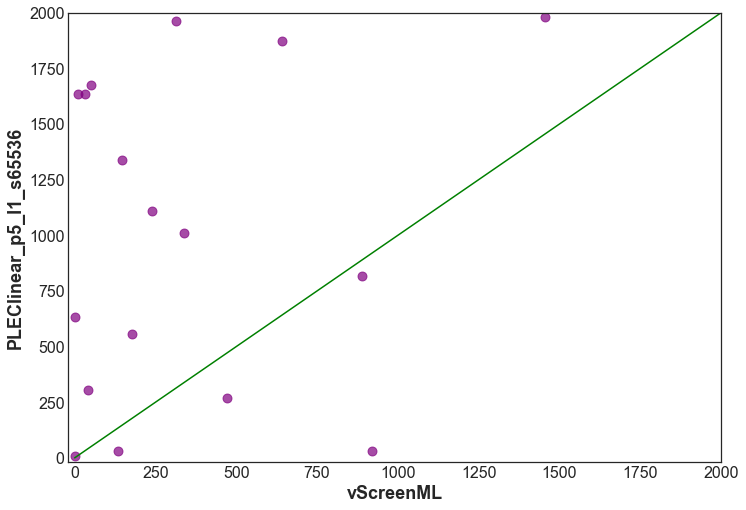

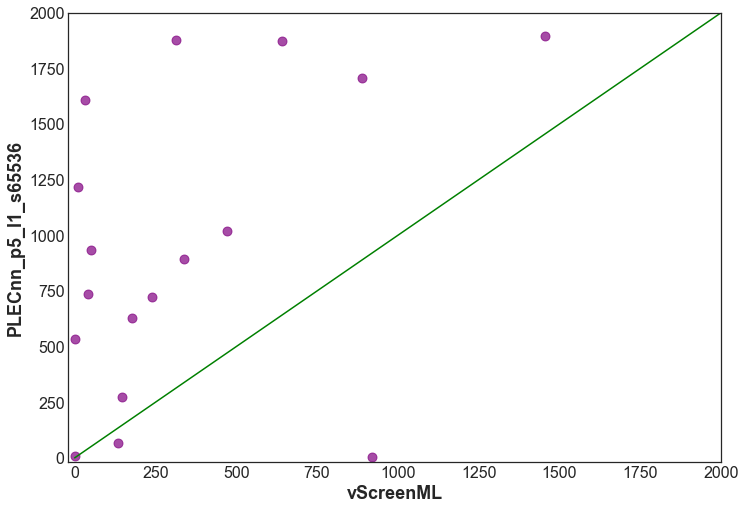

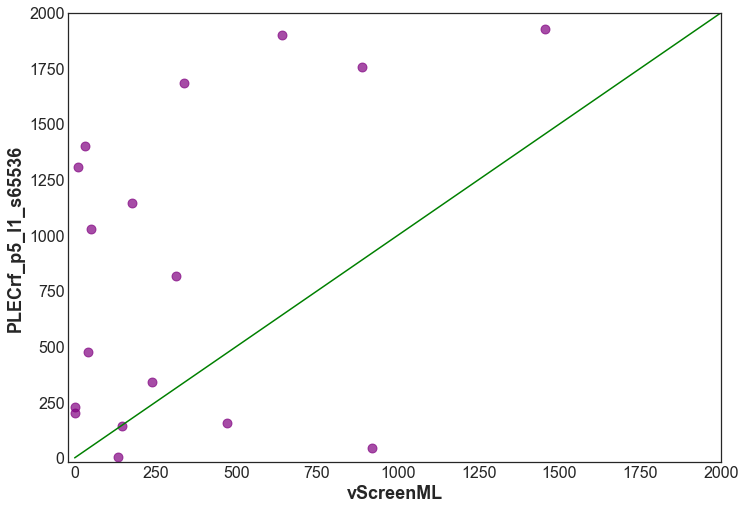

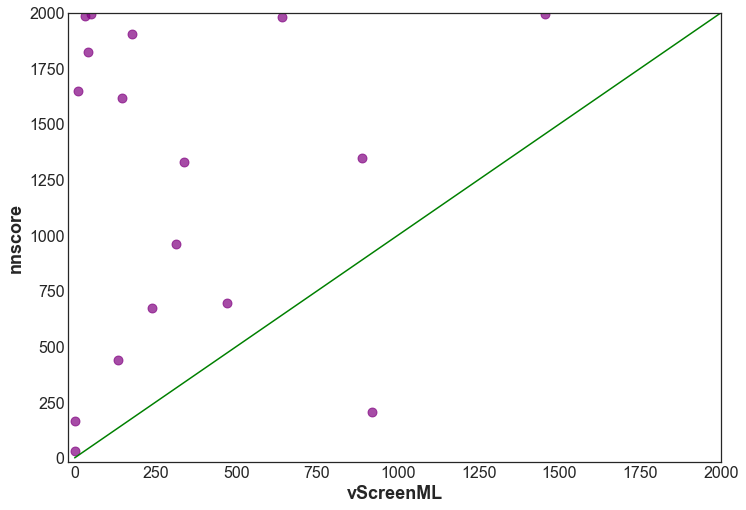

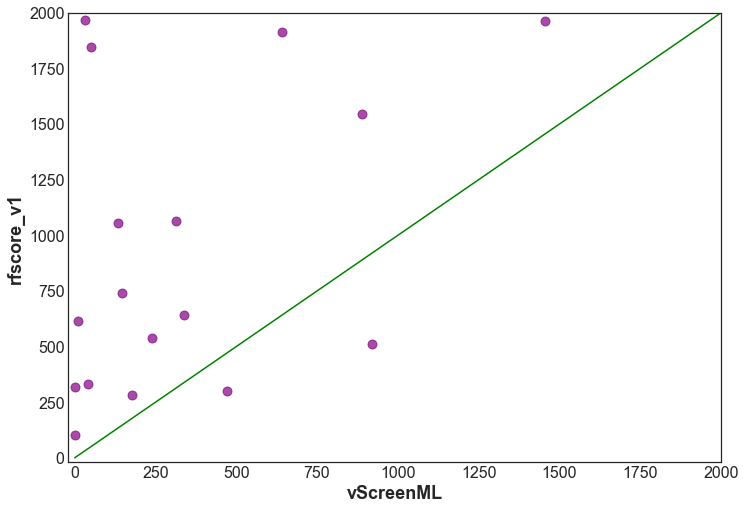

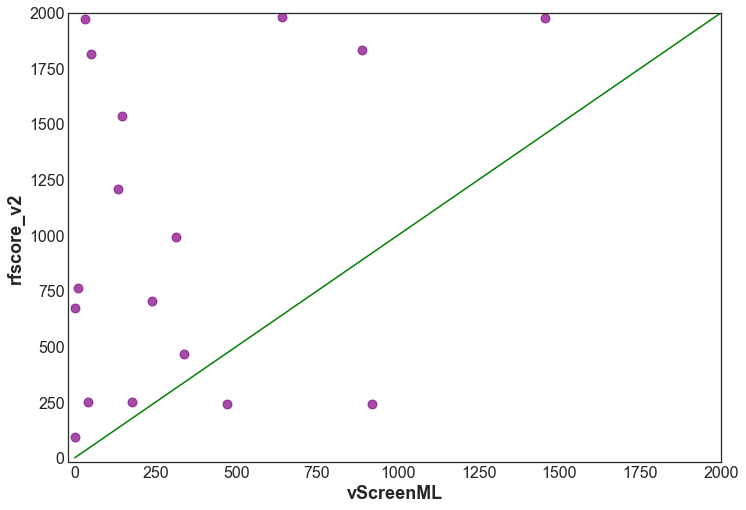

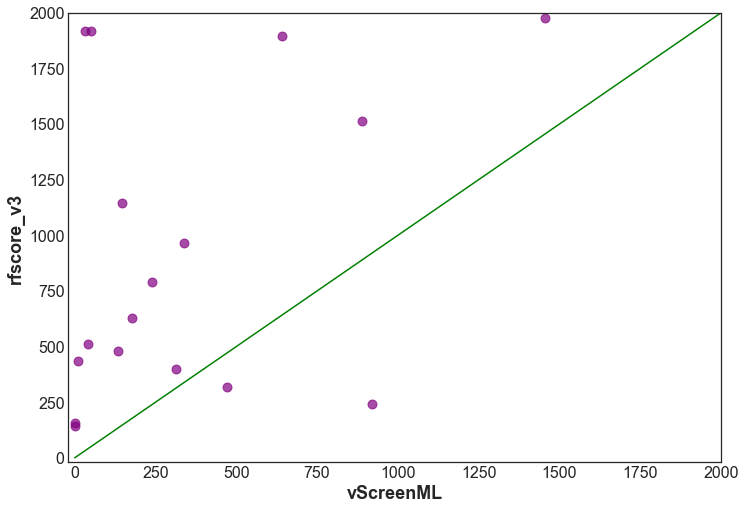

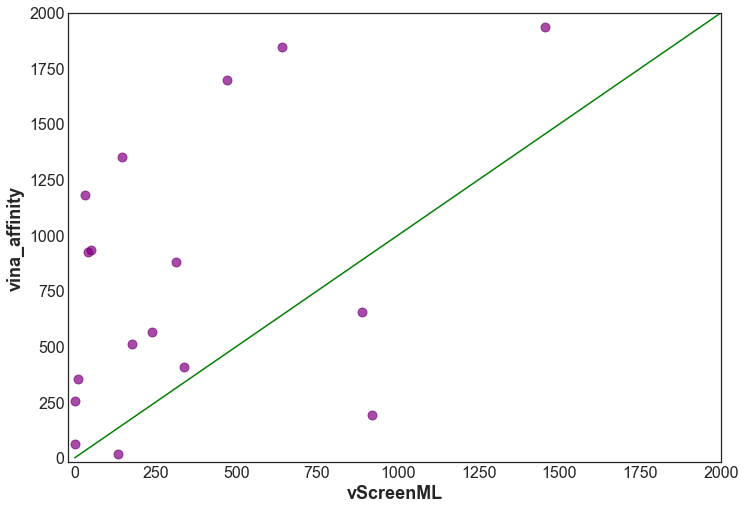

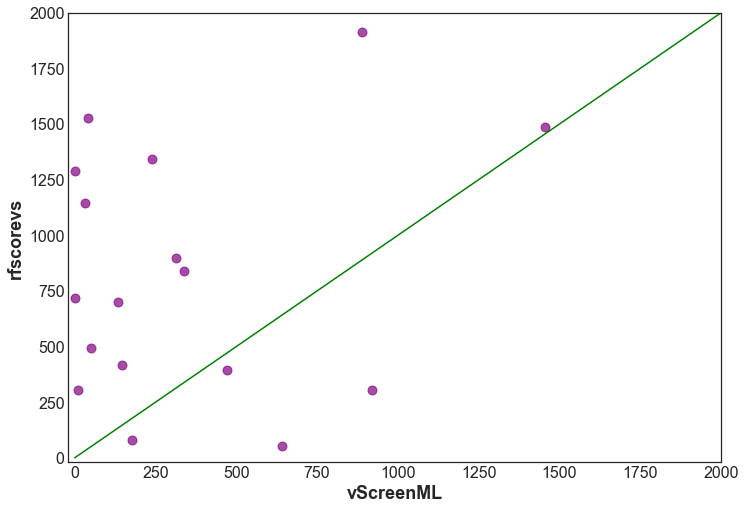

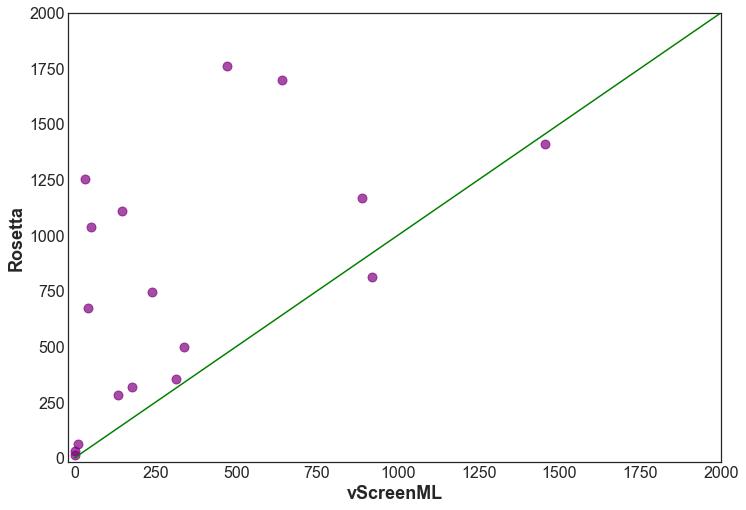

In [84]:
for column in columns:
    plot_benchmark_graph('vScreenML',column)

## Exclude PPI used in training

In [85]:
unseen_ppi = ['1PW6','1R6N','1Y2F','2AZ5','2KP8','3IN7','3O5N','3VKX','3ZRC','4G55']

In [86]:
rank_dict = {}
for score in ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2',
                'PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536',
                  'PLECrf_p5_l1_s65536','vina_affinity']:
    print ('||||||||||||||||||||||||||||||Processing',score,'|||||||||||||||||||||||||||||||||||||',"\n")
    rank_list_other={}
    for i in unseen_ppi:
        ifile = '/Users/yusufadeshina/Downloads/ppi_benchmark/final_'+str(i)+'_all_rf_vina_random2000.csv'
        compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig",delimiter=' ')
        rank_other=predict_rank_active_other(compounds_list2,score,ifile)
        rank_list_other[i] = rank_other
    #print np.mean(rank_list_other),"+/-",np.std(rank_list_other)
    rank_dict[score] = rank_list_other
df_vina_others = pd.DataFrame.from_dict(rank_dict)    

||||||||||||||||||||||||||||||Processing nnscore ||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1PW6_all_rf_vina_random2000.csv is 30
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1R6N_all_rf_vina_random2000.csv is 205
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_1Y2F_all_rf_vina_random2000.csv is 1823
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_2AZ5_all_rf_vina_random2000.csv is 1905
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_2KP8_all_rf_vina_random2000.csv is 1616
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_3IN7_all_rf_vina_random2000.csv is 1650
Rank for the active native ligand /Users/yusufadeshina/Downloads/ppi_benchmark/final_3O5N_all_rf_vina_random2000.csv is 1996
Rank for the active native ligand /User

**RFSCOREVS**

In [87]:
def predict_rank_active_rf(test_x,name):

    no_of_points =float(len(test_x))

    sort_final = test_x.sort_values(by='Score', ascending=False)
    rank=list(sort_final["Label"]).index(1)
    #print "Rank for", name , "=", rank
    print ('Rank for the active native ligand in {} is {}'.format(name, rank+1))
    #print sort_final.head()
    return rank

print ('||||||||||||||||||||||||||||||Processing RFSCORE VS |||||||||||||||||||||||||||||||||||||',"\n")

rank_dict_rfscorevs={}
for i in unseen_ppi:
    ifile = '/Users/yusufadeshina/Downloads/ppi_benchmark/final_'+str(i)+'_rfscorevs_random2000full.csv'
    
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig")
    rank_other=predict_rank_active_rf(compounds_list2,ifile)
    rank_dict_rfscorevs[i] = rank_other
df_rfscorevs = pd.DataFrame.from_dict({"rfscorevs":rank_dict_rfscorevs})
#df_rfscorevs.rename(columns={"0": "rfscorevs"})
#print np.mean(rank_list_rfscorevs),"+/-",np.std(rank_list_rfscorevs)

||||||||||||||||||||||||||||||Processing RFSCORE VS ||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1PW6_rfscorevs_random2000full.csv is 1288
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1R6N_rfscorevs_random2000full.csv is 307
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_1Y2F_rfscorevs_random2000full.csv is 1527
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_2AZ5_rfscorevs_random2000full.csv is 82
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_2KP8_rfscorevs_random2000full.csv is 419
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_3IN7_rfscorevs_random2000full.csv is 307
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/final_3O5N_rfscorevs_random2000full.csv is 494
Rank

**vScreenML**

In [88]:
print ('||||||||||||||||||||||||||||||Processing vScreenML|||||||||||||||||||||||||||||||||||||',"\n")

rank_dict_vscreenml={}
for i in unseen_ppi:
    ifile = '/Users/yusufadeshina/Downloads/ppi_benchmark/'+str(i)+'_combined_random2000.csv'
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig")
    predictors = [x for x in compounds_list2.columns if x not in [target, IDcol]]
    rank_other=predict_rank(clf,compounds_list2,predictors,ifile)
    rank_dict_vscreenml[i]=rank_other
df_vscreenml = pd.DataFrame.from_dict({"vScreenML":rank_dict_vscreenml})


||||||||||||||||||||||||||||||Processing vScreenML||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1PW6_combined_random2000.csv is 3
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1R6N_combined_random2000.csv is 922
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1Y2F_combined_random2000.csv is 42
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2AZ5_combined_random2000.csv is 179
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2KP8_combined_random2000.csv is 148
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3IN7_combined_random2000.csv is 10
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3O5N_combined_random2000.csv is 51
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3VKX_co

In [89]:
#1tft,2yel,3gk1,3ur4,4e1n,4erf,4gg4

** Rosetta**

In [90]:
print ('||||||||||||||||||||||||||||||Processing Rosetta|||||||||||||||||||||||||||||||||||||',"\n")
rank_dict_rosetta={}
for i in unseen_ppi:
    ifile = '/Users/yusufadeshina/Downloads/ppi_benchmark/'+str(i)+'_rosetta_random2000full.csv'
    compounds_list2 = pd.read_csv(ifile, encoding="utf-8-sig",sep=' ')
    #print compounds_list2.columns
    rank_other=predict_rank_active(compounds_list2,'Interface_Energy',ifile,True)
    rank_dict_rosetta[i] = rank_other
df_rosetta = pd.DataFrame.from_dict({"Rosetta":rank_dict_rosetta})
#print np.mean(rank_list_rosetta),"+/-",np.std(rank_list_rosetta)

||||||||||||||||||||||||||||||Processing Rosetta||||||||||||||||||||||||||||||||||||| 

Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1PW6_rosetta_random2000full.csv is 13
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1R6N_rosetta_random2000full.csv is 812
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/1Y2F_rosetta_random2000full.csv is 675
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2AZ5_rosetta_random2000full.csv is 320
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/2KP8_rosetta_random2000full.csv is 1108
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3IN7_rosetta_random2000full.csv is 61
Rank for the active native ligand in /Users/yusufadeshina/Downloads/ppi_benchmark/3O5N_rosetta_random2000full.csv is 1038
Rank for the active native ligand in /Users/yusufadeshina/Downloa

In [91]:
pd_rank = pd.concat((df_vscreenml,df_rosetta,df_vina_others,df_rfscorevs),axis=1)

In [92]:
pd_rank

vScreenML  Rosetta  nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
1PW6          2       12       29         102         145          92   
1R6N        921      811      204         513         240         242   
1Y2F         41      674     1822         333         511         250   
2AZ5        178      319     1904         282         628         249   
2KP8        147     1107     1615         740        1145        1534   
3IN7          9       60     1649         613         436         762   
3O5N         50     1037     1995        1847        1918        1813   
3VKX         33     1251     1985        1966        1919        1970   
3ZRC        640     1700     1982        1914        1896        1981   
4G55        888     1167     1347        1544        1515        1832   

      PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
1PW6                      635                  532                  228   
1R6N                       30                    4                   43   
1Y2F                      305                  736                  474   
2AZ5                      558                  629                 1144   
2KP8                     1337                  273                  144   
3IN7                     1637                 1215                 1309   
3O5N                     1677                  934                 1029   
3VKX                     1637                 1610                 1403   
3ZRC                     1875                 1873                 1901   
4G55                      815                 1708                 1754   

      vina_affinity  rfscorevs  
1PW6             63       1287  
1R6N            192        306  
1Y2F            923       1526  
2AZ5            510         81  
2KP8           1353        418  
3IN7            356        306  
3O5N            933        493  
3VKX           1179       1145  
3ZRC           1848         54  
4G55            657       1911

In [93]:
#for publication quality plotting in prism
pd_rank.to_csv('/Users/yusufadeshina/Downloads/ppi_benchmark/ppi_benchmark_full_no_train.csv')

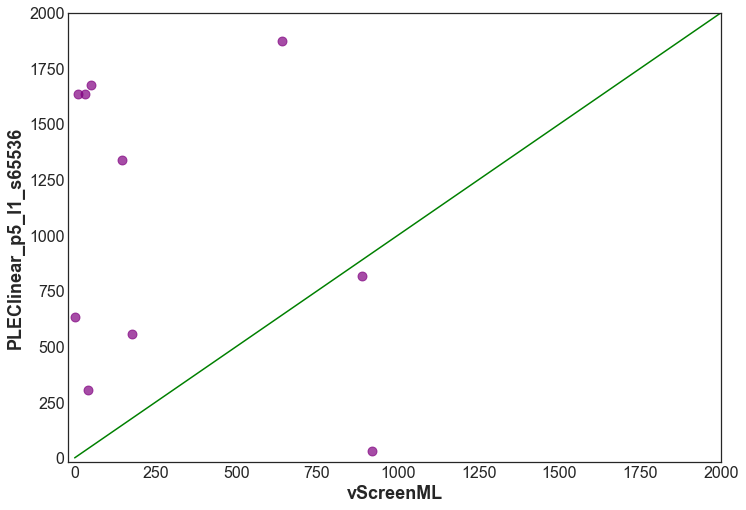

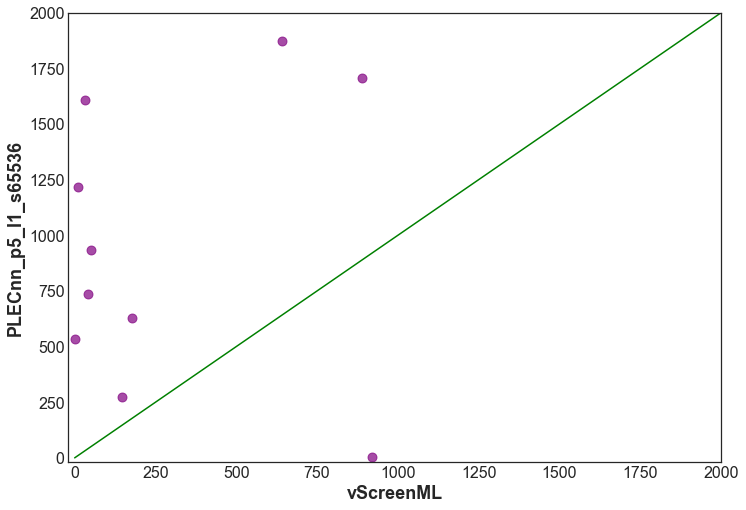

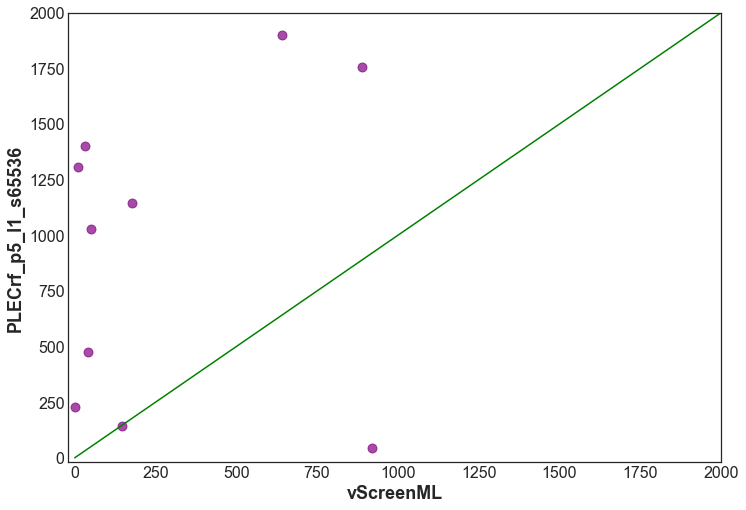

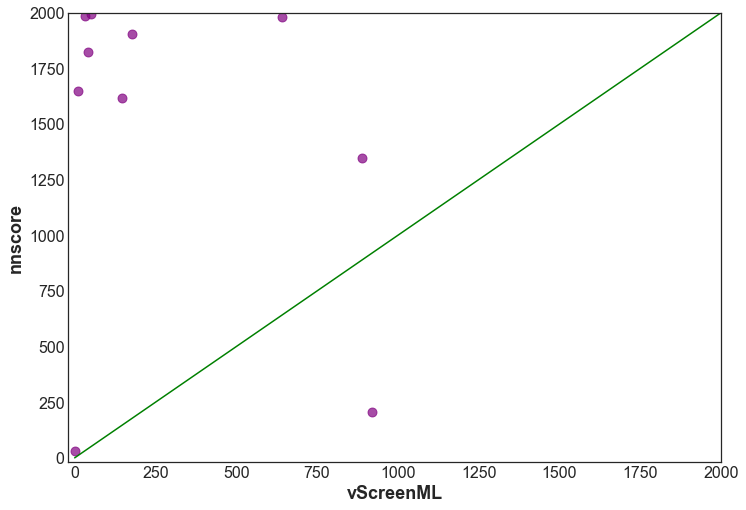

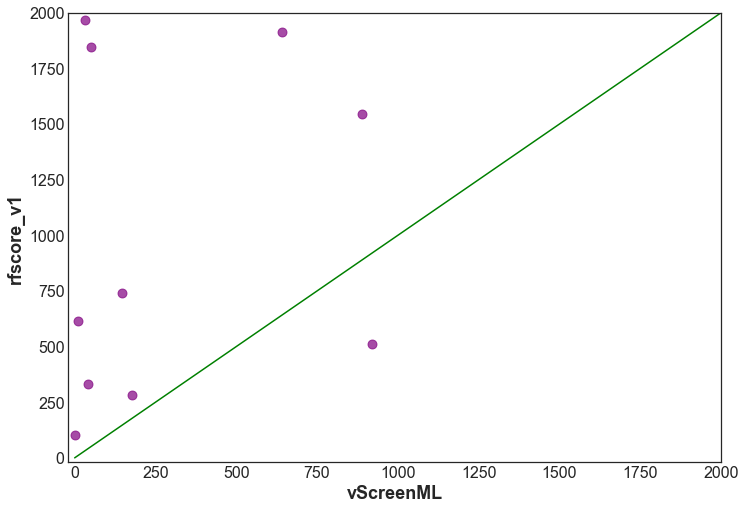

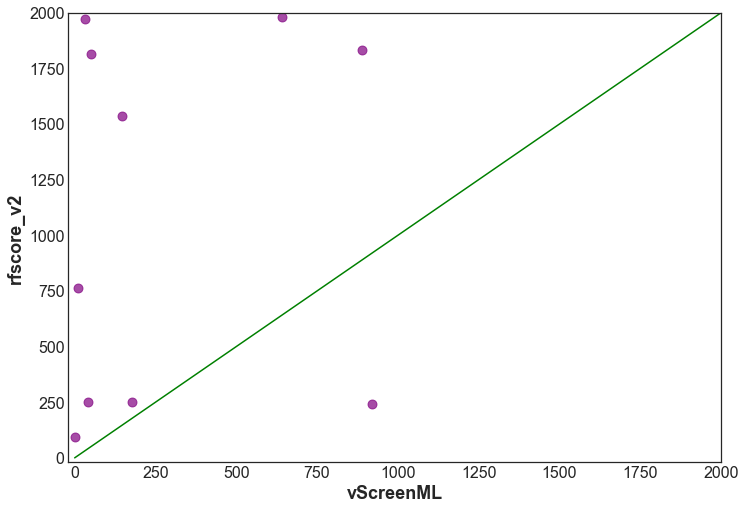

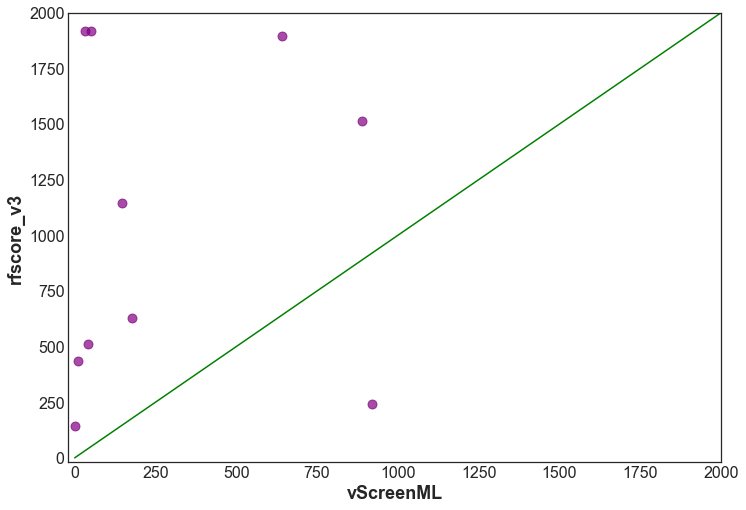

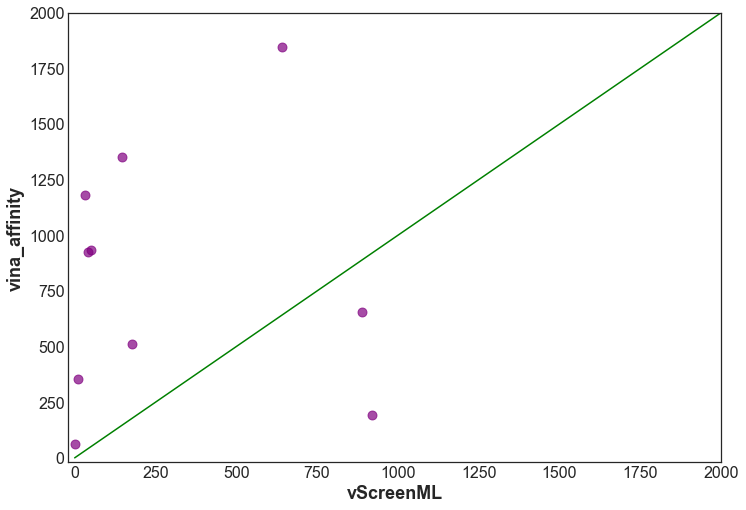

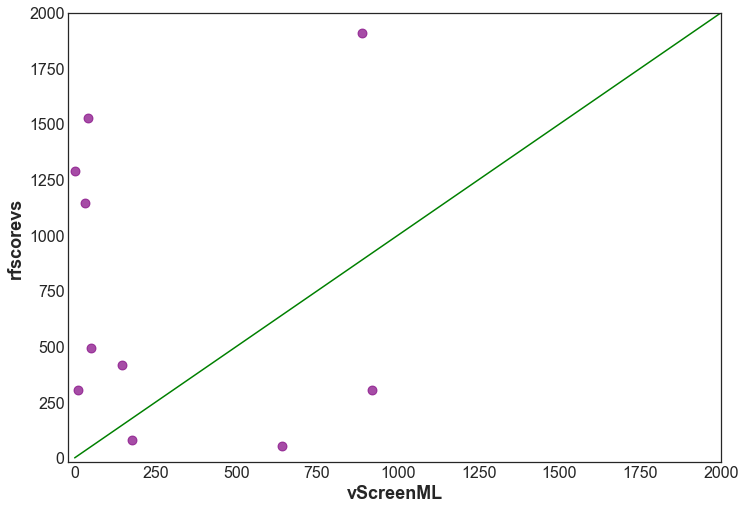

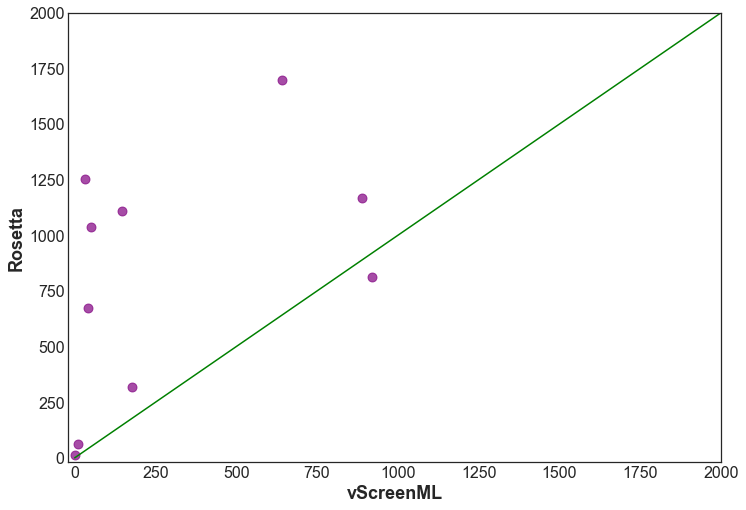

In [94]:
for column in columns:
    plot_benchmark_graph('vScreenML',column)

## ROCS, Enrichment vs sub-library size

In [95]:
tag_no_train = ['11-beta-HSD1',
'17-beta-HSD1',
'A2A',
'ACE',
'ACE-2',
'ADAM17',
'ADRB2',
'Bcl-2',
'COX1',
'CYP2A6',
'GBA',
'GR',
'HMGR',
'MMP2',
'PDE5',
'PNP',
'QPCT',
'ROCK-1',
'SARS-HCoV',
'TIE2',
'TK',
'TP',
'VEGFR1']

In [31]:
tags = [
    '11betaHSD1',
'17betaHSD1',
'A2A',
'ACE2',
'ACE',
'ACHE',
#'ADAM17',
'ADRB2',
'AKT1',
'ALR2',
'AR',
'AURKA',
'AURKB',
'BCL2',
'BRAF',
'CATL',
'CDK2',
'COX1',
'COX2',
'CTSK',
'CYP2A6',
'DHFR',
'EGFR',
'EPHB4',
'ER-beta',
'ERBB2',
'FGFR1',
'FKBP1A',
'FXA',
'GBA',
'GR',
'GSK3B',
'HDAC2',
'HDAC8',
'HIV1PR',
'HIV1RT',
'HMGR',
'HSP90',
'IGF1R',
'INHA',
'ITK',
'JAK3',
'JNK1',
'JNK2',
'JNK3',
'KIF11',
'LCK',
'MDM2',
'MK2',
#'MMP2',
'NA',
'P38-alpha',
'PARP-1',
'PDE4B',
'PDE5',
'PDK1',
'PI3Kg',
'PIM-1',
'PIM-2',
'PNP',
'PPARA',
'PPARG',
'PRKCQ',
'PR',
'PYGL-in',
'QPCT',
'ROCK-1',
'RXR',
'SARS-HCoV',
'SRC',
'TIE2',
'TK',
'TPA',
'TP',
'TS',
'Thrombin',
'VEGFR1',
'VEGFR2',
'uPA'
]

In [4]:
with open('/Users/yusufadeshina/Downloads/XGB_CLASSIFIER_alldata.pickle.dat', 'rb') as f:
    clf = pickle.load(f)

### True positive rate vs library size

In [5]:
def threshold_to_frac_lib(thresh, df_pred, column):
    list_thresh_to_perc = []
    for i in thresh:
        if column == "Pred":
            sub_lib = df_pred[df_pred[column] >= i]
        elif column == "Interface_Energy":
            sub_lib = df_pred[-1*df_pred[column] >= i]
            
        #print len(sub_lib)
        perc = float(len(sub_lib))/len(df_pred)*100
        list_thresh_to_perc.append([i,perc])
    #print list_thresh_to_perc    
    return list_thresh_to_perc            

In [6]:
def predict_rank_log_roc_other(model,test_x,predictors,name):
    #actual_positive=float(len(test_x1[test_x1["Label"] == 1]))
    y_test = test_x["Label"]
    #a = [ i/1000. for i in range(0,1000) ]
    dtest_prob = model.predict_proba(test_x[predictors])[:,1]
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, dtest_prob, pos_label=1)

    test_x["Pred"] = dtest_prob
        

    fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, -1*test_x.Interface_Energy, pos_label=1)
    perc1 = [v for k,v in threshold_to_frac_lib(thresholds1, test_x, "Pred")]  
    perc2 = [v for k,v in threshold_to_frac_lib(thresholds2, test_x, "Interface_Energy")]  
    #print min(test_x.Interface_Energy)
    #print perc1
    #print perc2
    #fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test2, test_x2.Score, pos_label=1)
    #fpr, tpr, thresholds =metrics.roc_log_auc(log_min=0.001, log_max=1.0)
    plt.figure()
    
    lw = 2
    #plt.plot(fpr1, tpr1, color='darkorange',
    plt.plot(perc1, tpr1*100, color='darkorange',
         lw=lw, label='vScreenML')
    #plt.plot(fpr2, tpr2, color='black',label='Rosetta',
    plt.plot(perc2, tpr2*100, color='black',label='Rosetta',
         lw=lw)
    #plt.plot(fpr3, tpr3, color='red',label='RF-ScoreVS',
    #     lw=lw)
    #plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    #plt.plot(a, a, color='navy', lw=lw, linestyle='--',label='Random')
    #plt.xlim([0.0, 100])
    plt.ylim([0.0, 100.0])
    plt.xscale('log')
    plt.ylabel('Enrichment')
    plt.xlabel('Sub-library size (%)')
    plt.title(name)
    plt.legend(loc="upper left")
    plt.show()
    #plt.close('all')

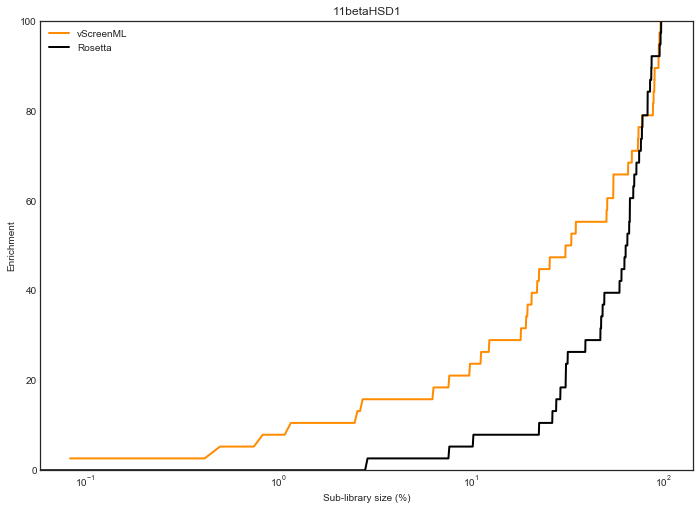

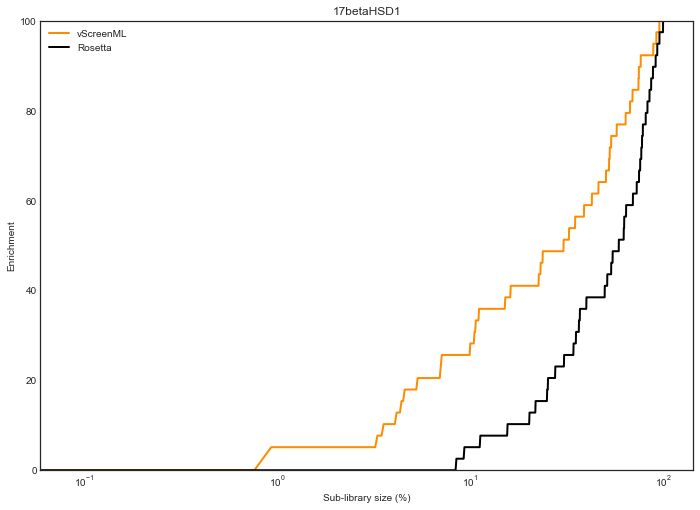

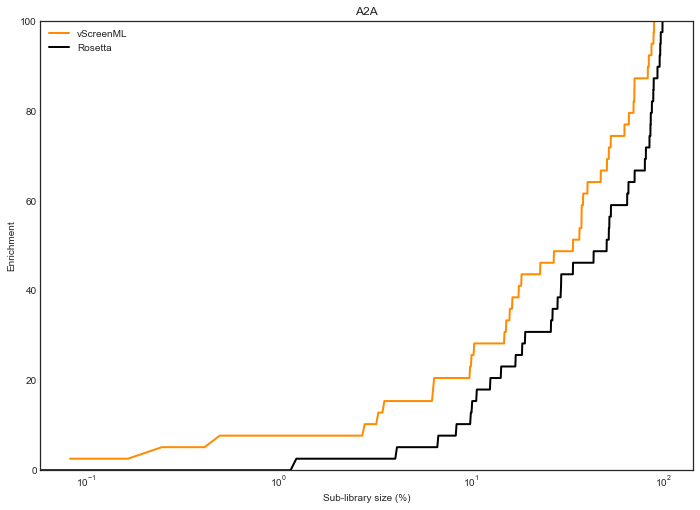

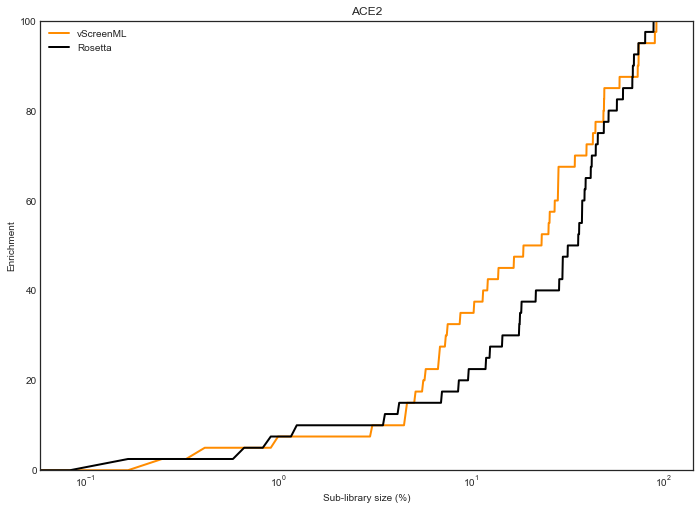

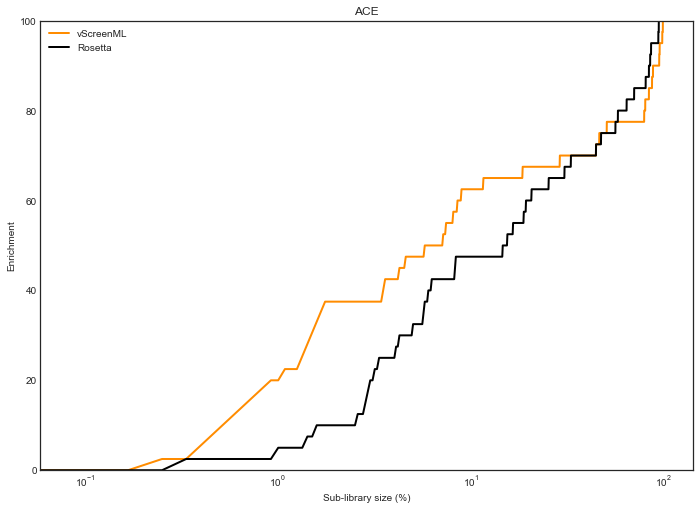

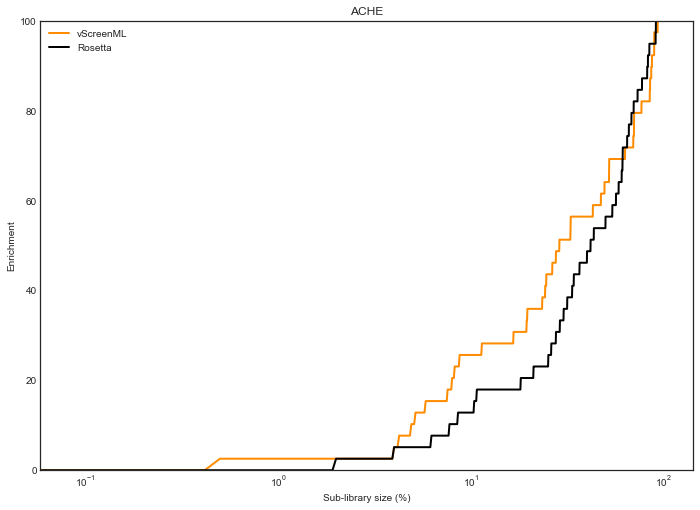

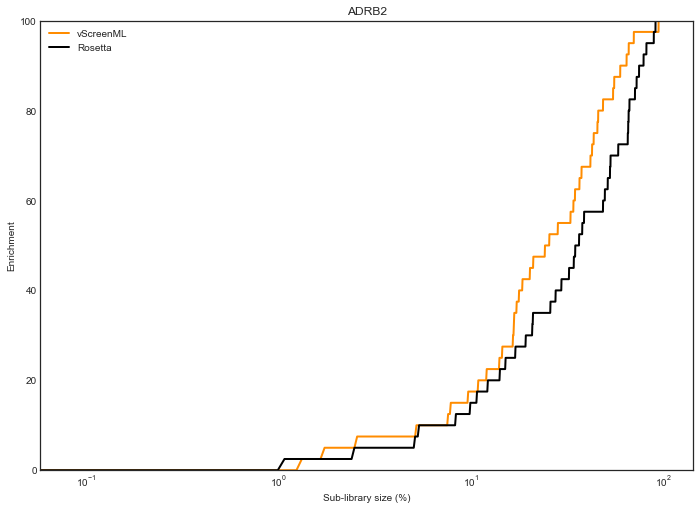

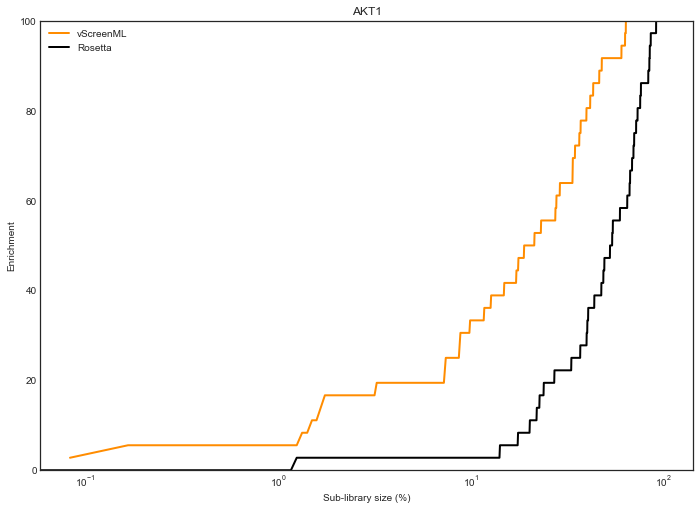

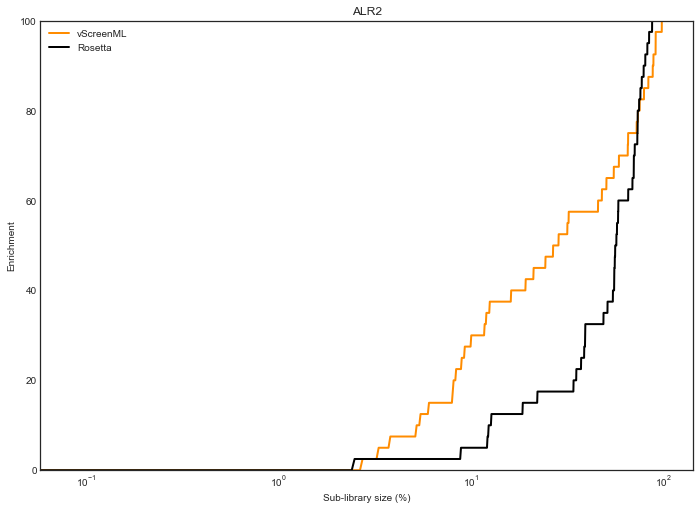

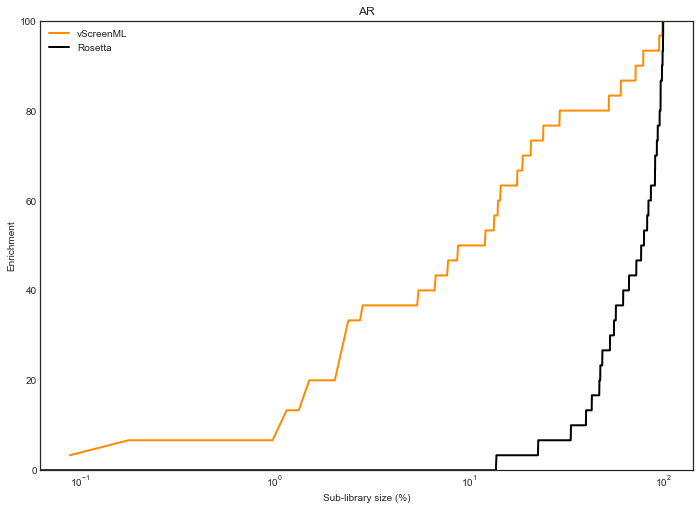

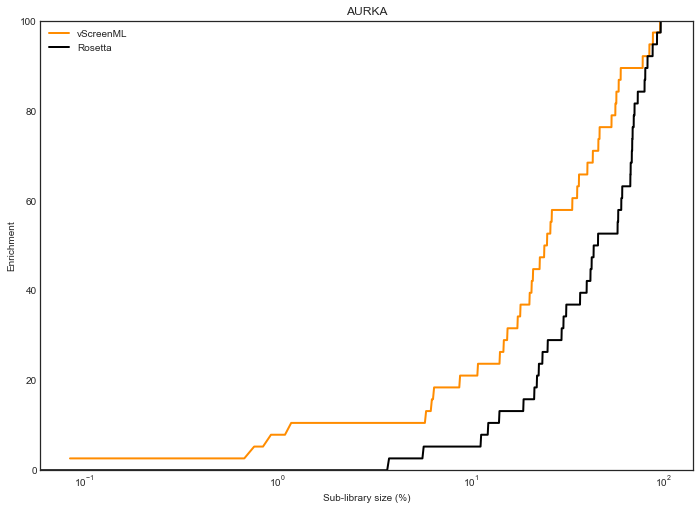

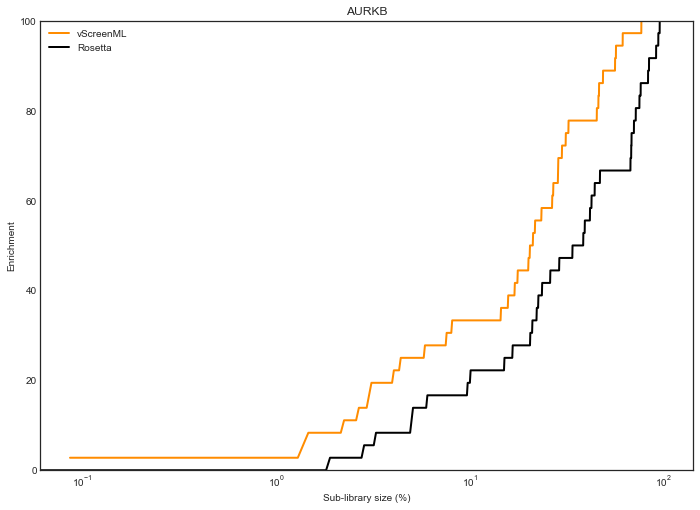

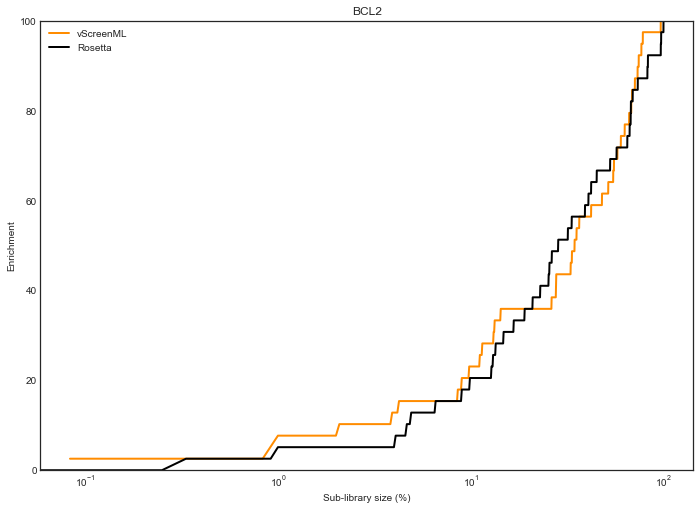

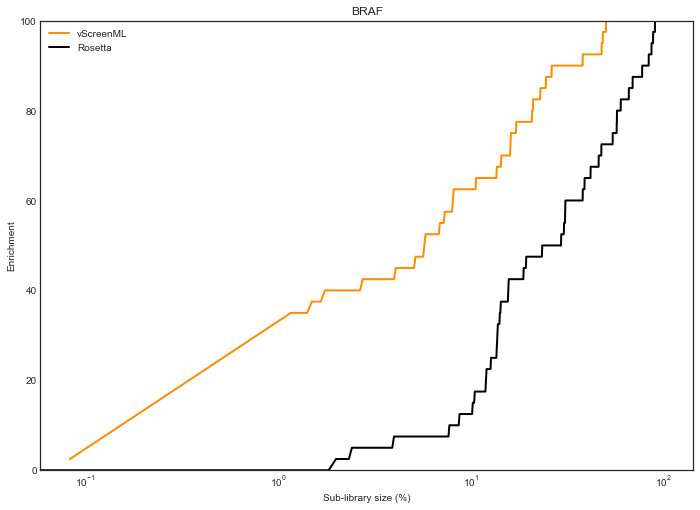

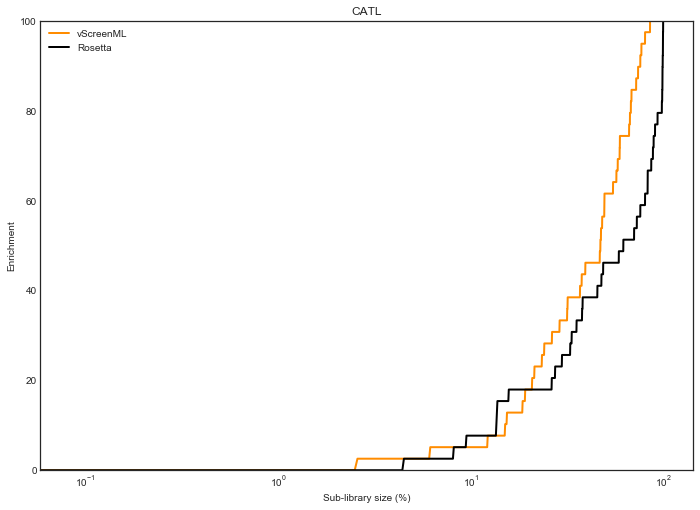

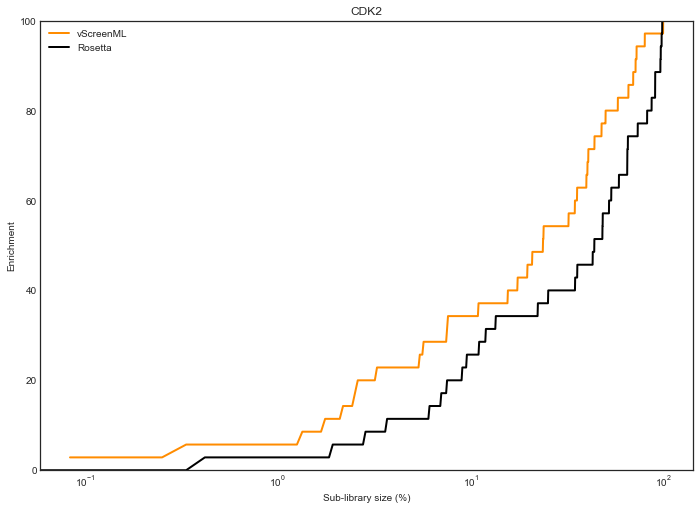

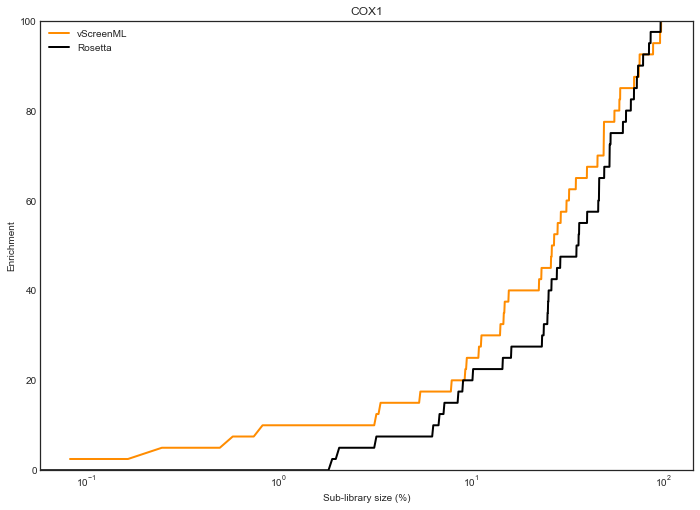

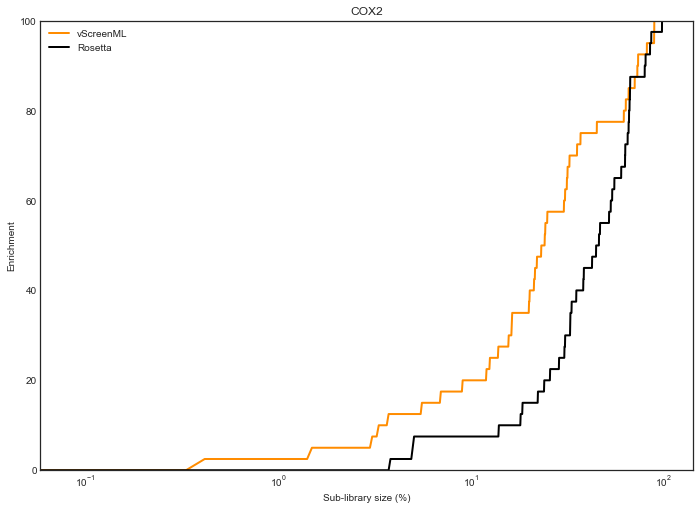

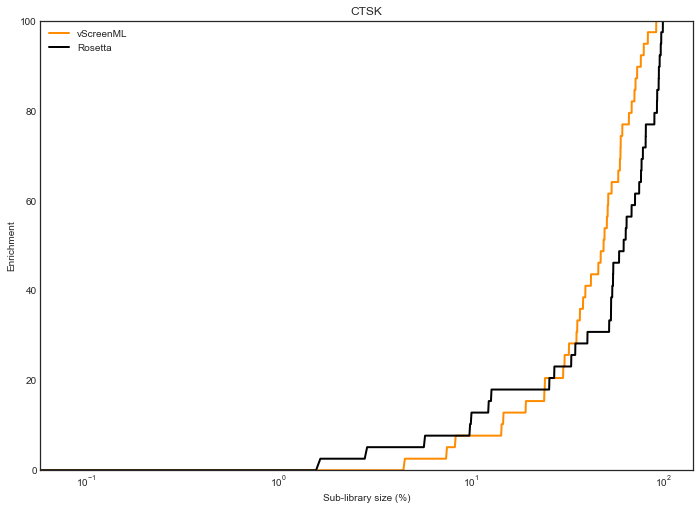

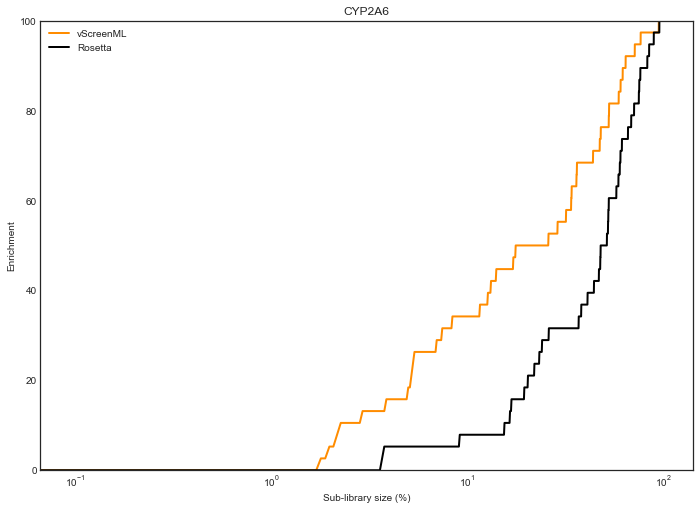

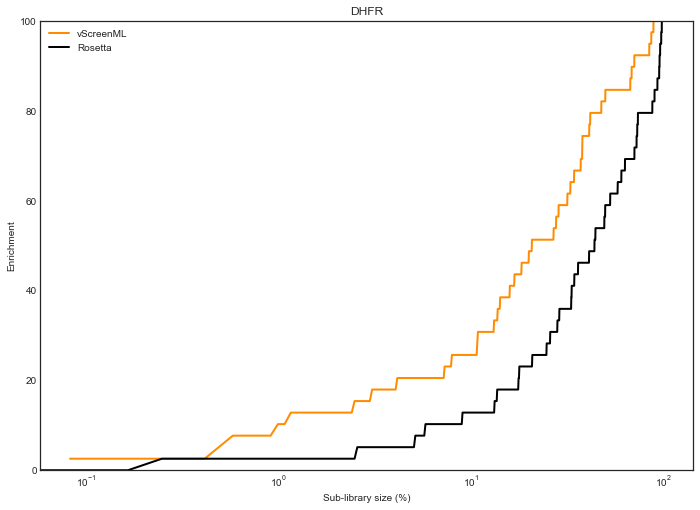

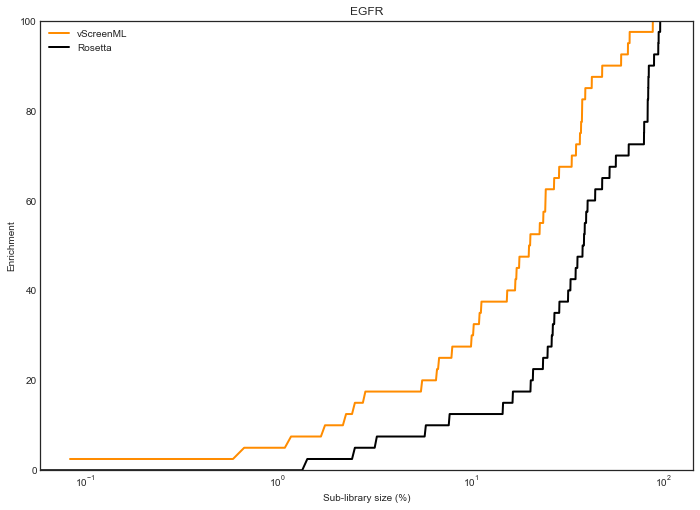

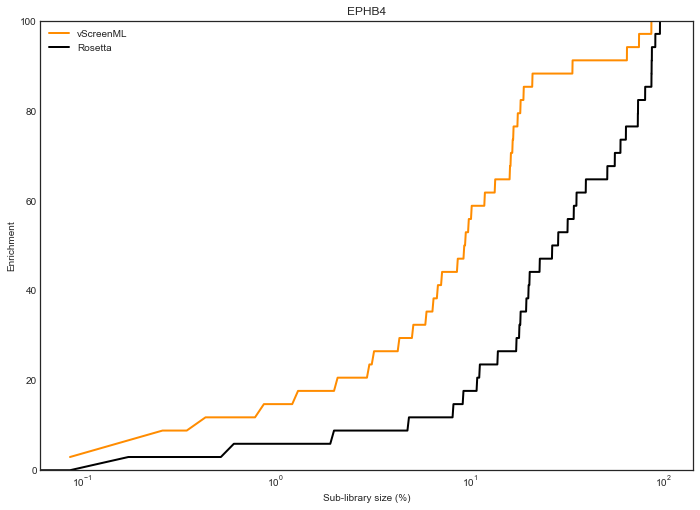

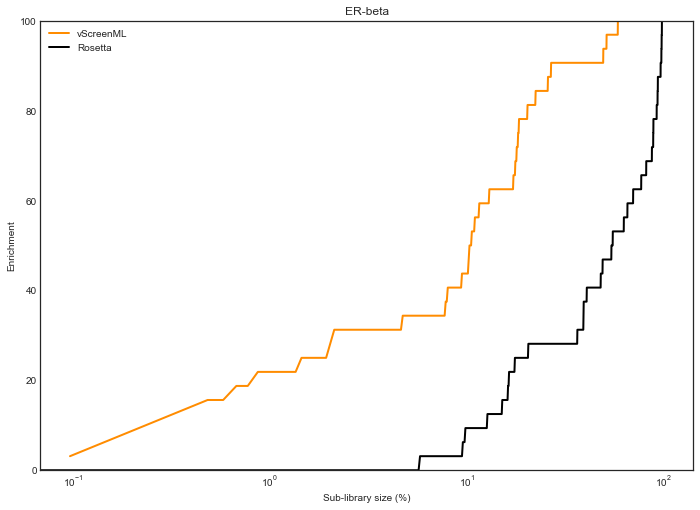

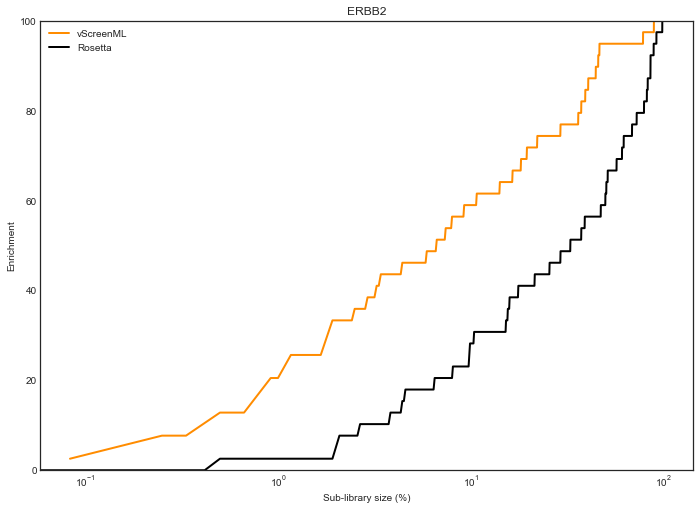

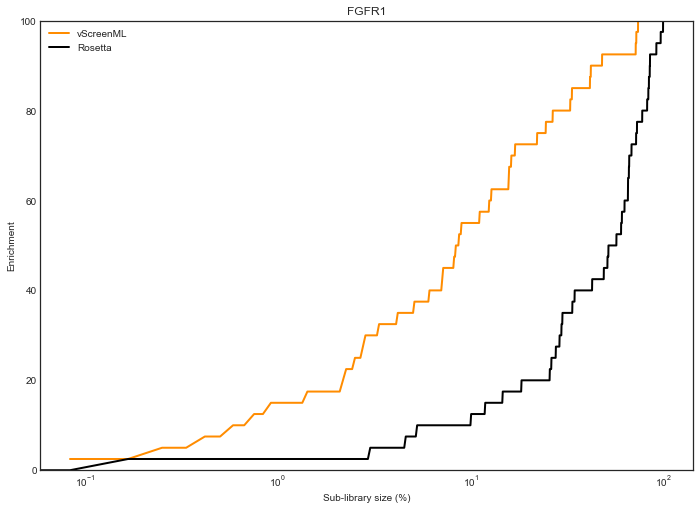

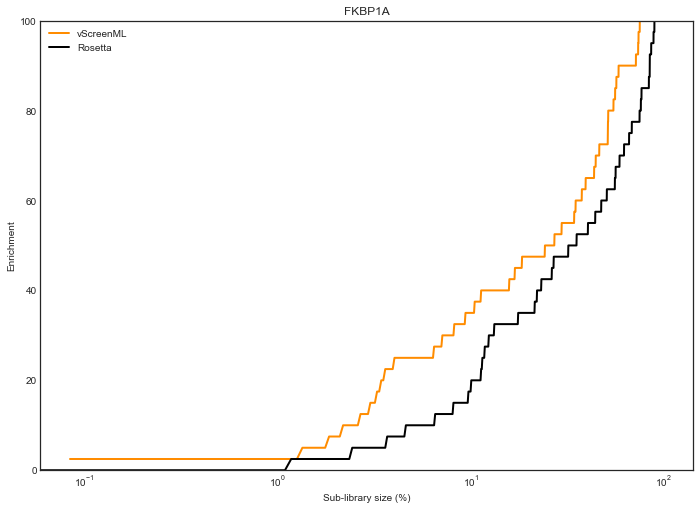

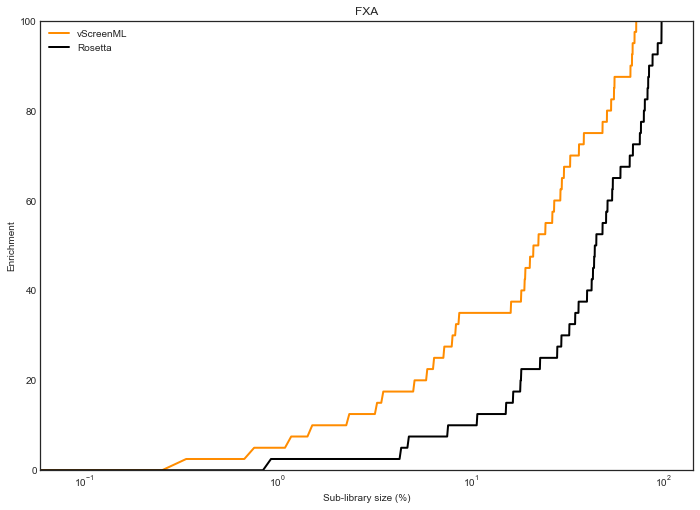

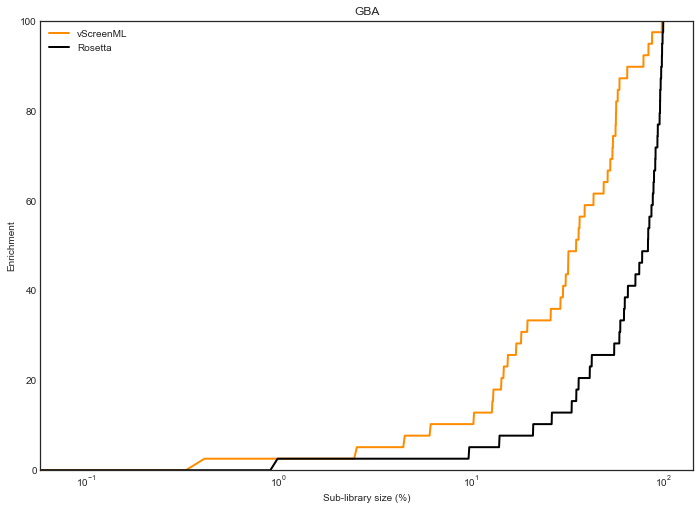

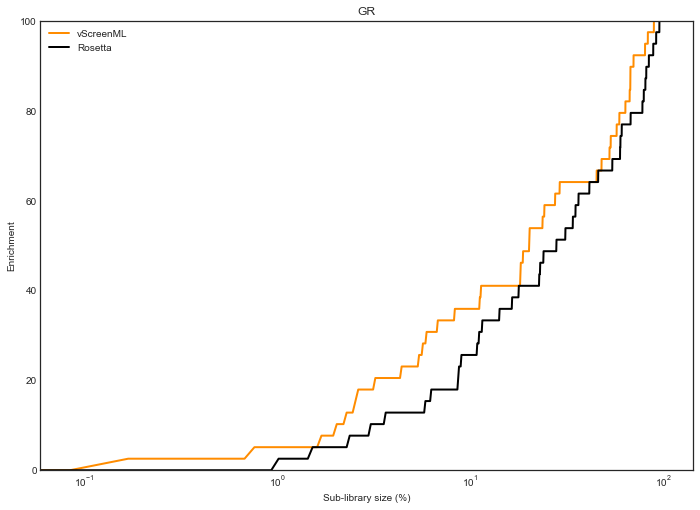

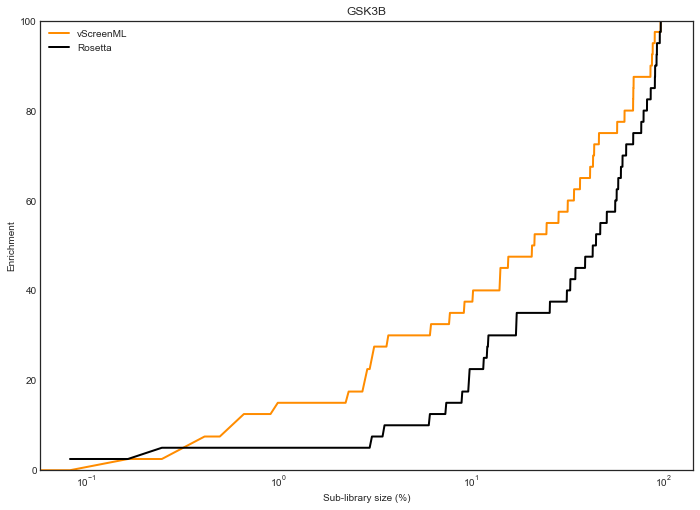

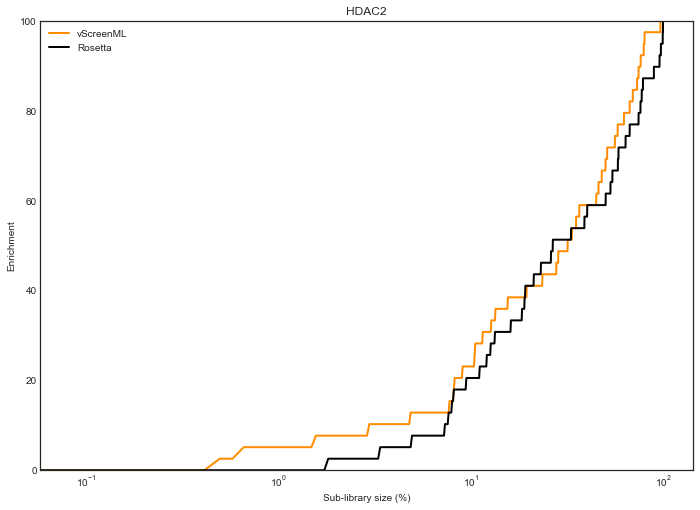

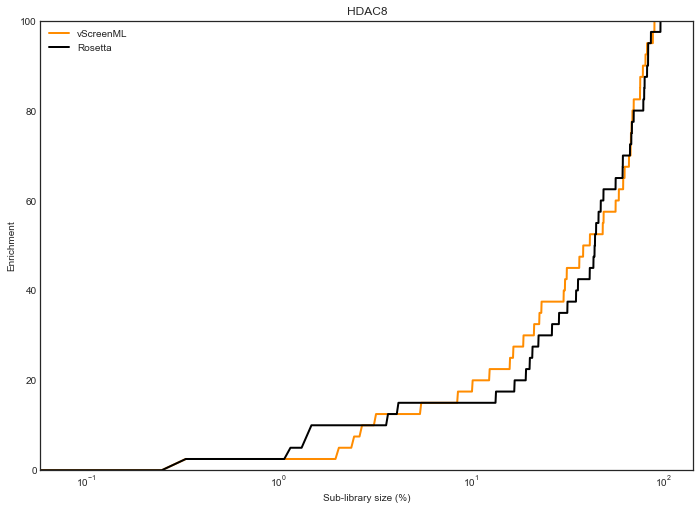

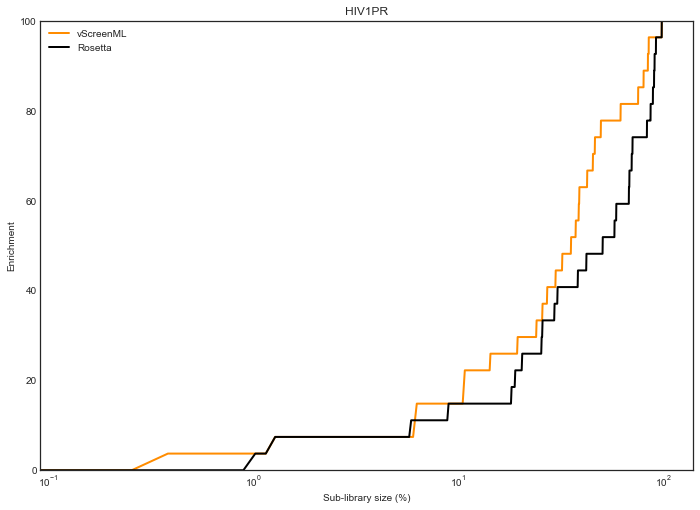

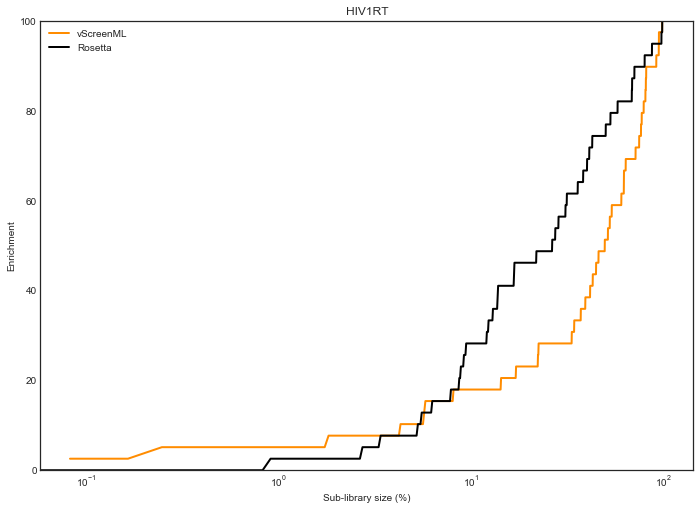

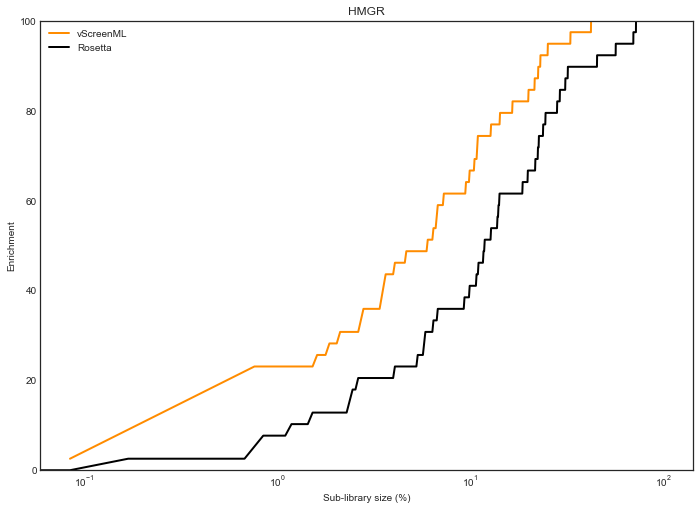

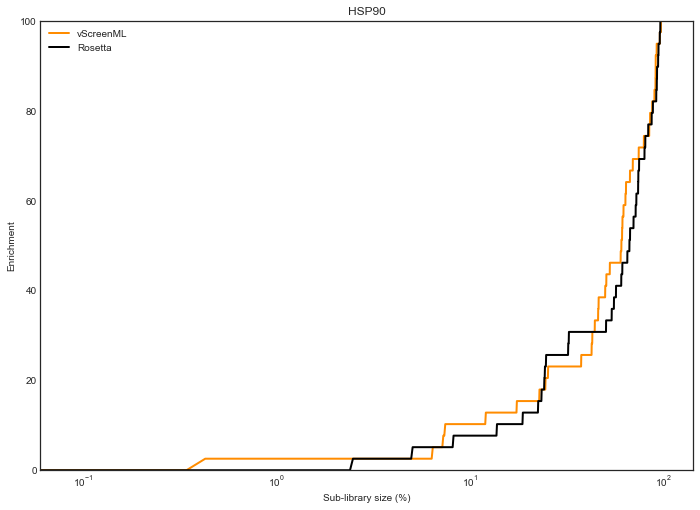

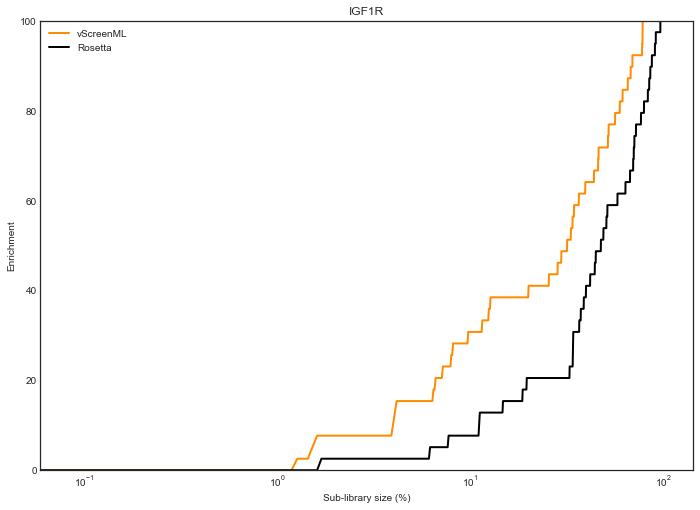

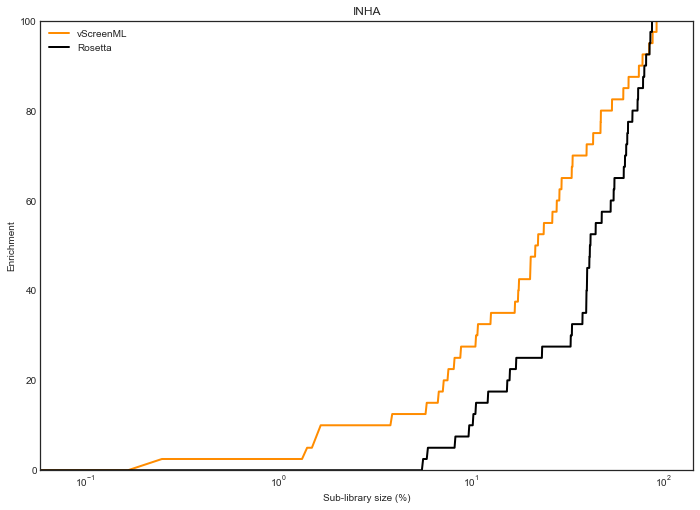

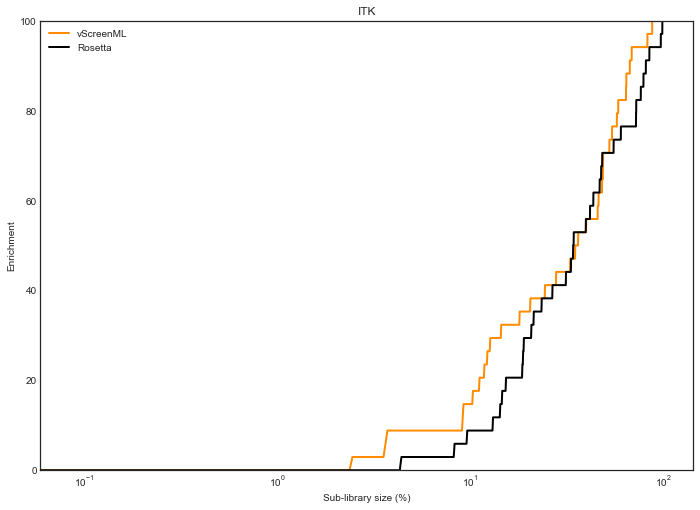

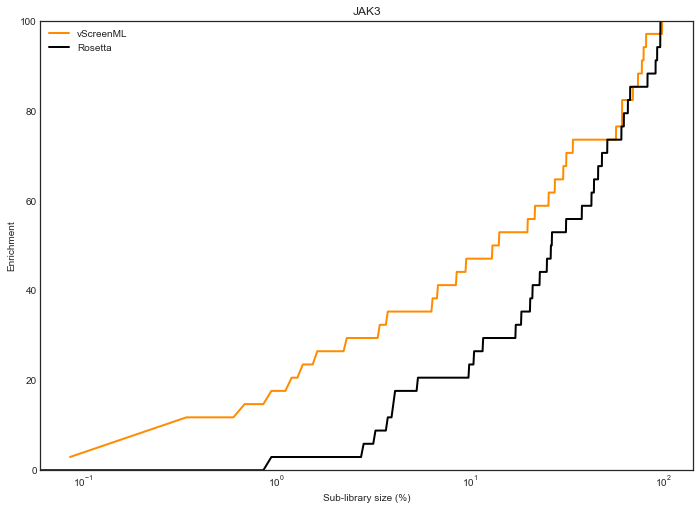

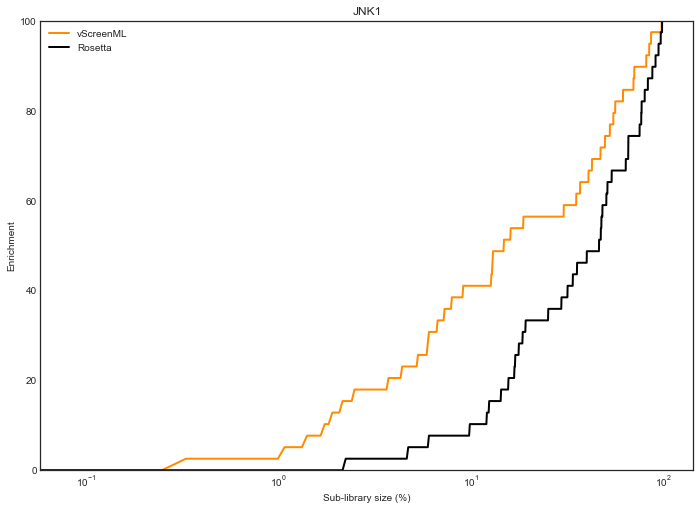

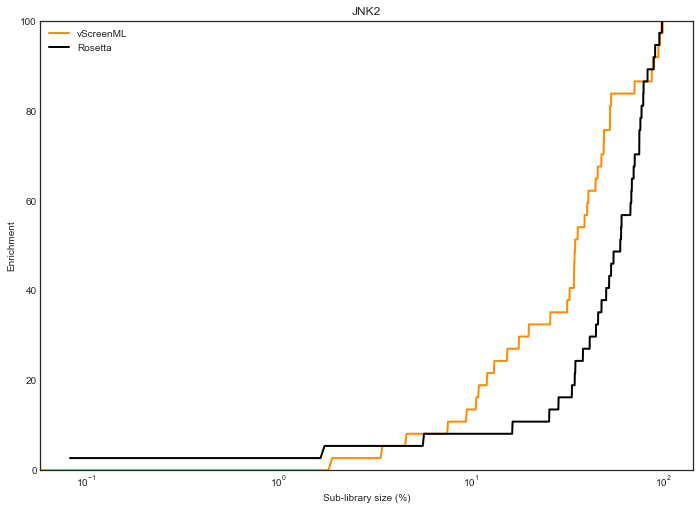

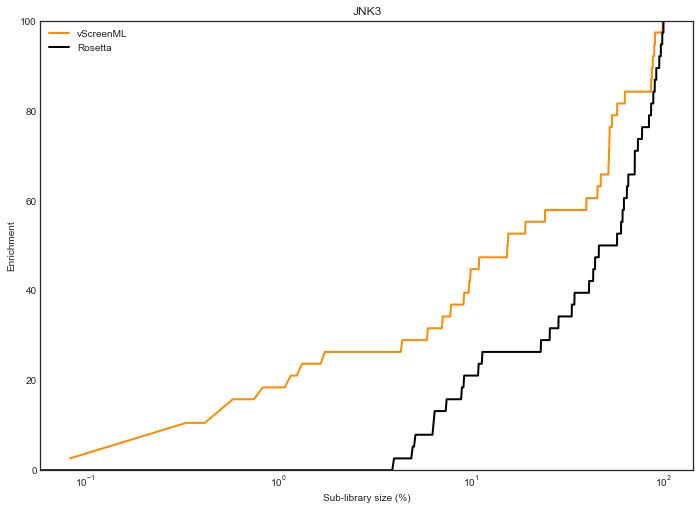

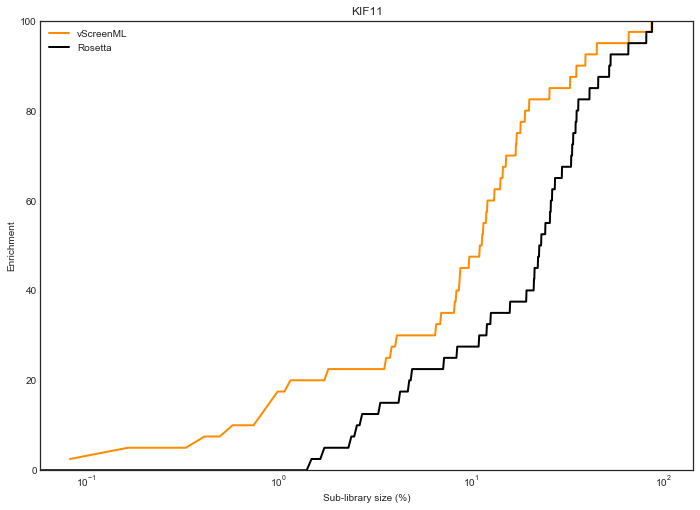

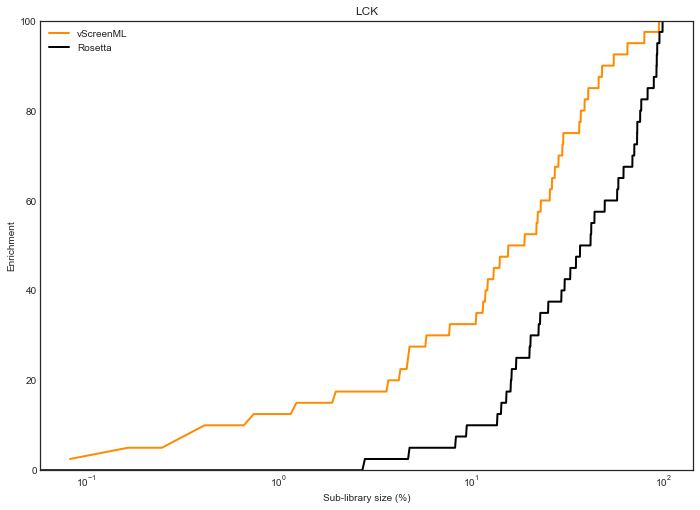

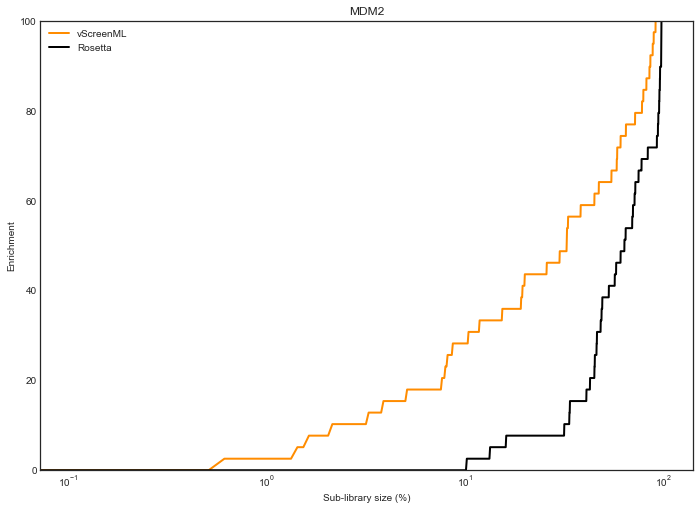

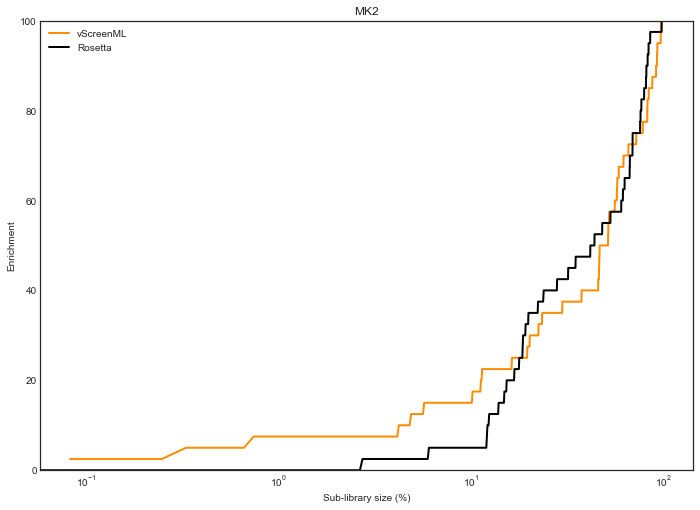

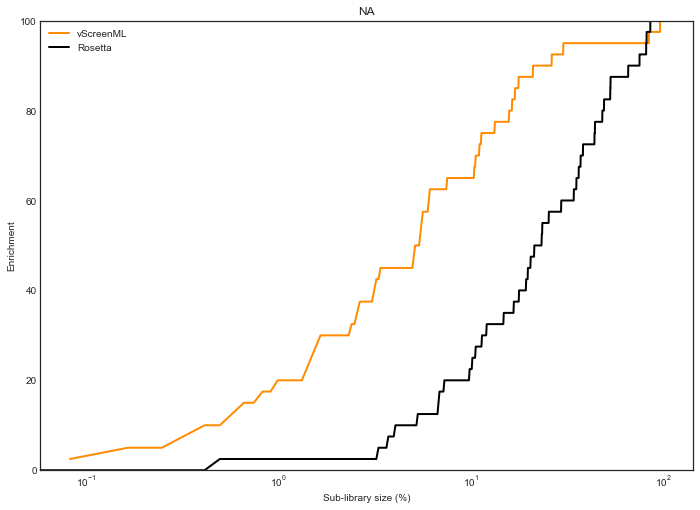

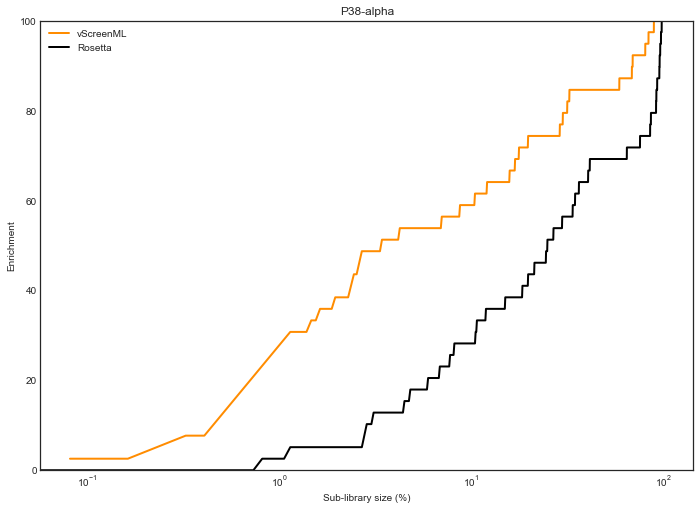

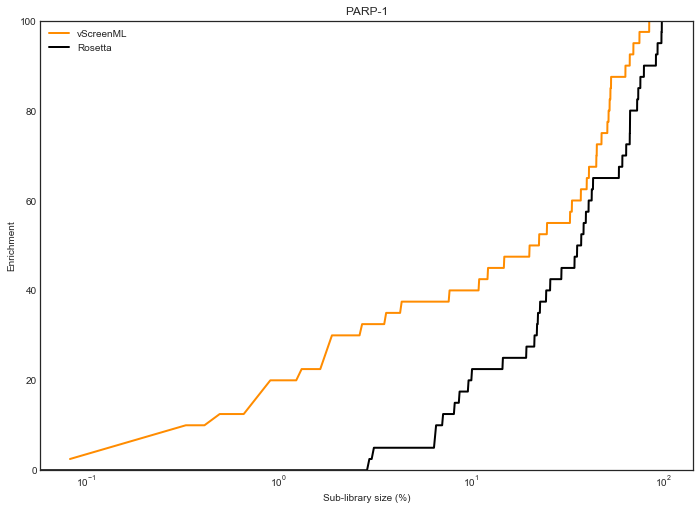

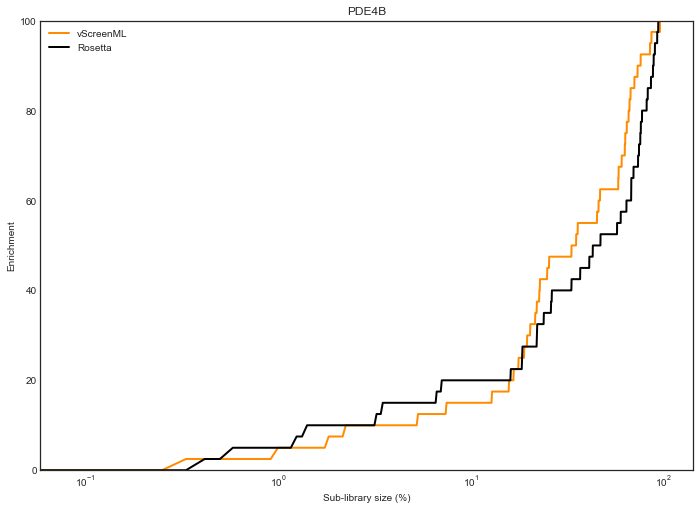

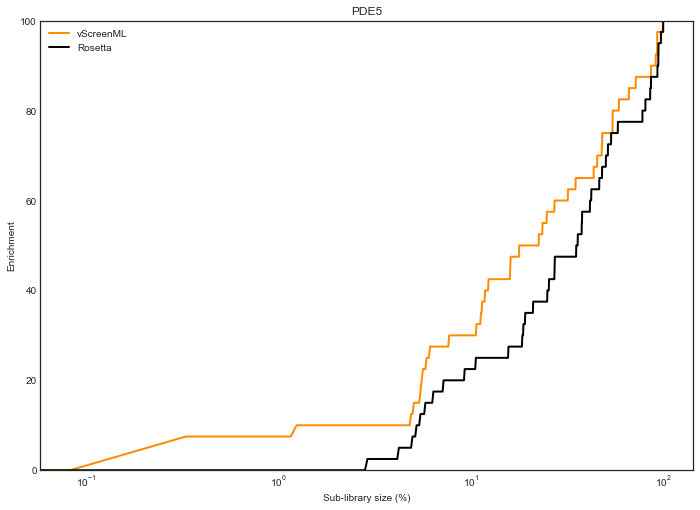

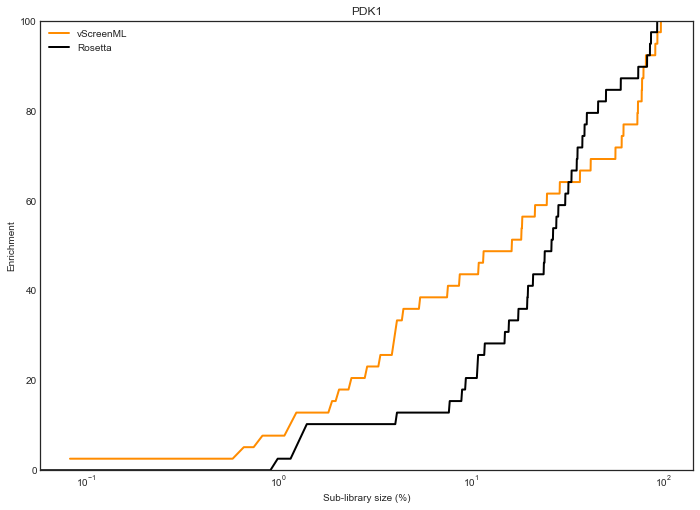

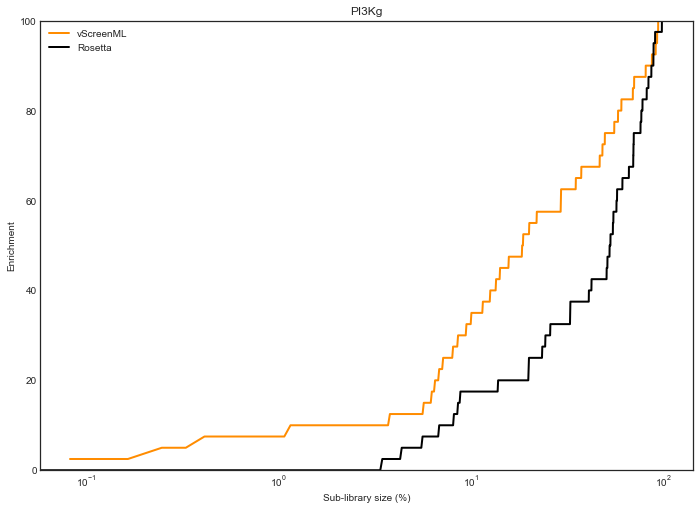

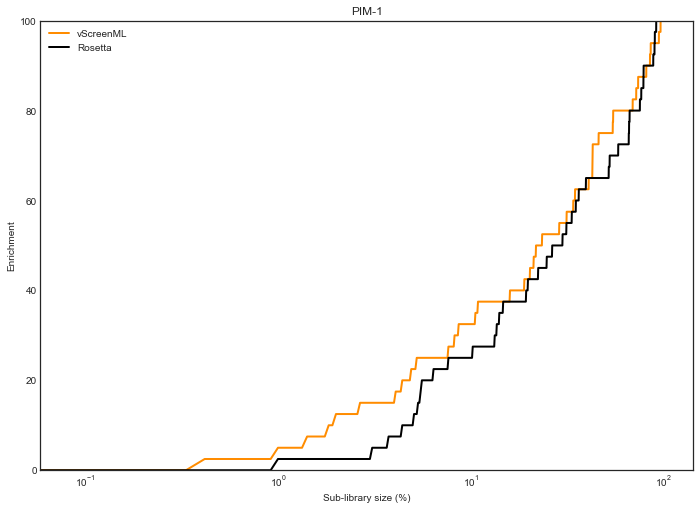

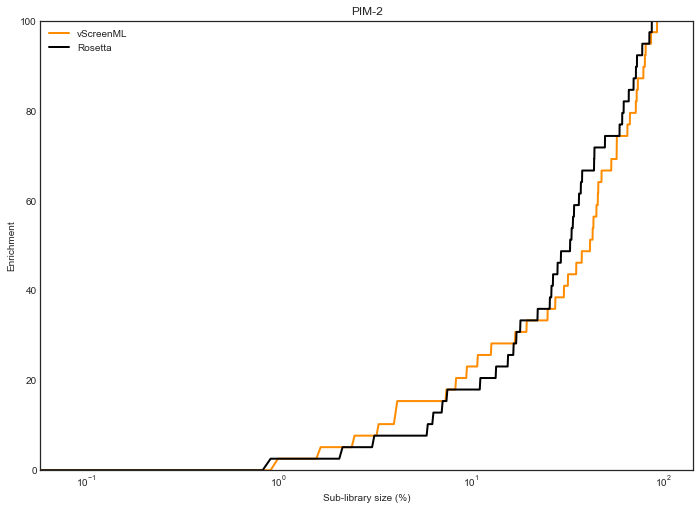

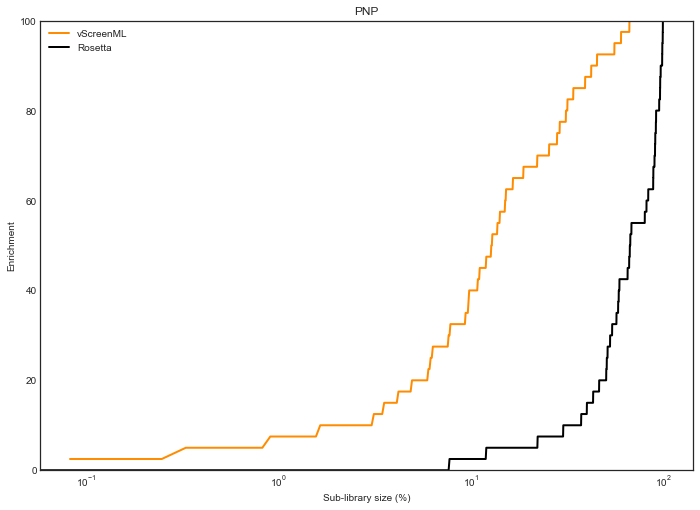

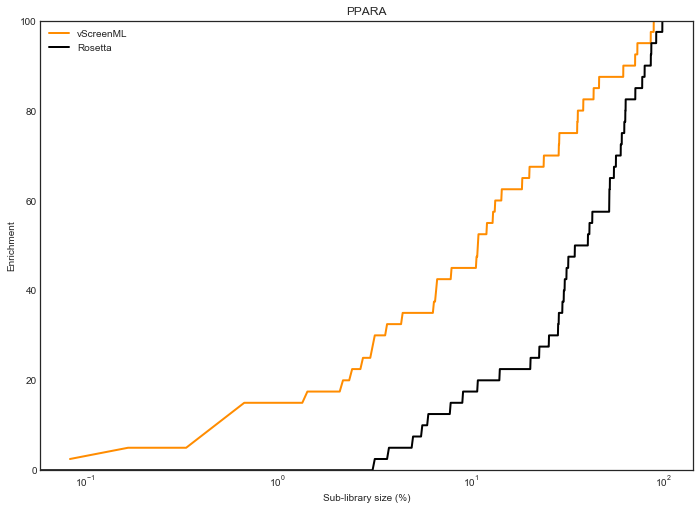

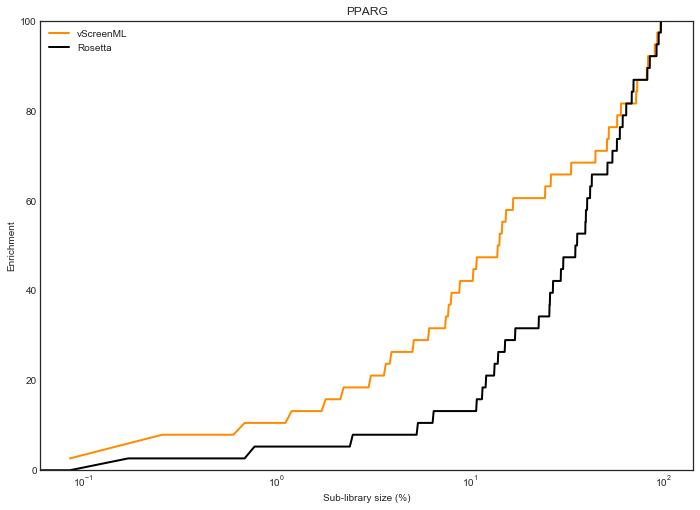

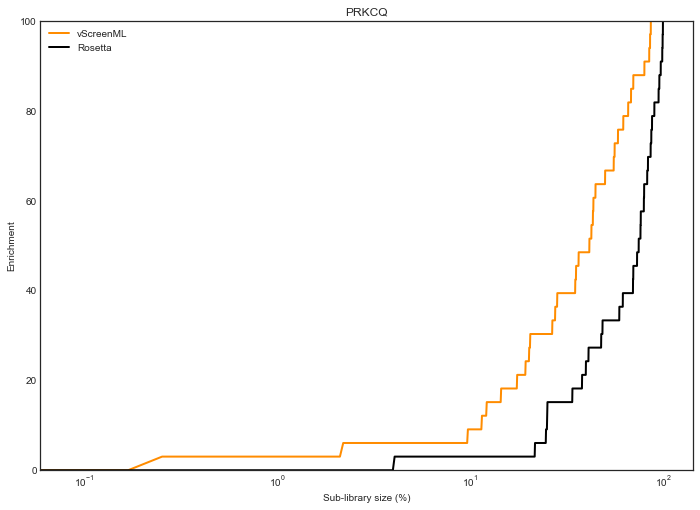

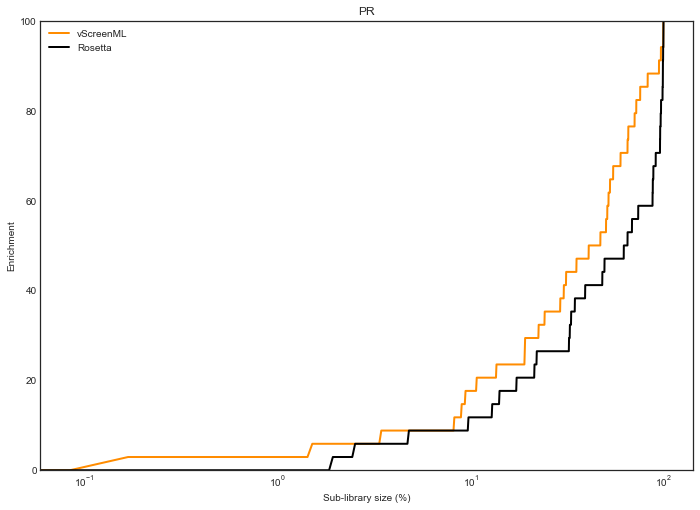

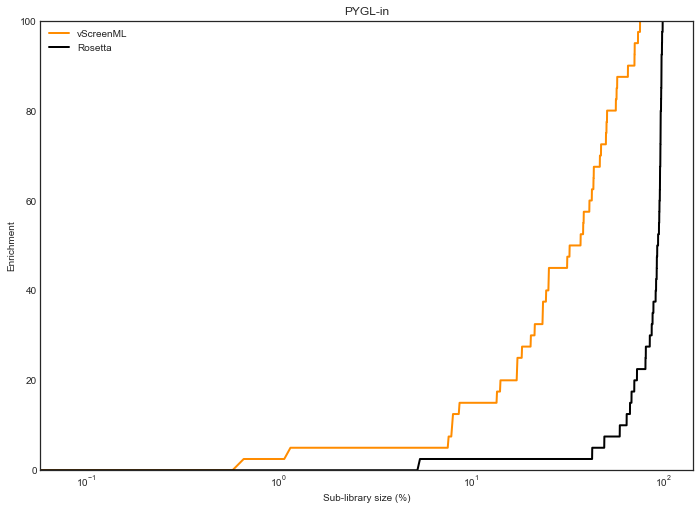

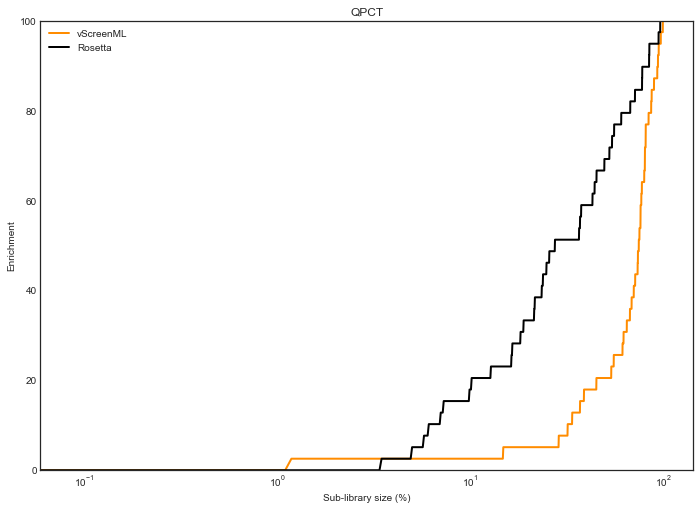

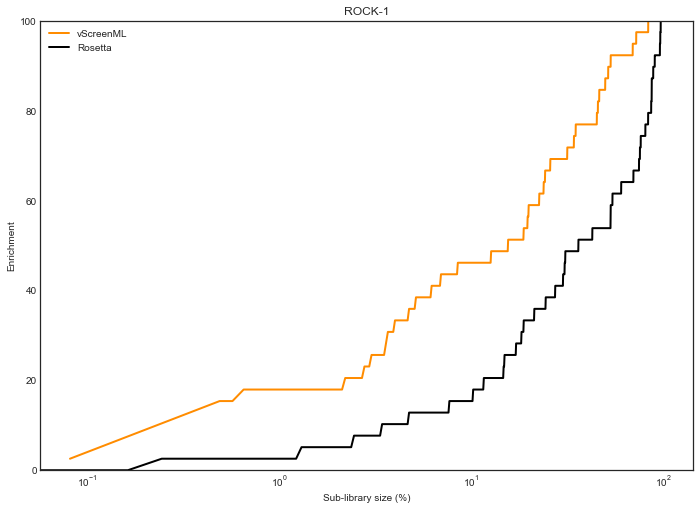

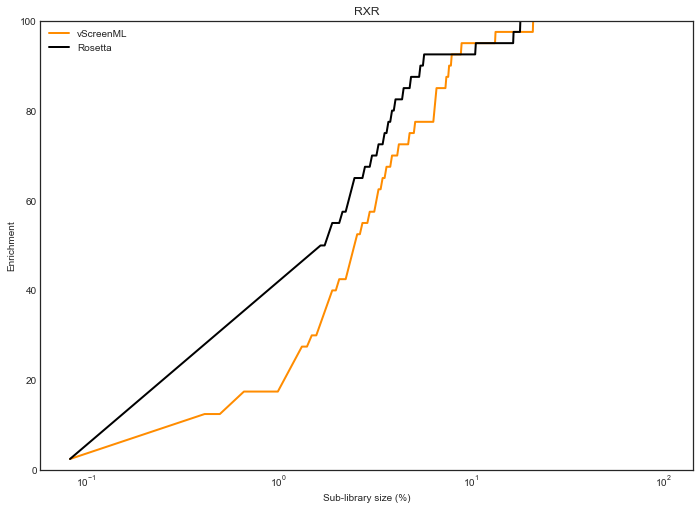

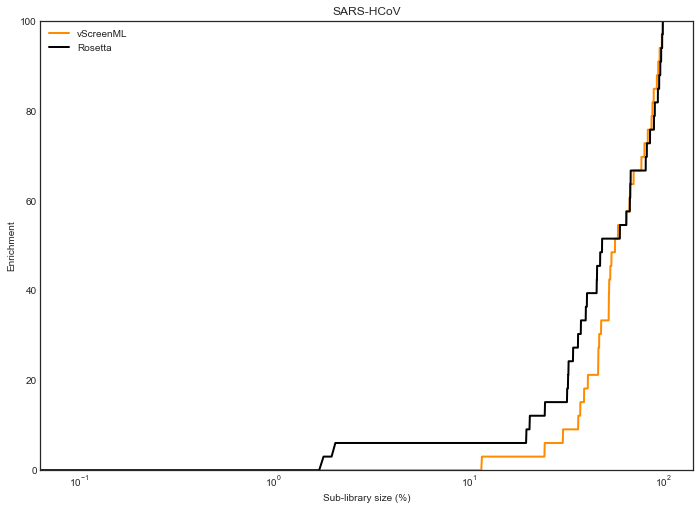

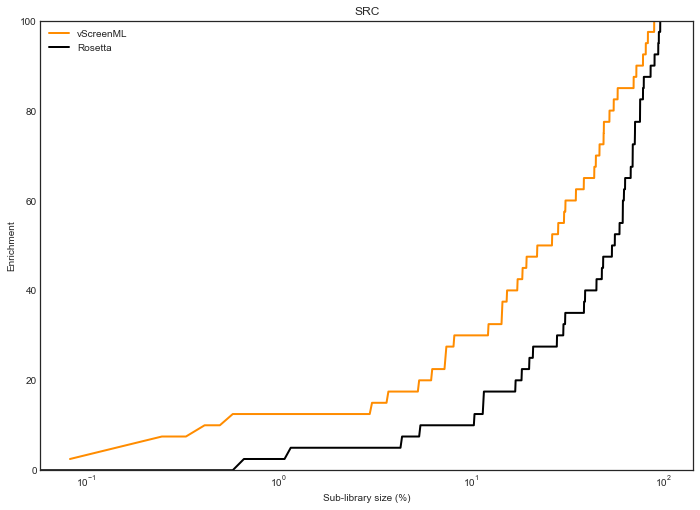

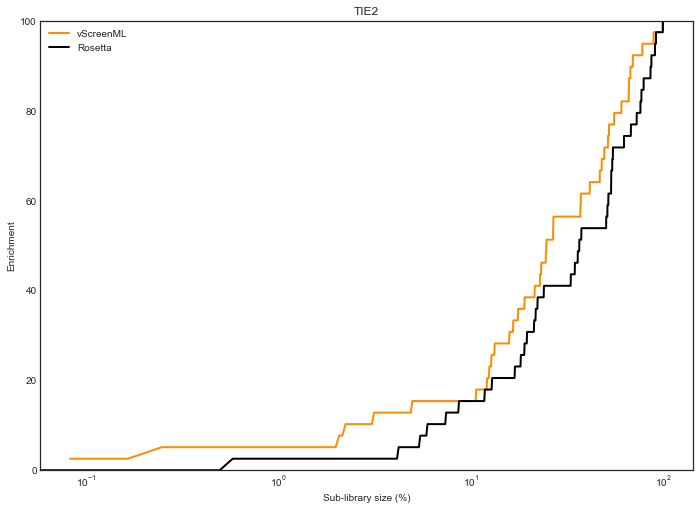

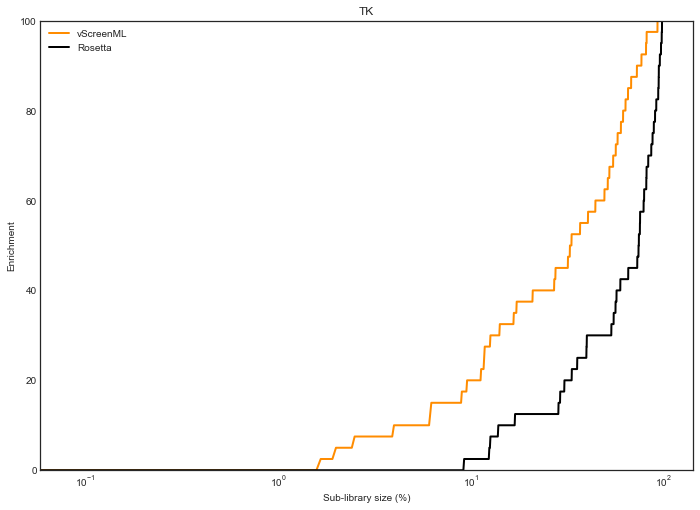

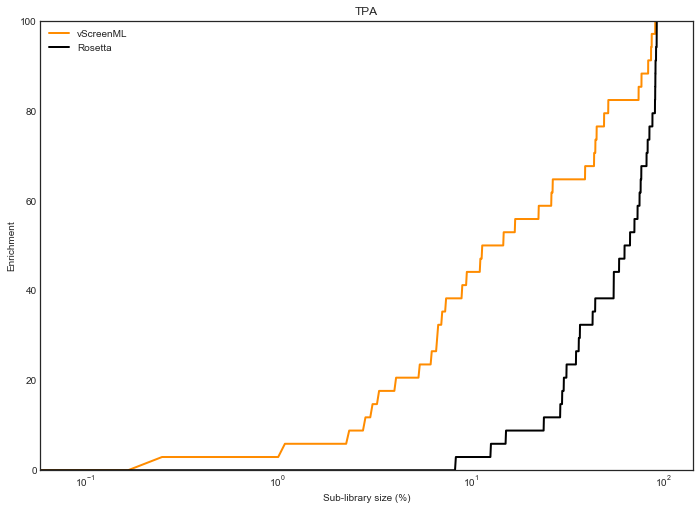

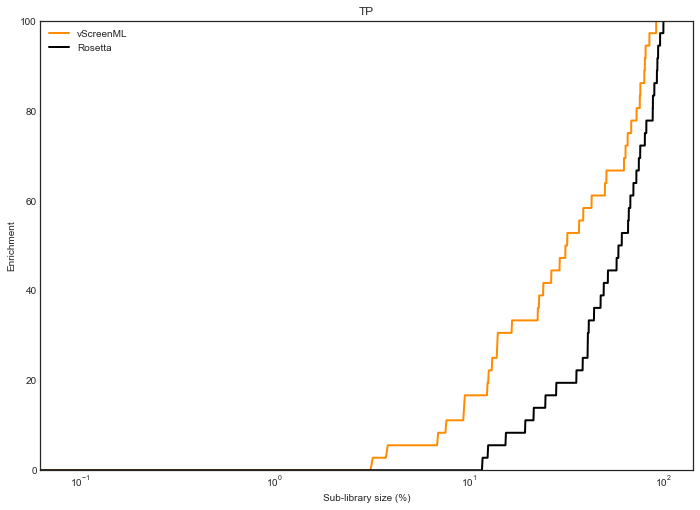

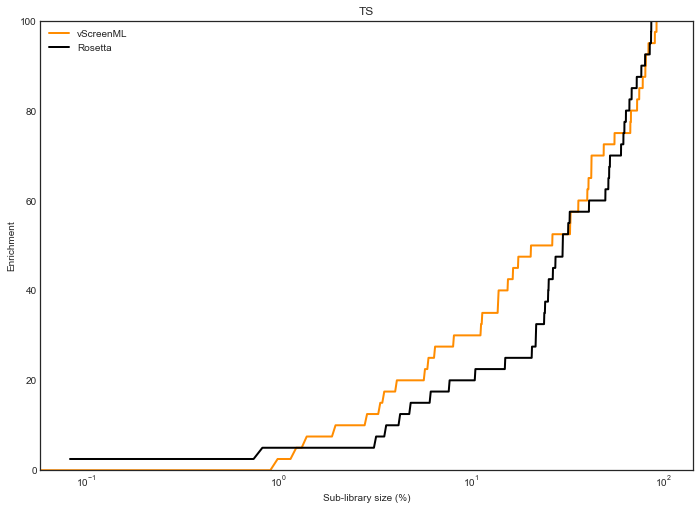

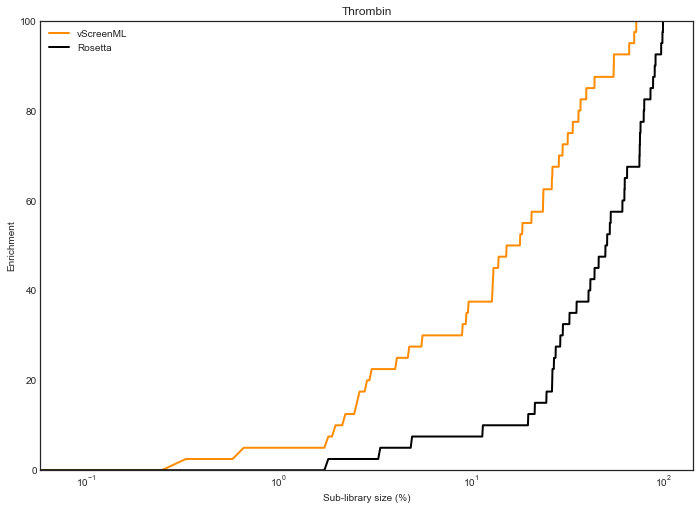

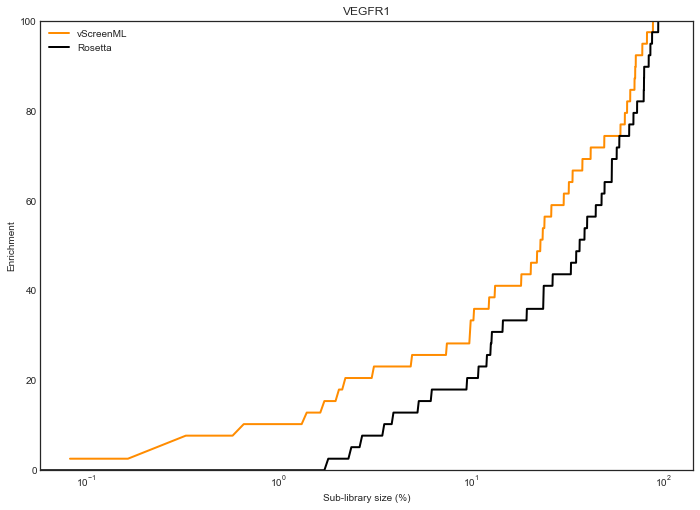

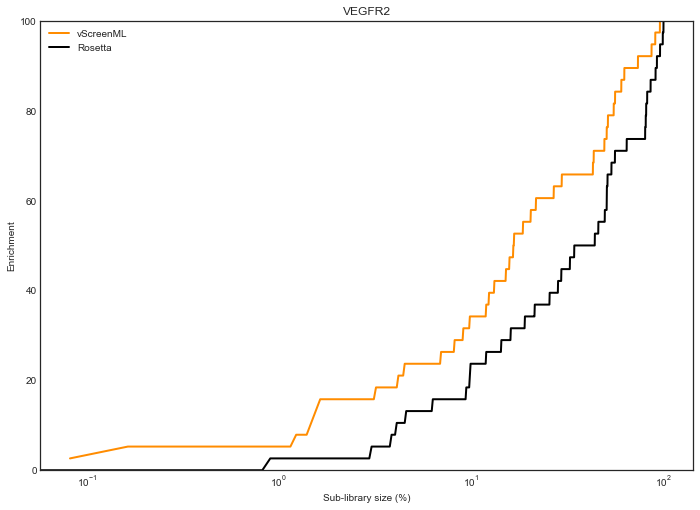

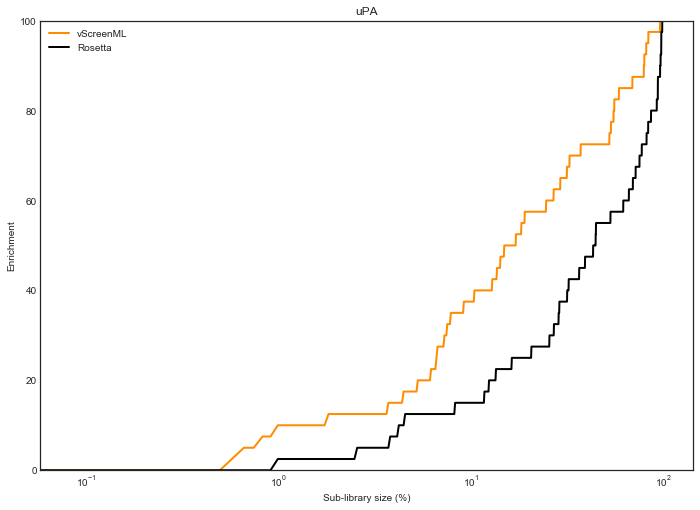

In [100]:
enrich_list_rf=[]

for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recalc_features/' + ifile+'_all_features_combined.csv', encoding="utf-8-sig")
    #compounds_list2 = pd.read_csv('/Users/yusuf/Downloads/DEKOIS2.0_library/final_' + ifile+'_rfscore_common.csv', encoding="utf-8-sig")
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol]]
    predict_rank_log_roc_other(clf,compounds_list, predictors,ifile)

In [7]:

def enrich_from_threshold(thresh, df_pred, column):
    random_hitrate = df_pred['Label'].sum()/float(len(df_pred['Label']))
    list_thresh_to_conf = []
    

    for i in thresh:
        #print thresh
        if column == "Pred":
            df_pred['Pred_binary'] = np.where(df_pred.Pred >= i, 1, 0)
            #print df_pred
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'],df_pred['Pred_binary']).ravel()
            #print (tn, fp, fn, tp)
            
            list_thresh_to_conf.append((float(tp)/(float(tp)+float(fp)+1e-9))/random_hitrate)
            
        elif column == "Interface_Energy":
            df_pred['I_E_transformed'] = -1*df_pred.Interface_Energy
            #print df_pred.I_E_transformed
            df_pred['Pred_binary'] = np.where(df_pred.I_E_transformed >= i, 1, 0)
            #print df_pred['Pred_binary']
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'],df_pred['Pred_binary']).ravel()
            #precision

            list_thresh_to_conf.append((float(tp)/(float(tp)+float(fp)+1e-9))/random_hitrate)
            
    return list_thresh_to_conf           

In [8]:
def predict_rank_log_roc_enrichment(model,test_x,predictors,name):
    #actual_positive=float(len(test_x1[test_x1["Label"] == 1]))
    y_test = test_x["Label"]
    #a = [ i/1000. for i in range(0,1000) ]
    dtest_pred = model.predict_proba(test_x[predictors])[:,1]
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, dtest_pred, pos_label=1)

    test_x["Pred"] = dtest_pred
        

    fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, -1*test_x.Interface_Energy, pos_label=1)
    #precision1 = [v for v in enrich_from_threshold(thresholds1, test_x, "Pred")] 
    precision1 = enrich_from_threshold(thresholds1, test_x, "Pred")
    perc1 = [v for k,v in threshold_to_frac_lib(thresholds1, test_x, "Pred")]  
    
    #precision2 = [v for v in enrich_from_threshold(thresholds2, test_x, "Interface_Energy")]
    precision2 =  enrich_from_threshold(thresholds2, test_x, "Interface_Energy")
    perc2 = [v for k,v in threshold_to_frac_lib(thresholds2, test_x, "Interface_Energy")]
    df_out_vs = pd.DataFrame()
    df_out_ros = pd.DataFrame()
    df_out_vs['lib_size1'] = perc1
    df_out_vs['enrichment_vscreenml1'] = precision1
    df_out_ros['lib_size2'] = perc2
    df_out_ros['enrichment_vscreenml2'] = precision2

    df_out_vs.to_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recalc_features/'+name+'benchmark_prism_vs.csv')
    df_out_ros.to_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recalc_features/'+name+'benchmark_prism_ros.csv')
    plt.figure()
    
    lw = 2
    
    #plt.plot(fpr1, tpr1, color='darkorange',
    plt.plot(perc1, precision1, color='darkorange',
         lw=lw, label='vScreenML')
    
    #plt.plot(fpr2, tpr2, color='black',label='Rosetta',
    plt.plot(perc2, precision2, color='black',label='Rosetta',
         lw=lw)
    #print perc2, precision2
    #plt.plot(fpr3, tpr3, color='red',label='RF-ScoreVS',
    #     lw=lw)
    #plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    #plt.plot(a, a, color='navy', lw=lw, linestyle='--',label='Random')
    #plt.xlim([0.0, 1000])
    #plt.ylim([0.0, 40])
    plt.xscale('log')
    plt.ylabel('Enrichment')
    plt.xlabel('Sub-library size (%)')
    plt.title(name)
    plt.legend(loc="upper left")
    plt.show()
    #plt.close('all')

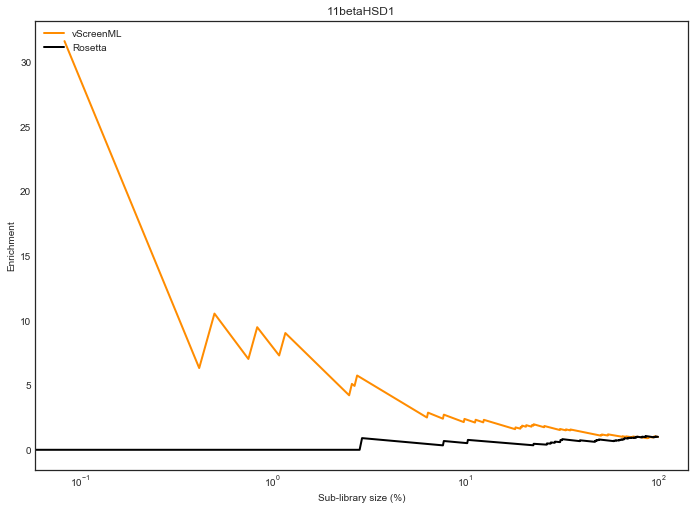

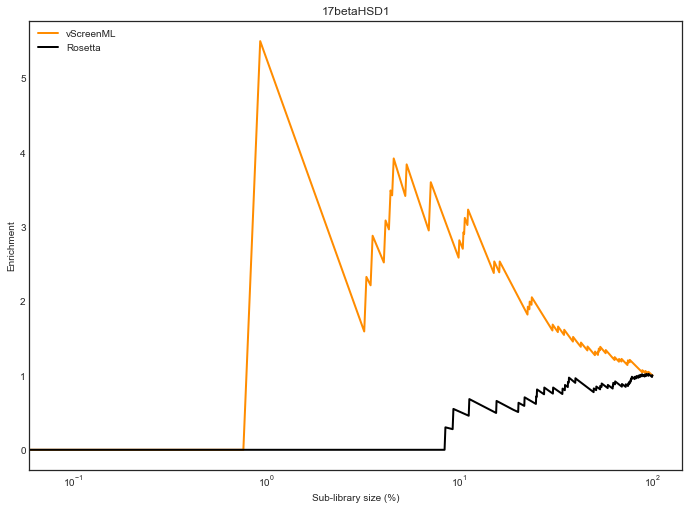

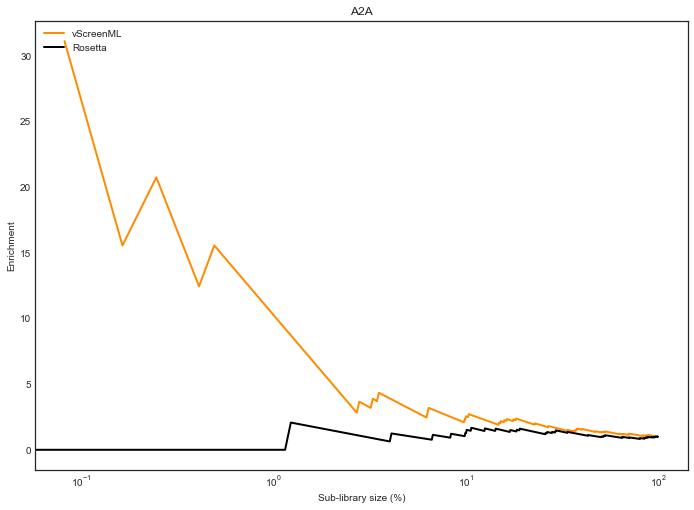

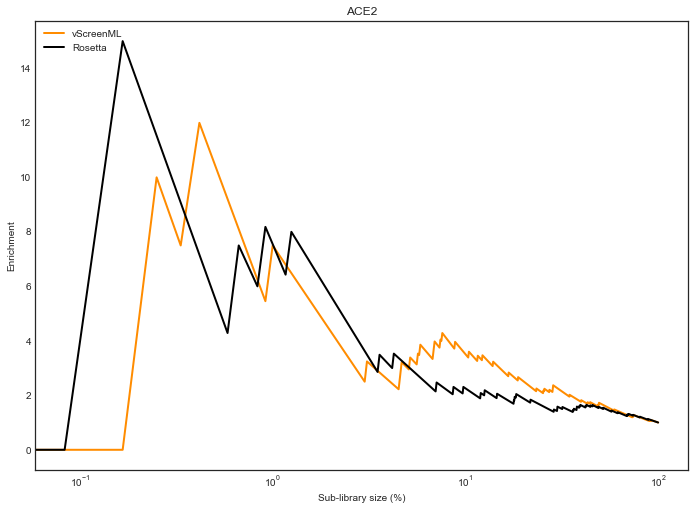

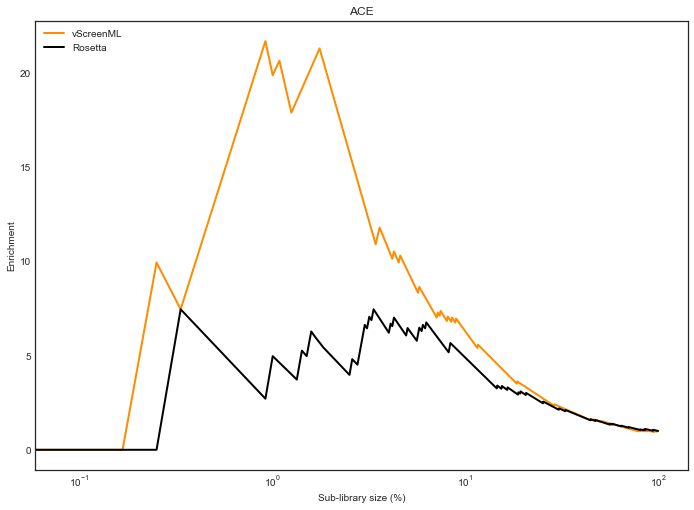

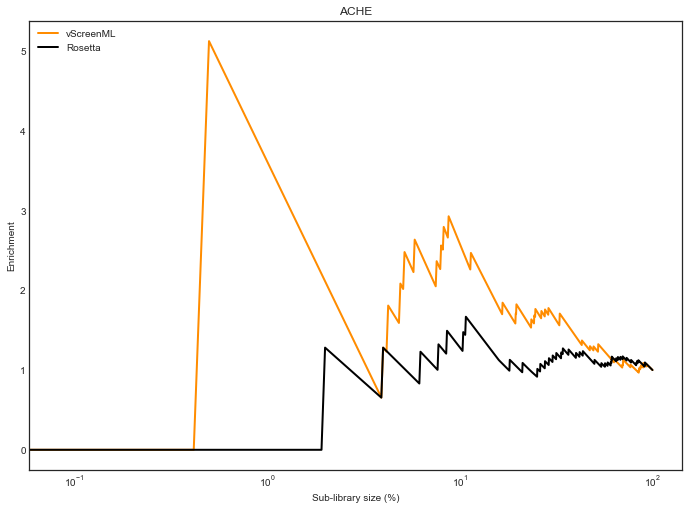

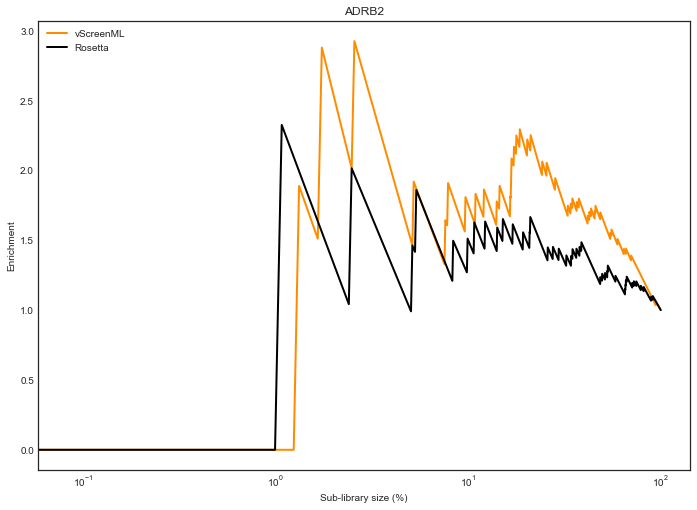

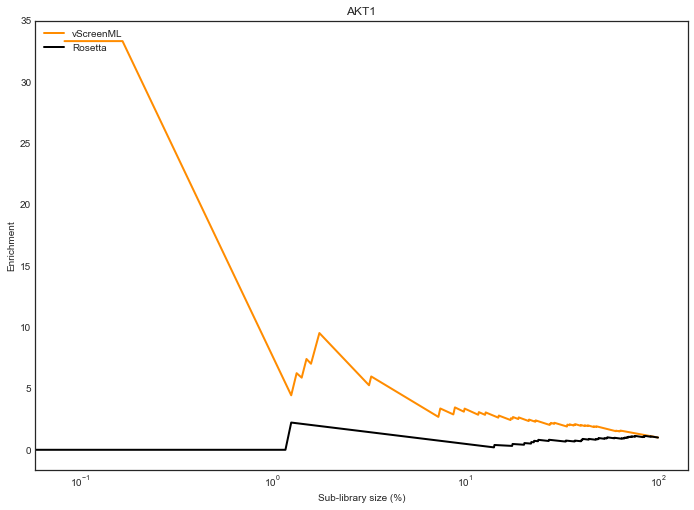

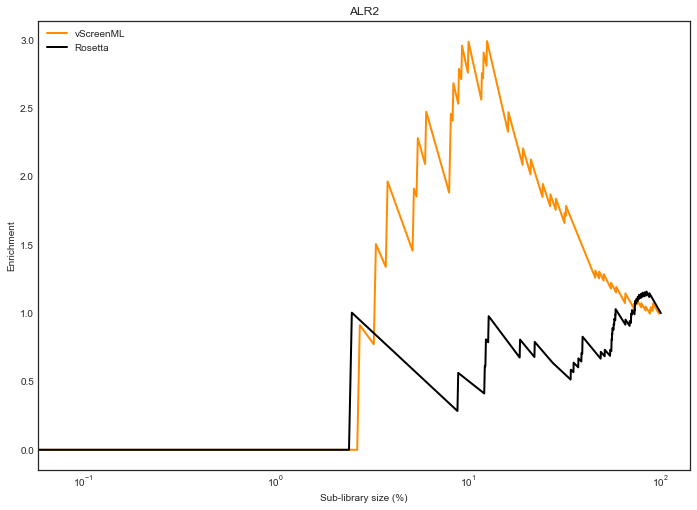

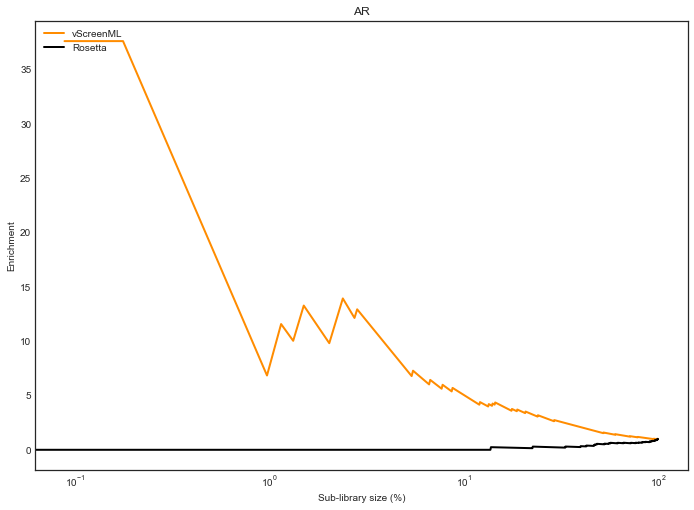

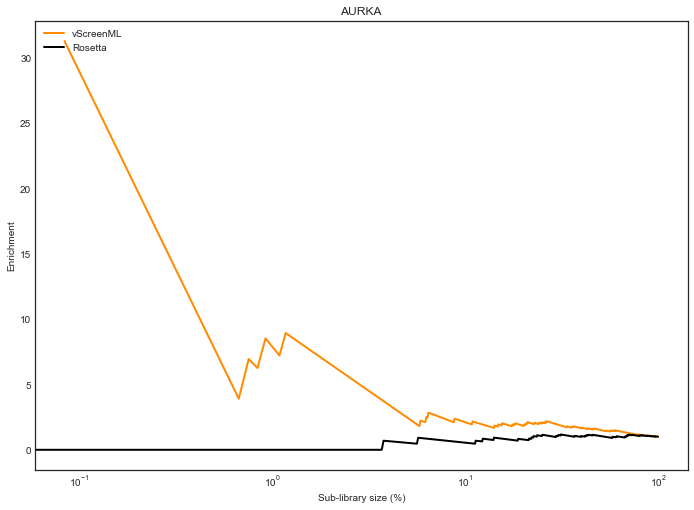

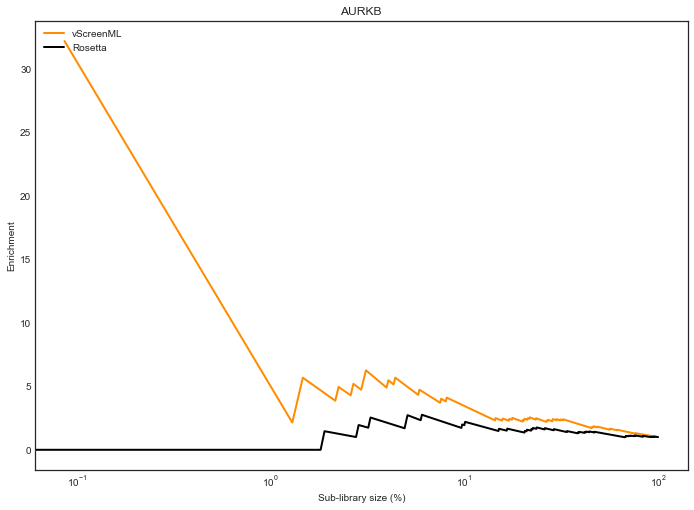

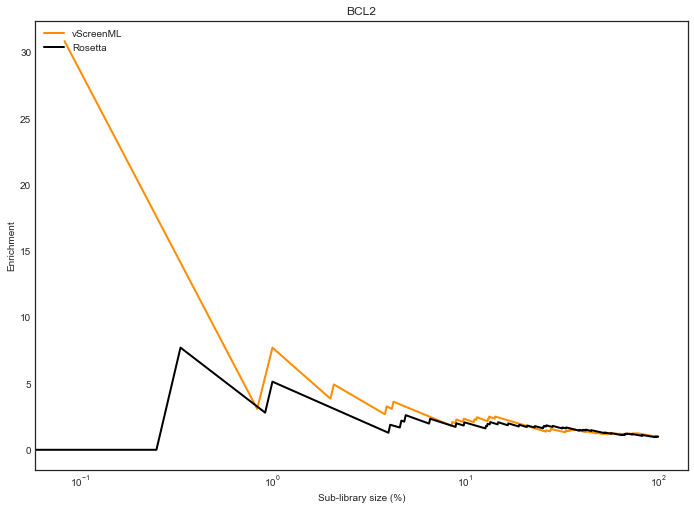

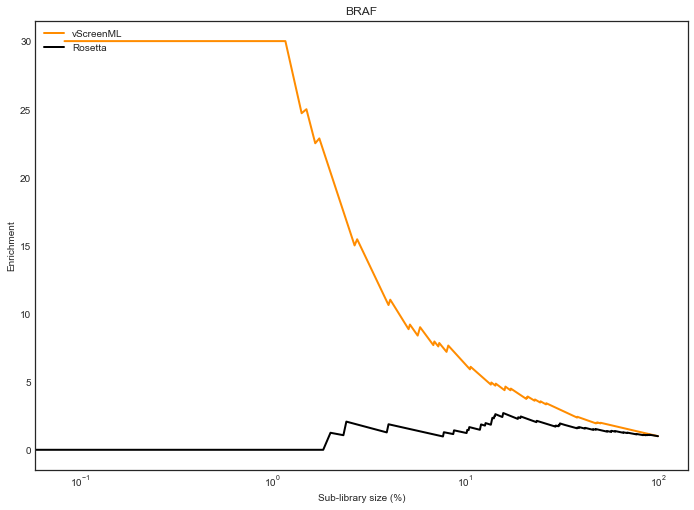

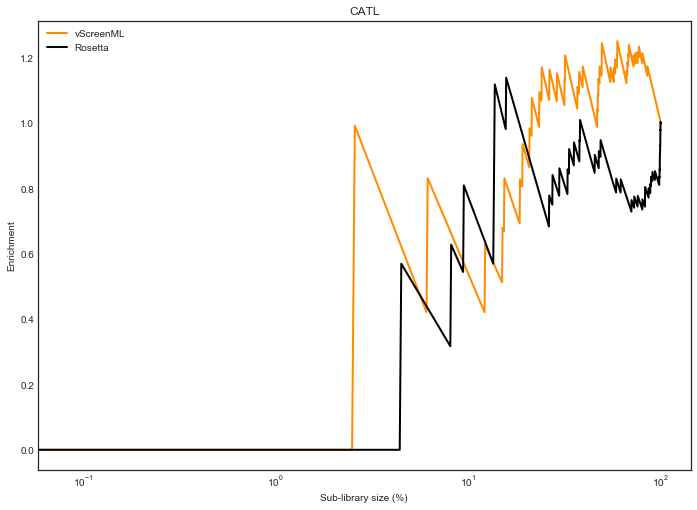

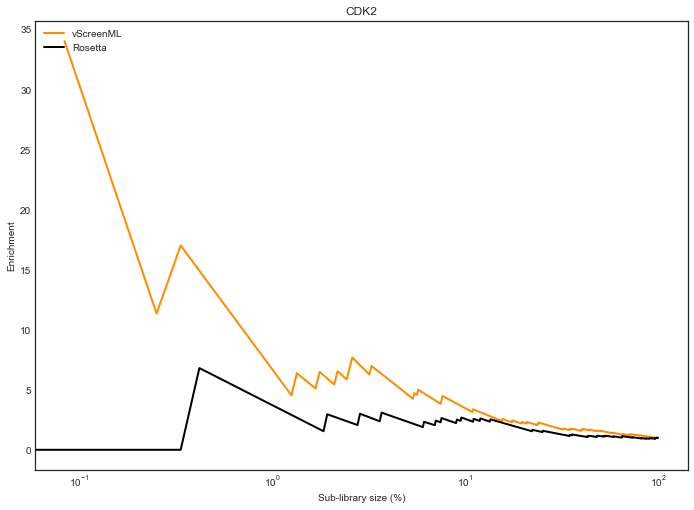

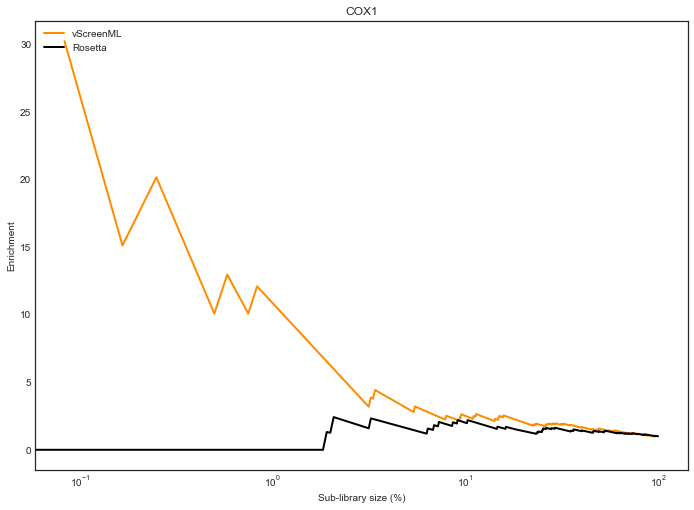

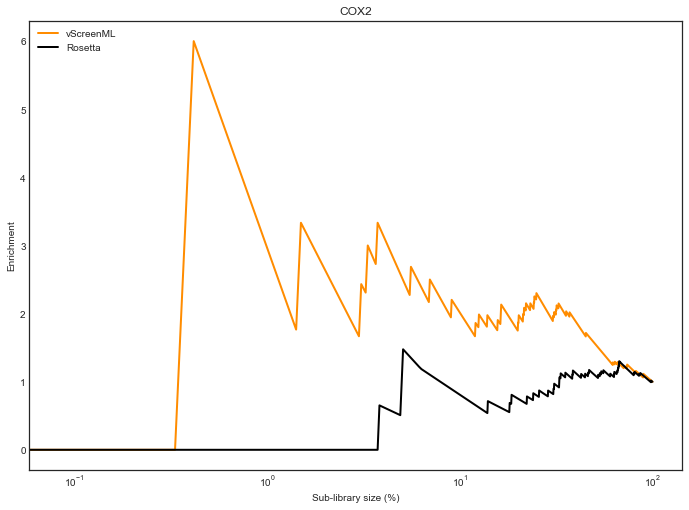

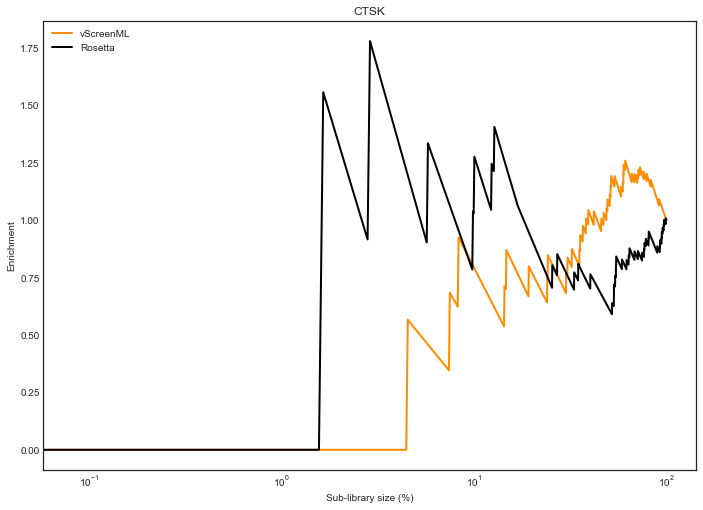

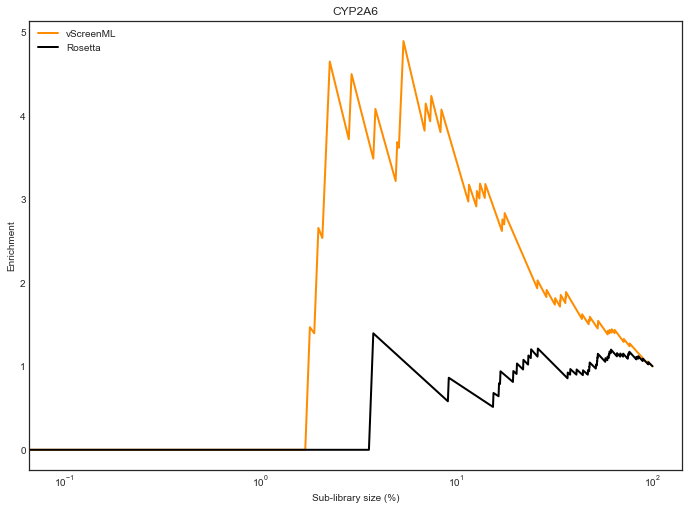

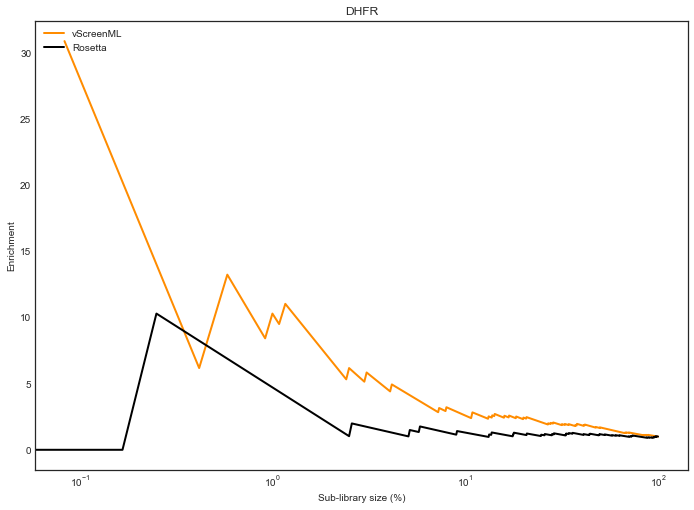

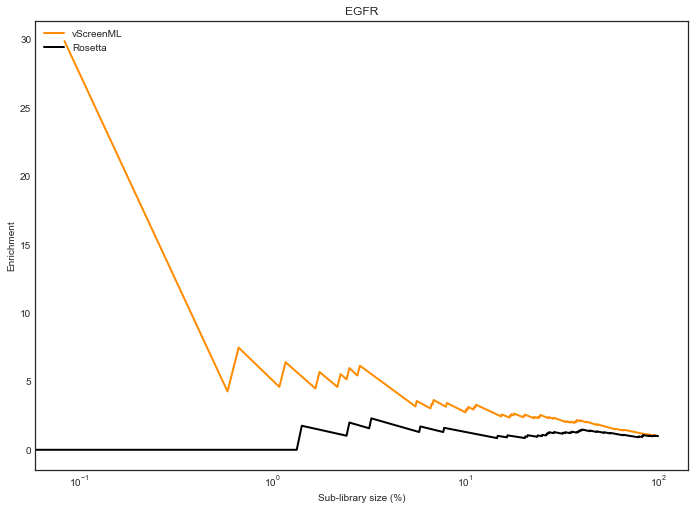

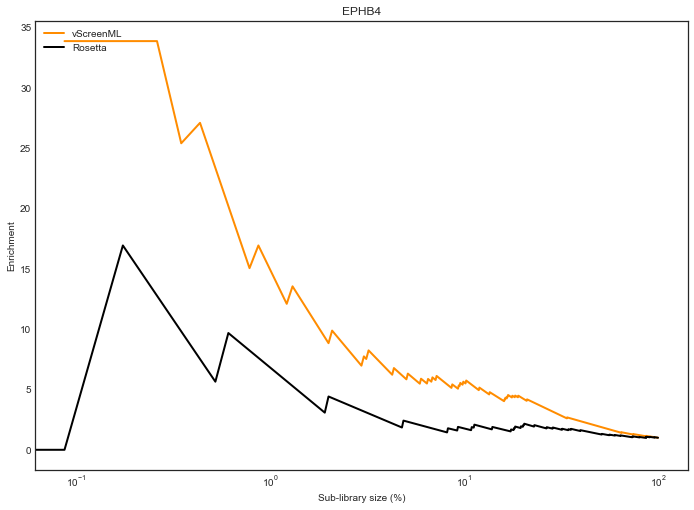

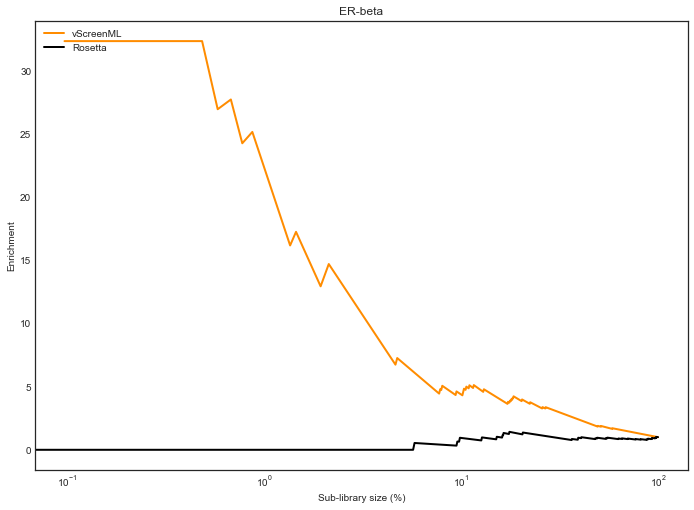

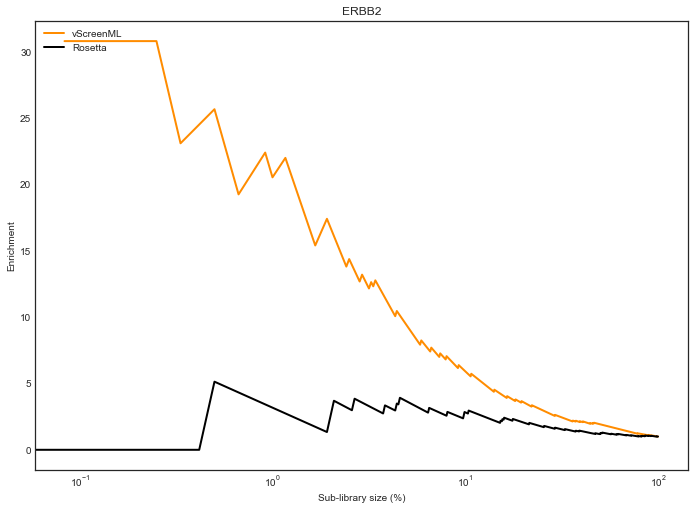

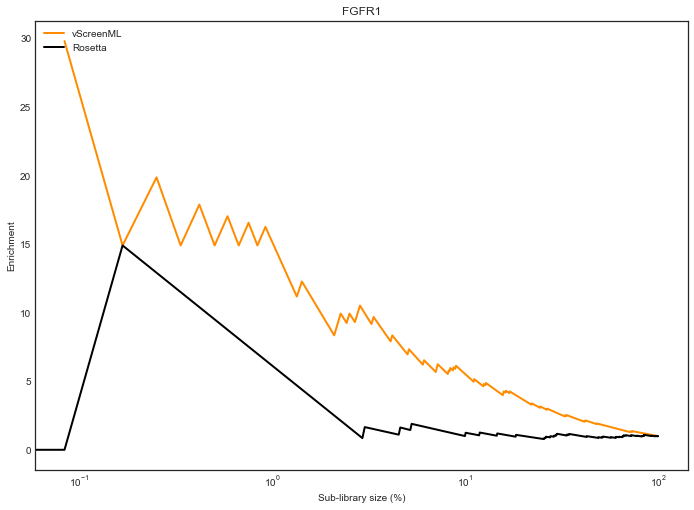

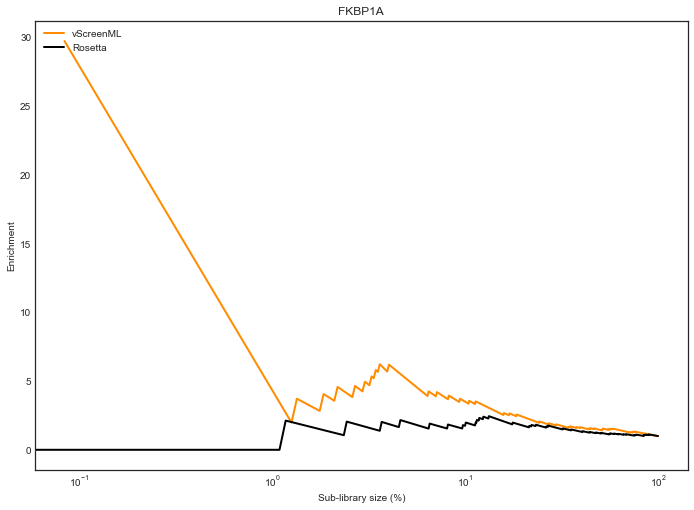

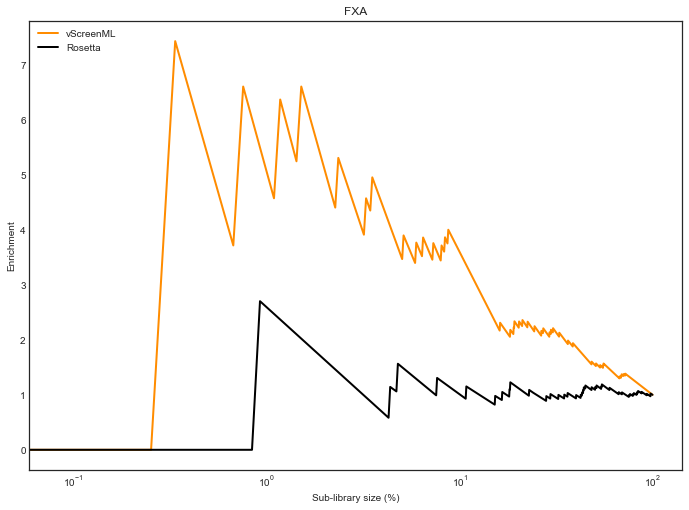

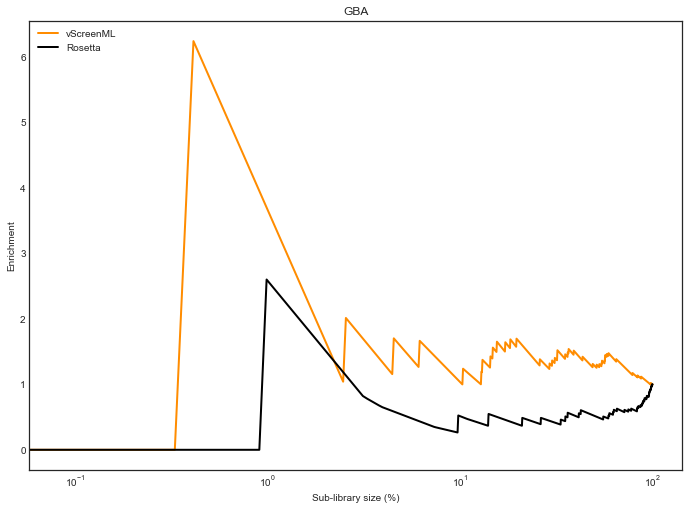

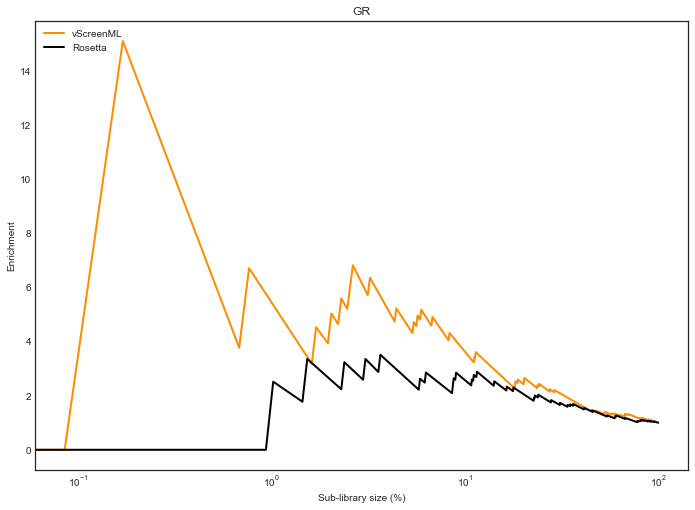

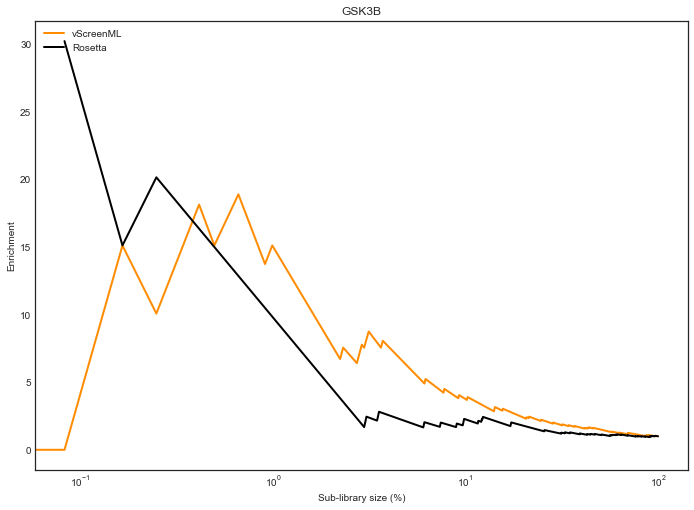

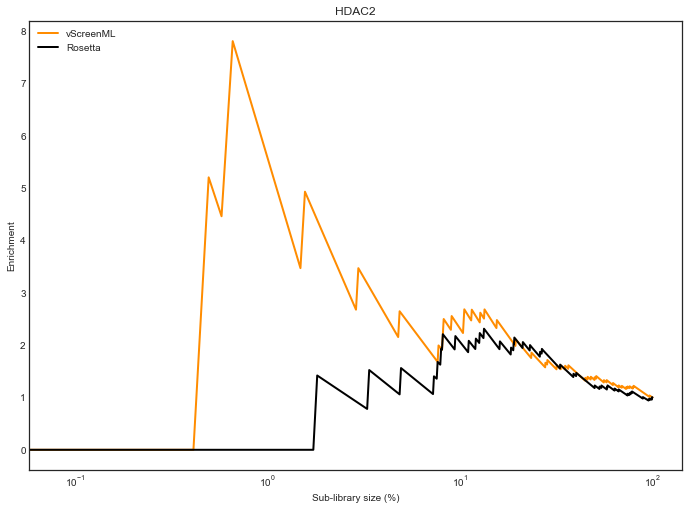

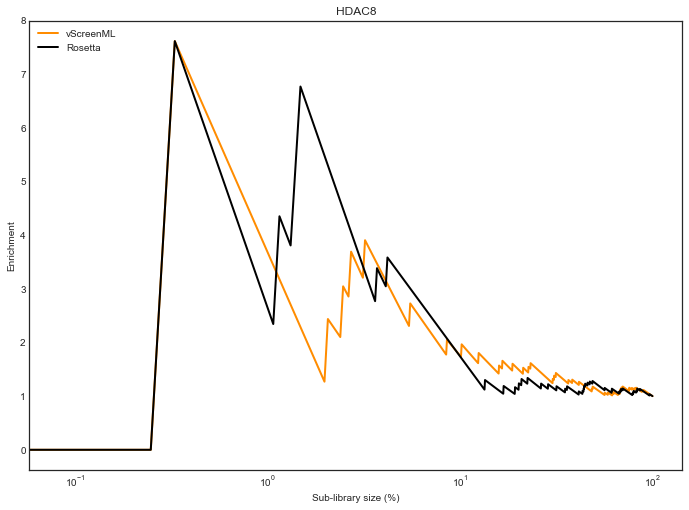

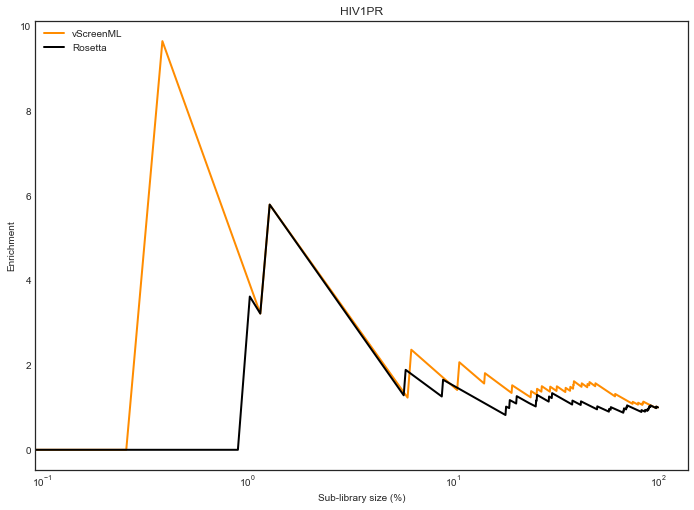

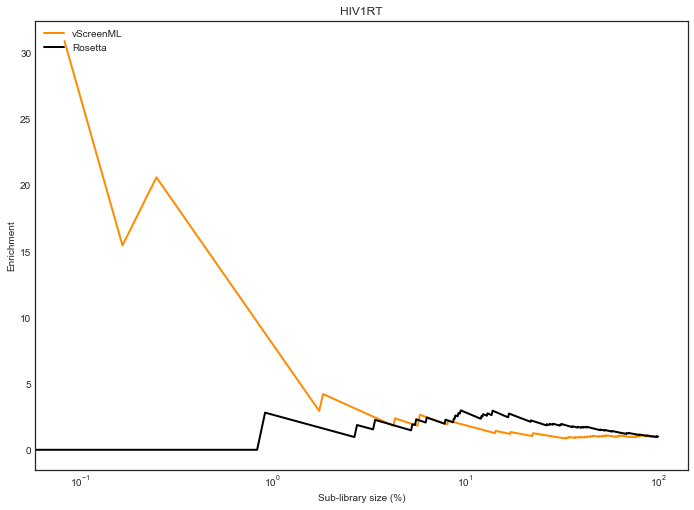

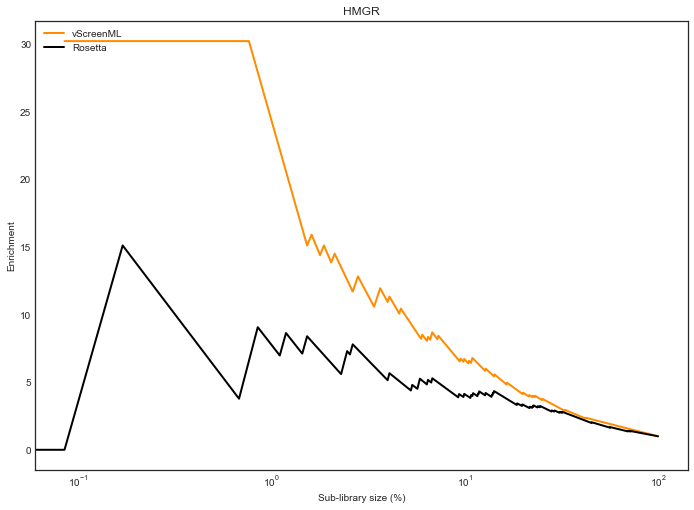

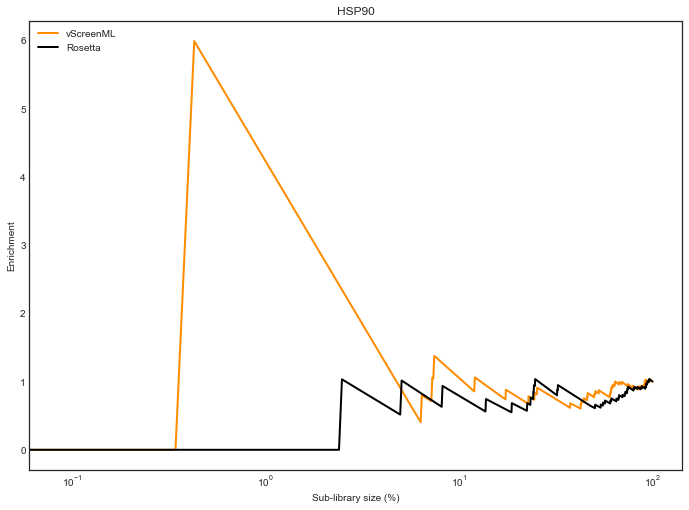

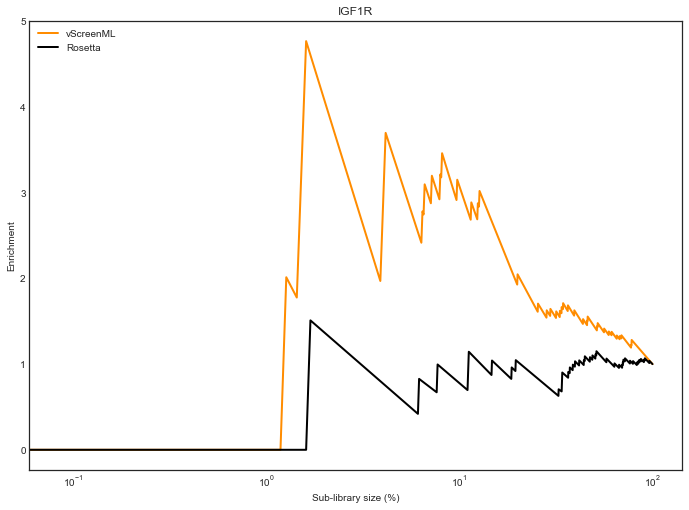

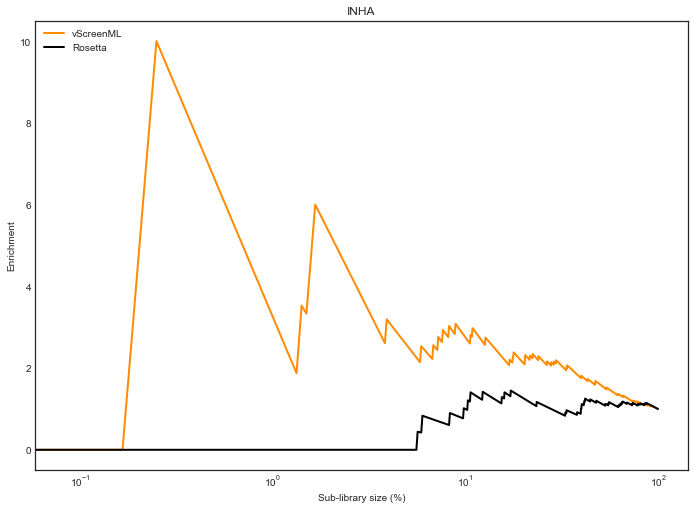

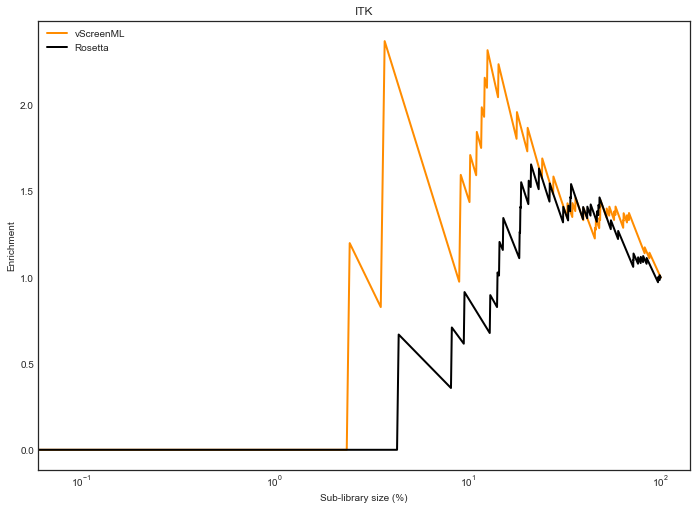

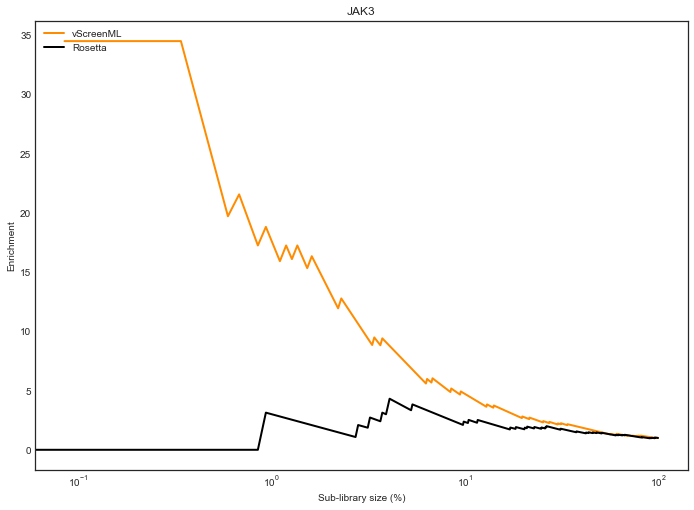

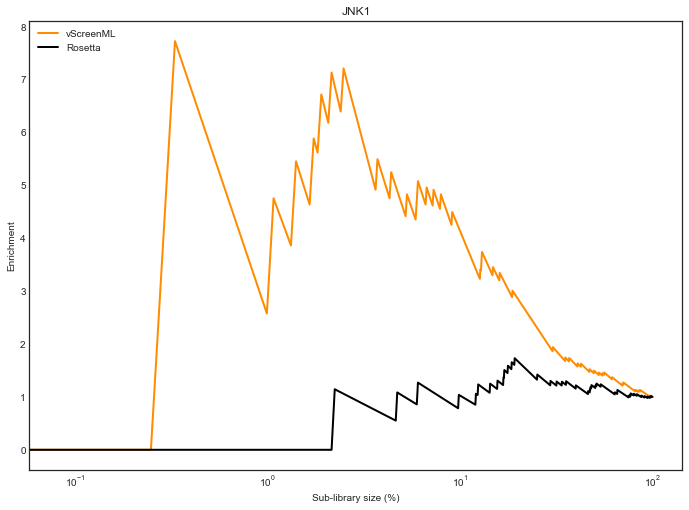

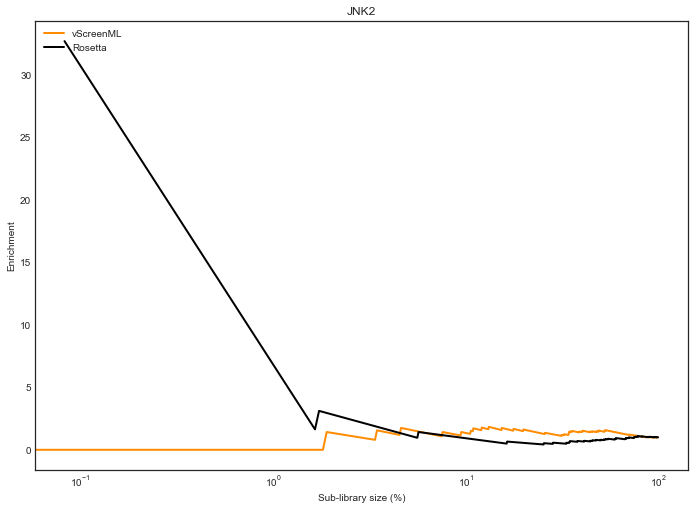

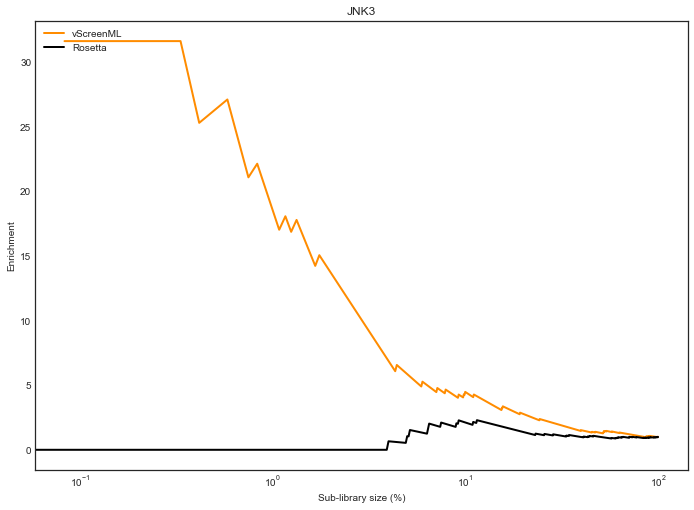

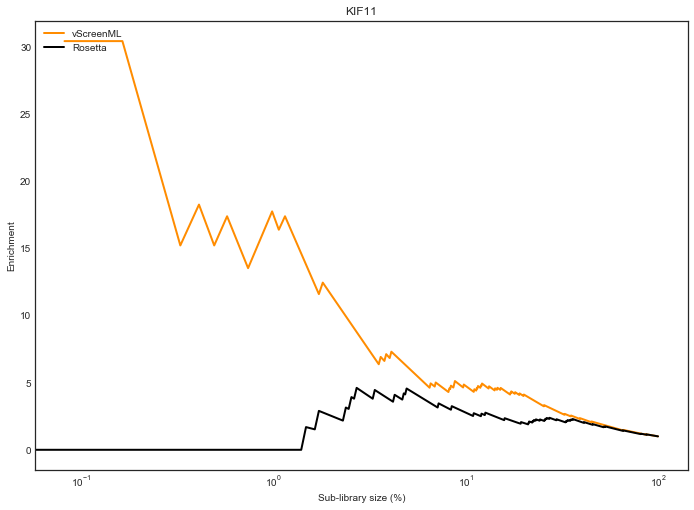

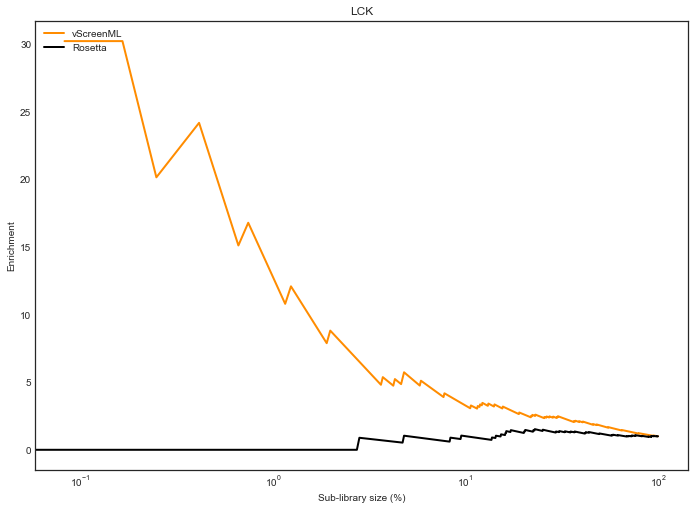

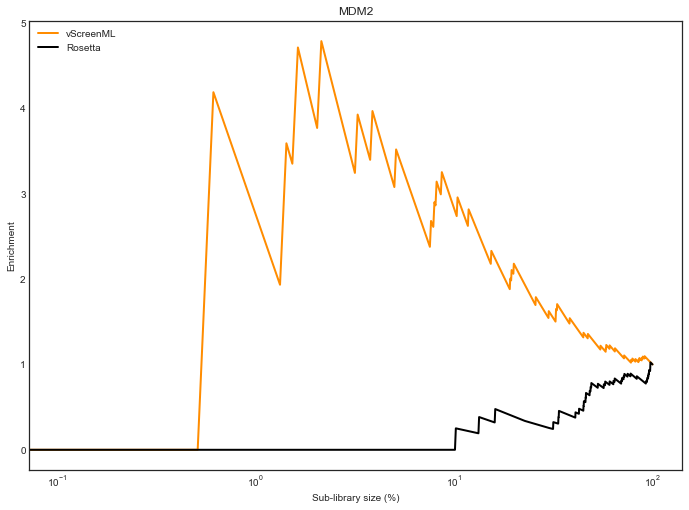

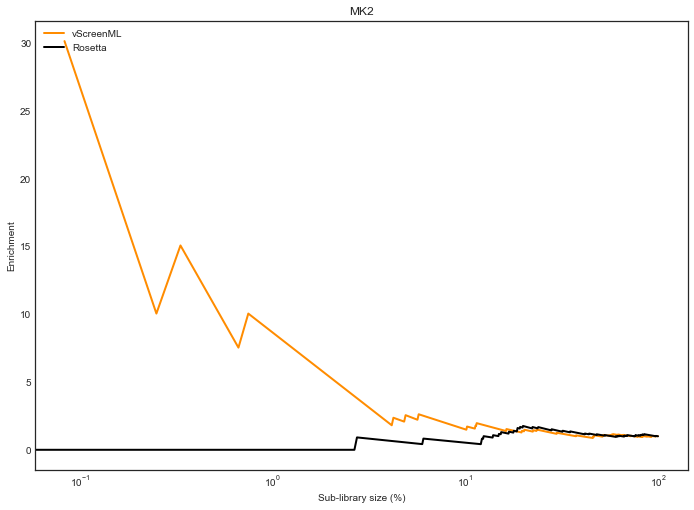

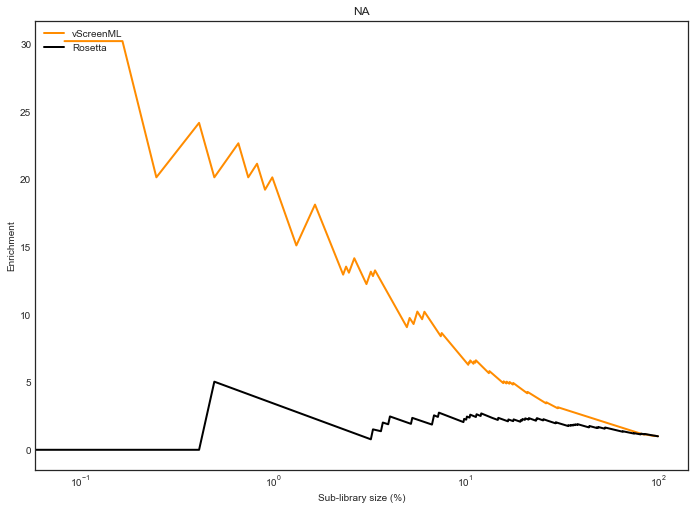

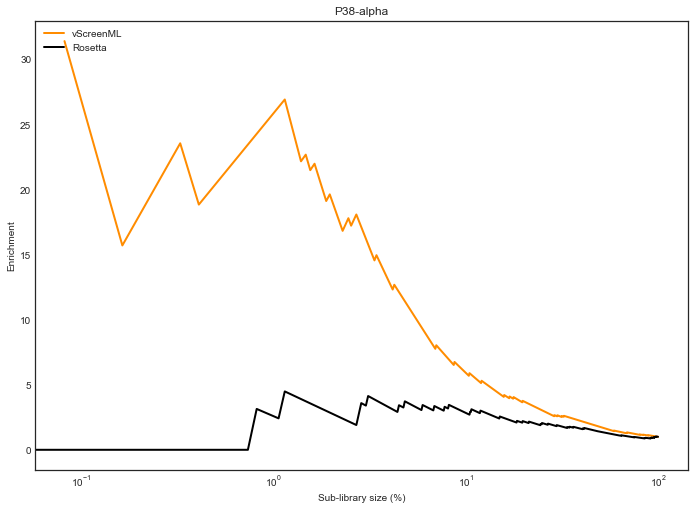

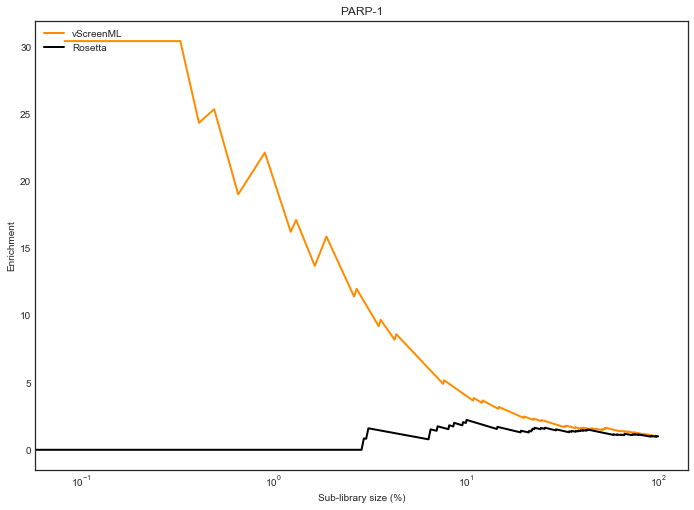

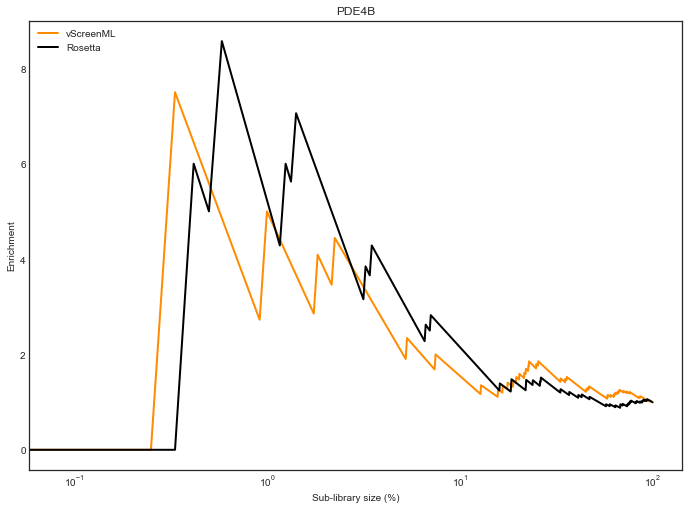

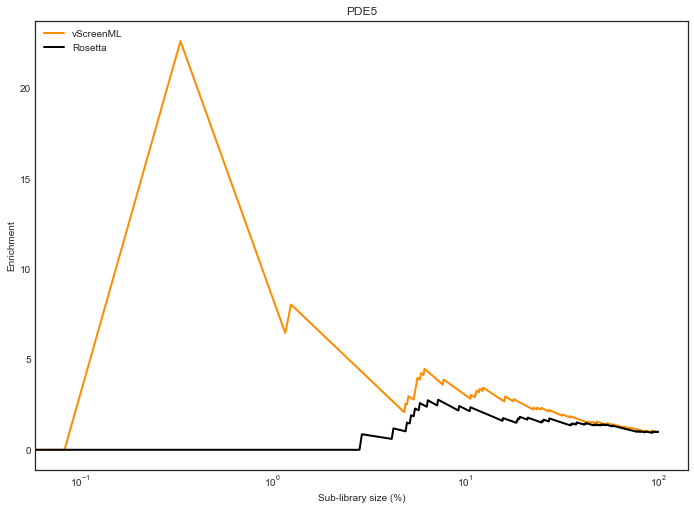

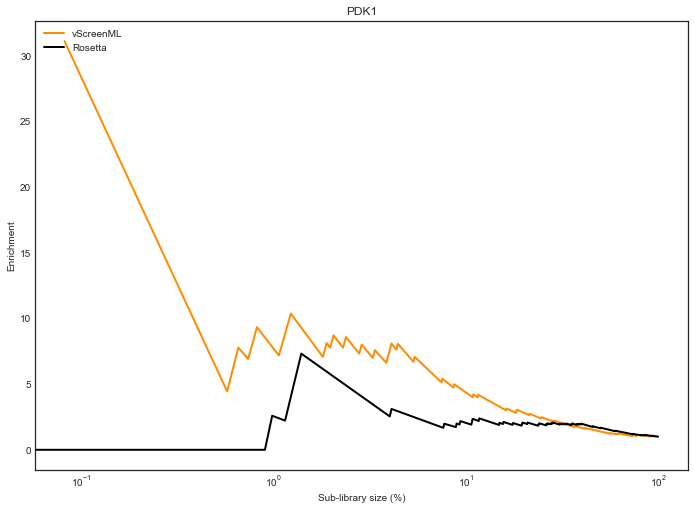

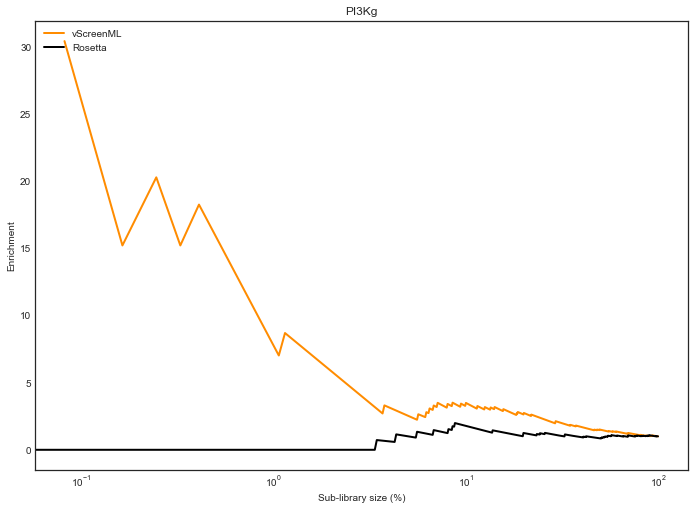

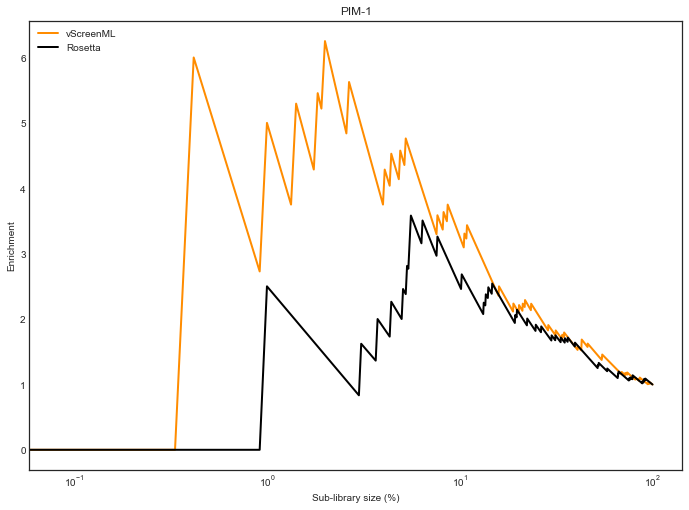

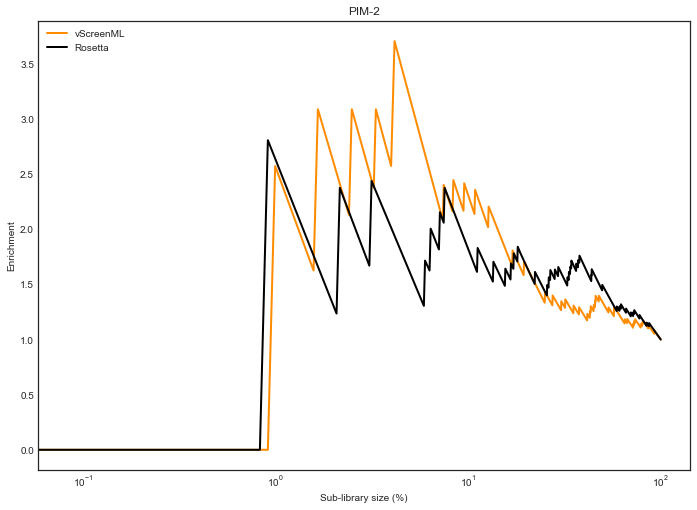

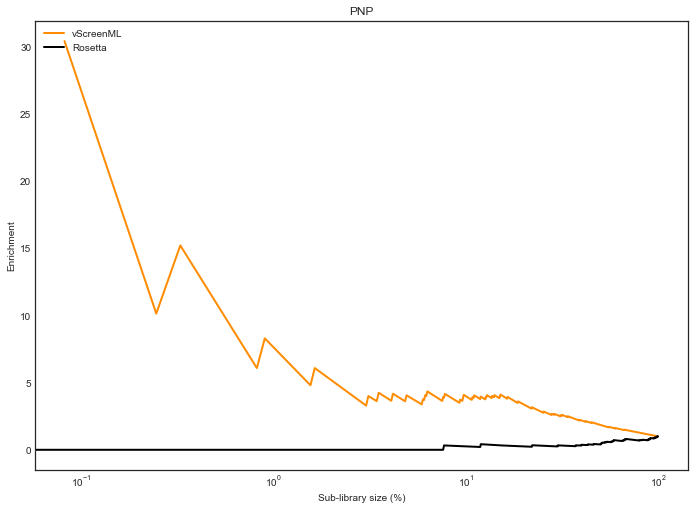

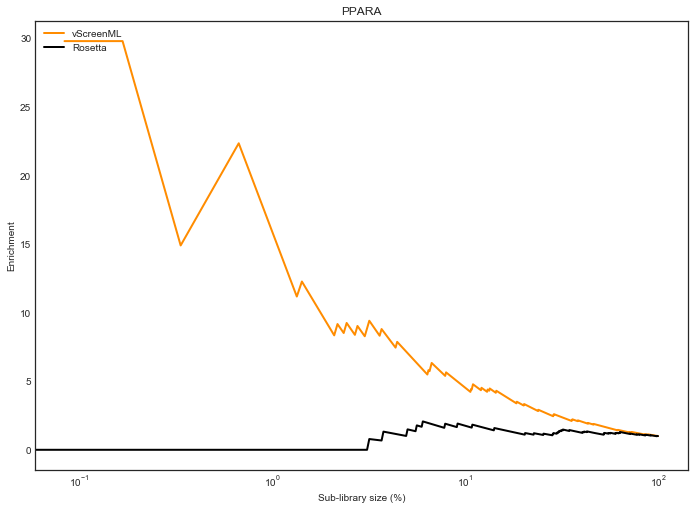

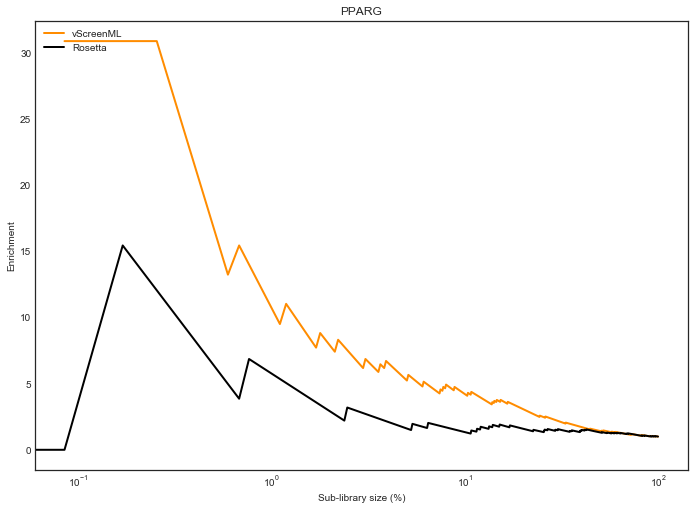

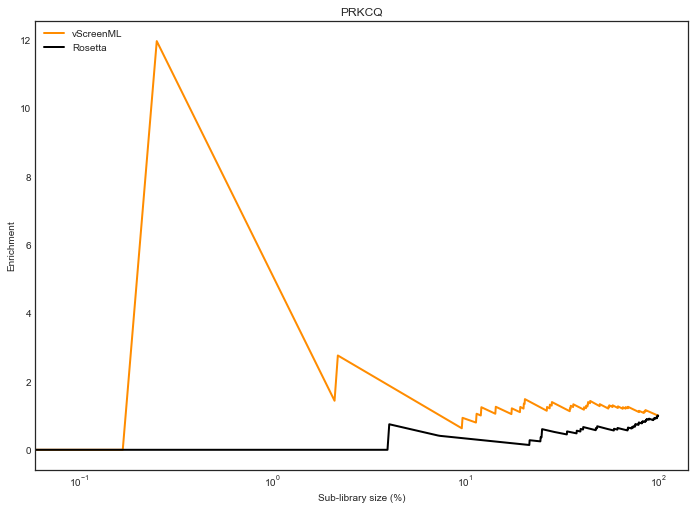

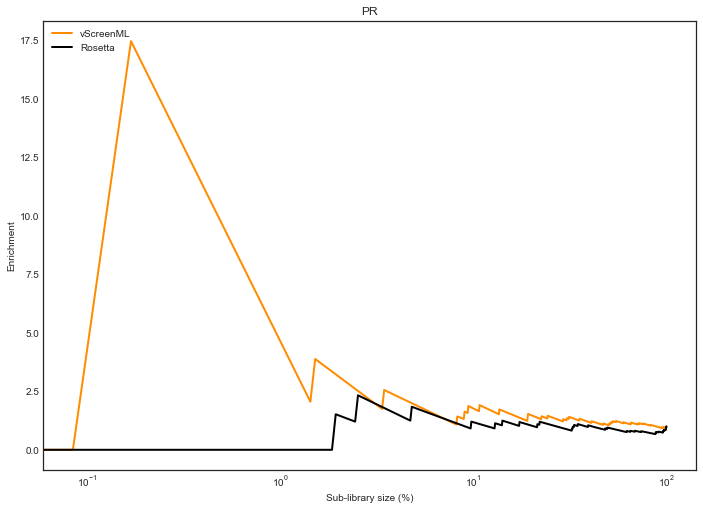

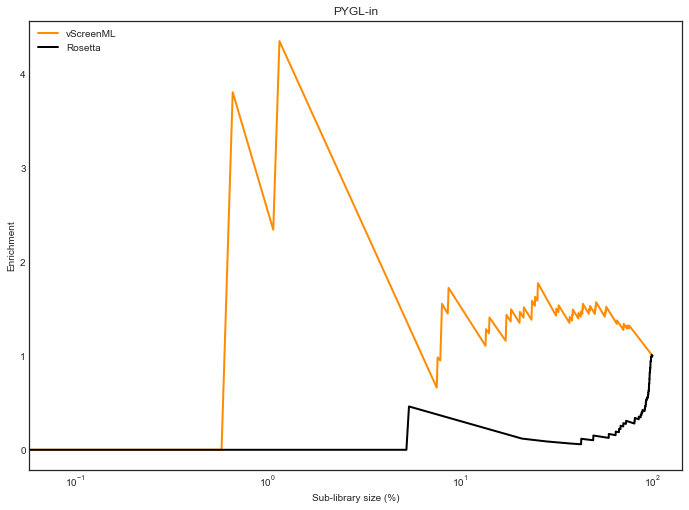

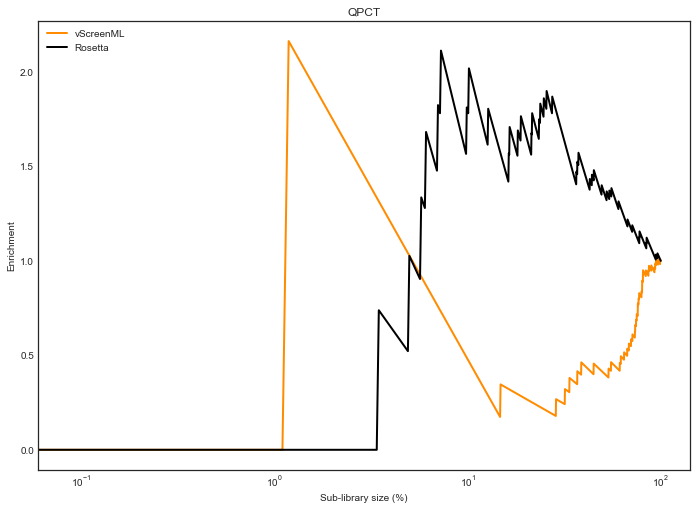

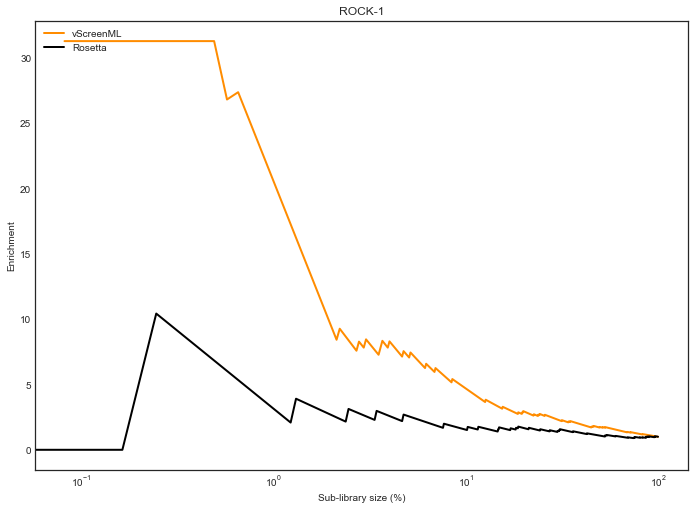

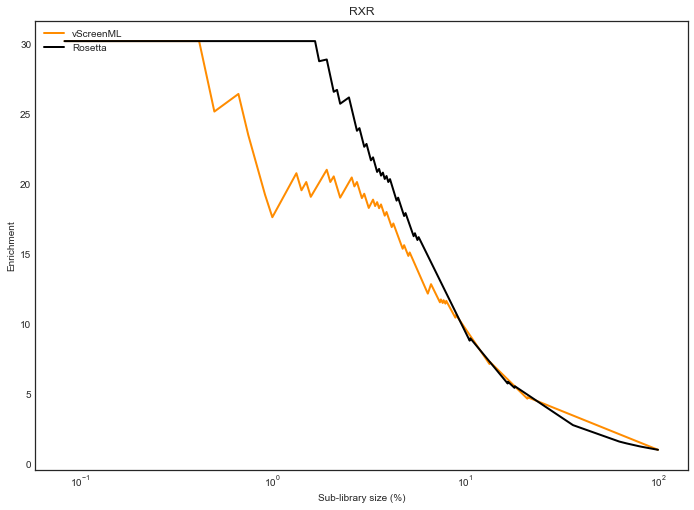

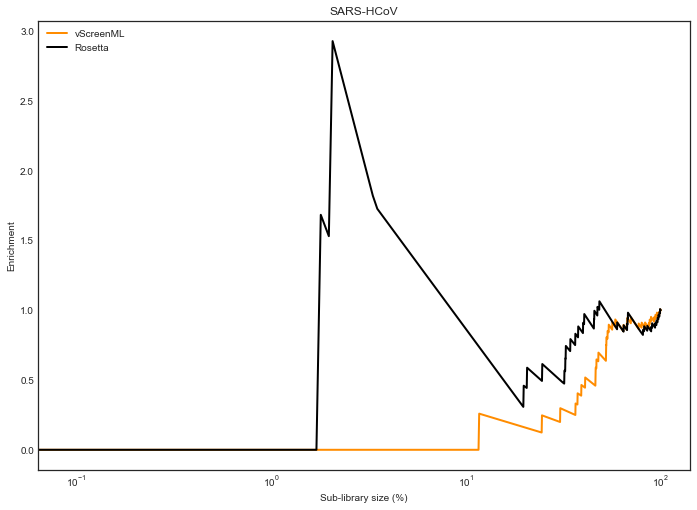

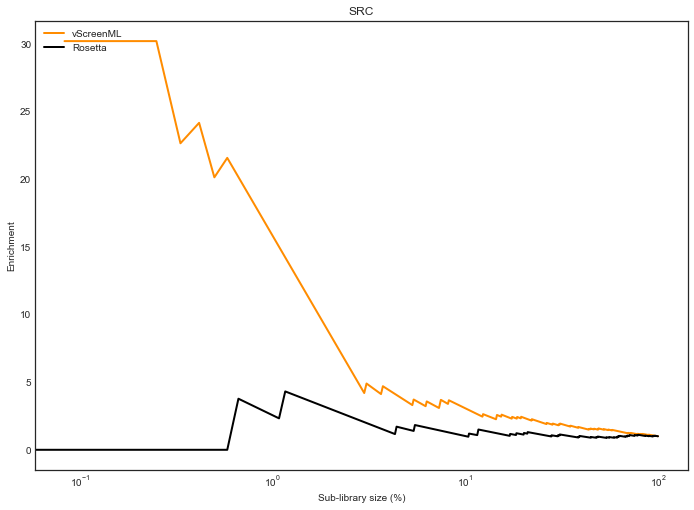

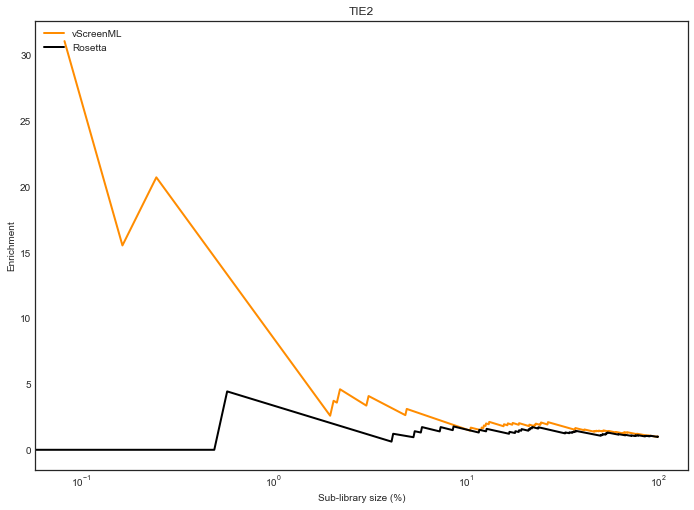

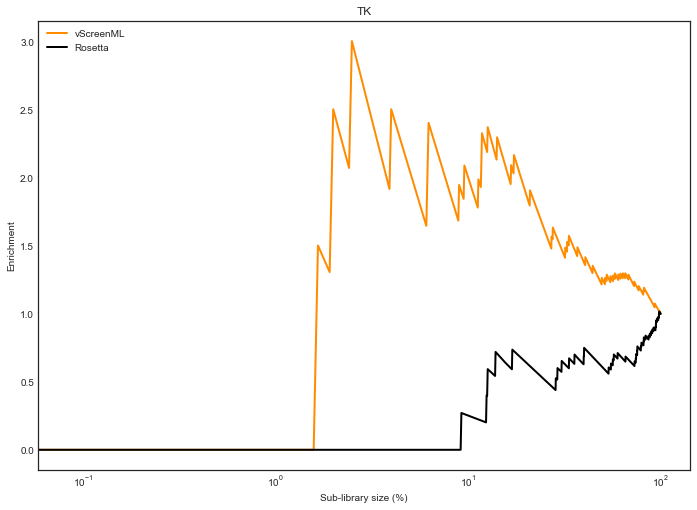

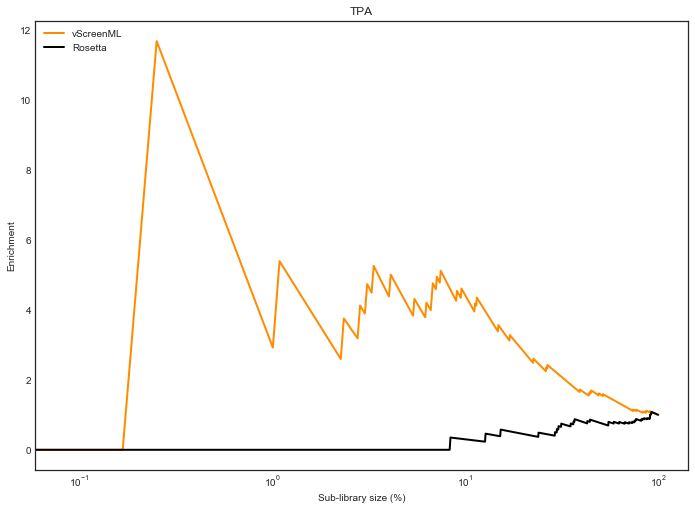

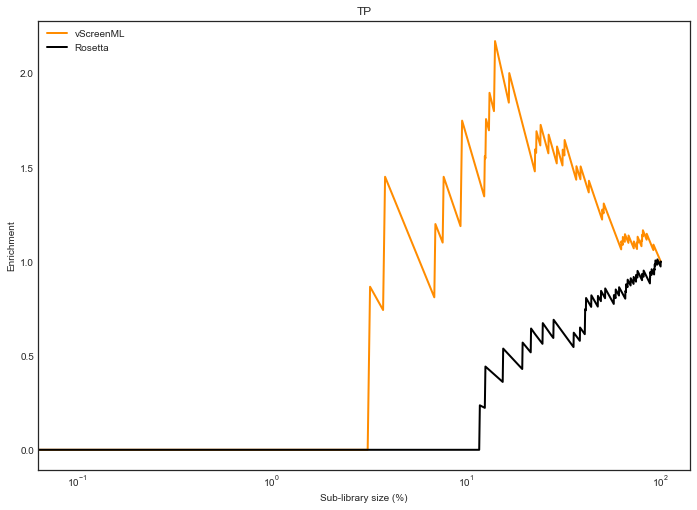

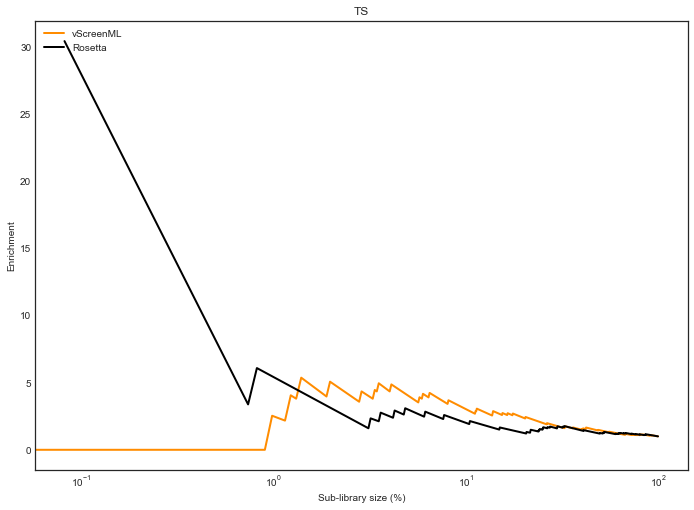

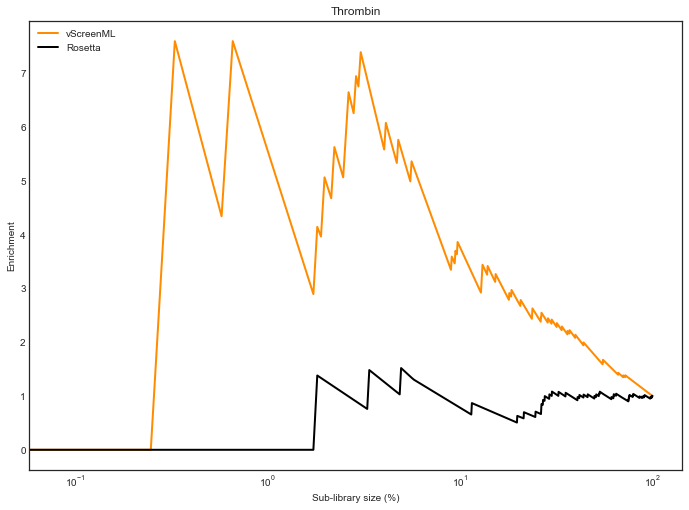

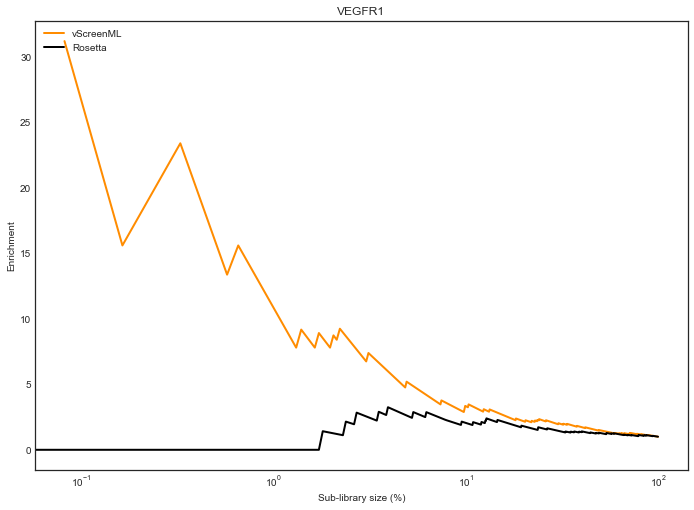

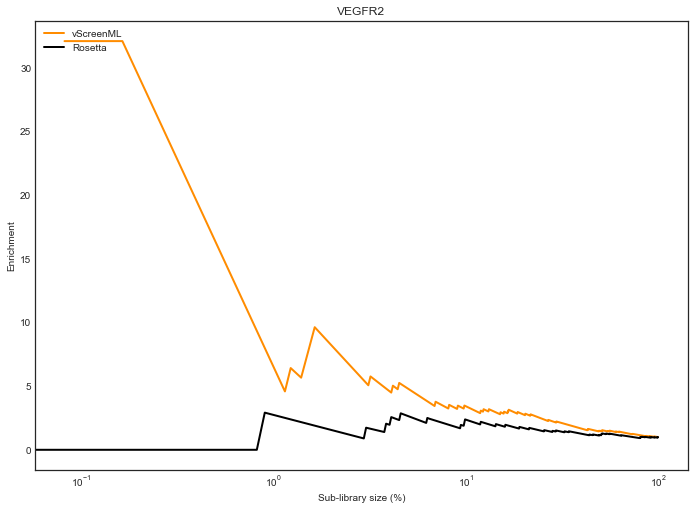

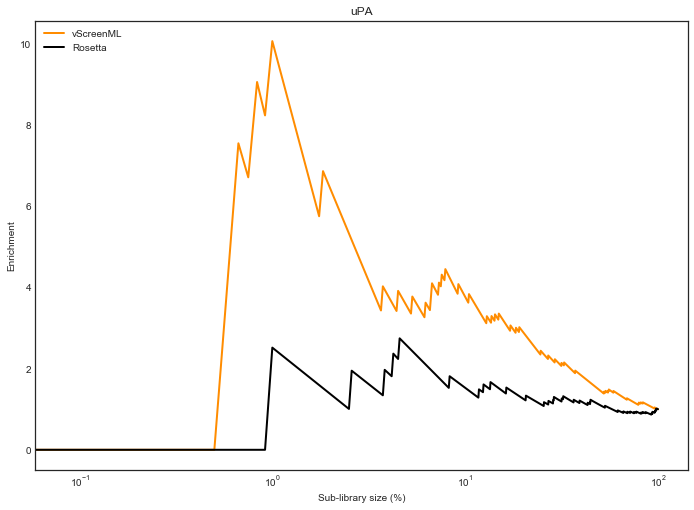

In [103]:
enrich_list_rf=[]

for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recalc_features/' + ifile+'_all_features_combined.csv', encoding="utf-8-sig")
    #compounds_list2 = pd.read_csv('/Users/yusuf/Downloads/DEKOIS2.0_library/final_' + ifile+'_rfscore_common.csv', encoding="utf-8-sig")
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol]]
    predict_rank_log_roc_enrichment(clf,compounds_list, predictors,ifile)

### Exclude those present in training set 

In [15]:
tags = ['11betaHSD1',
'17betaHSD1',
'A2A',
'ACE',
'ACE2',
'ADAM17',
'ADRB2',
'BCL2',
'COX1',
'CYP2A6',
'GBA',
'GR',
'HMGR',
'MMP2',
'PDE5',
'PNP',
'QPCT',
'ROCK-1',
'SARS-HCoV',
'TIE2',
'TK',
'TP',
'VEGFR1']

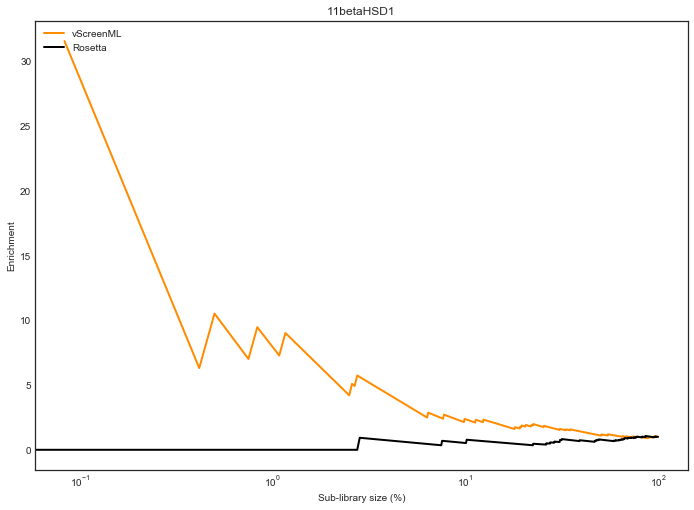

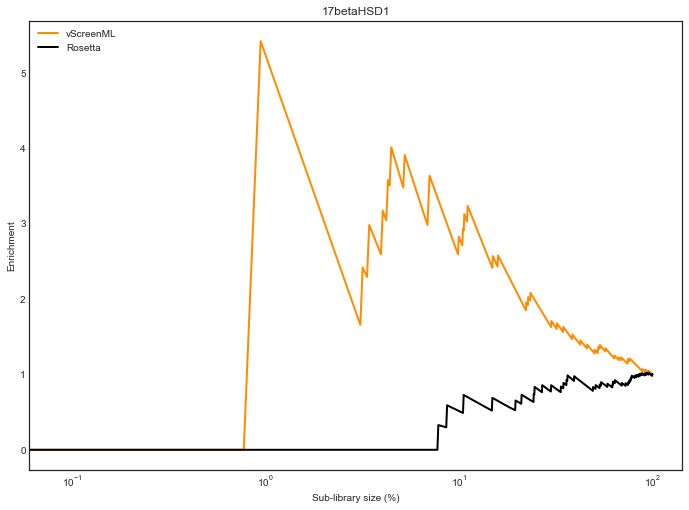

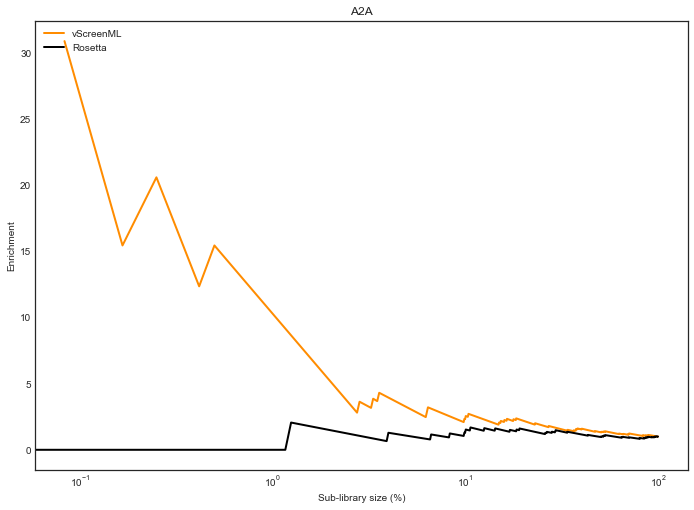

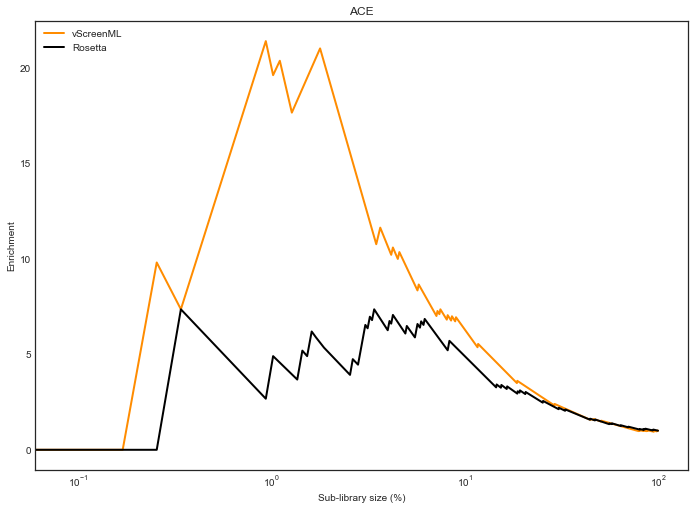

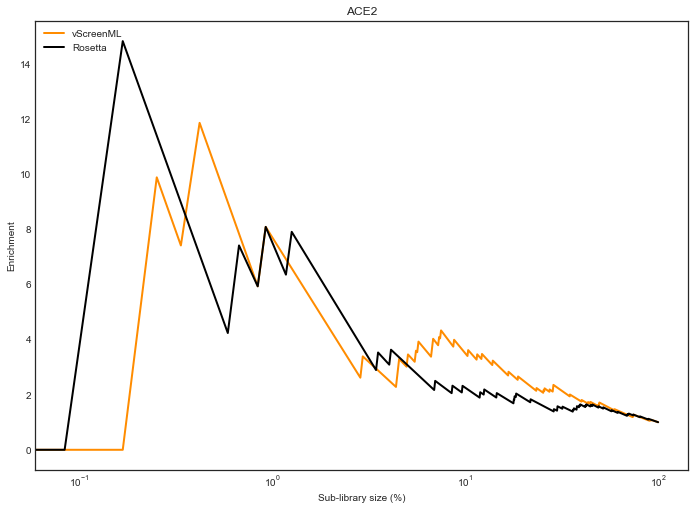

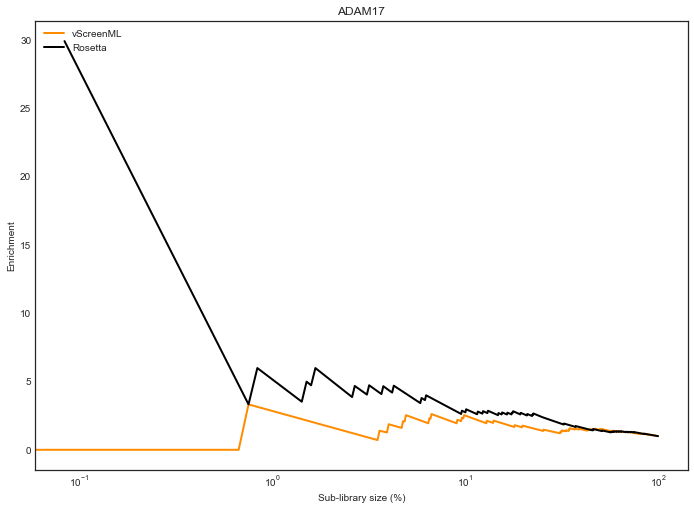

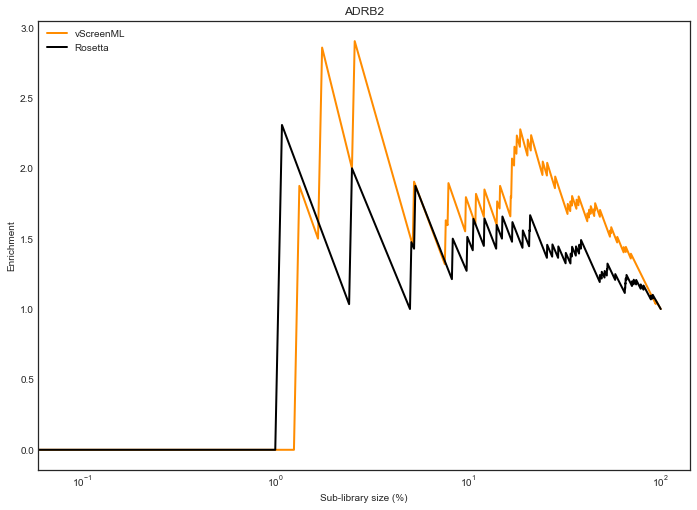

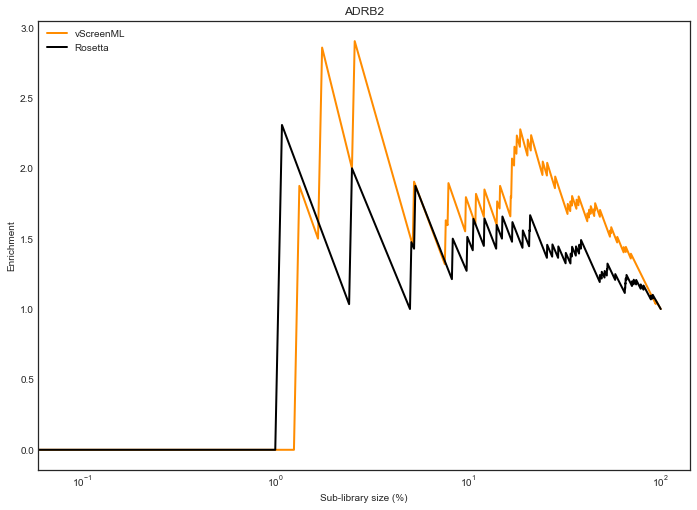

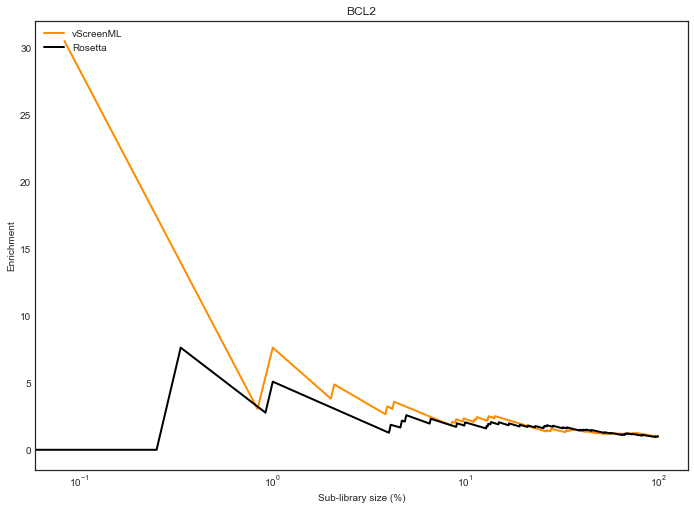

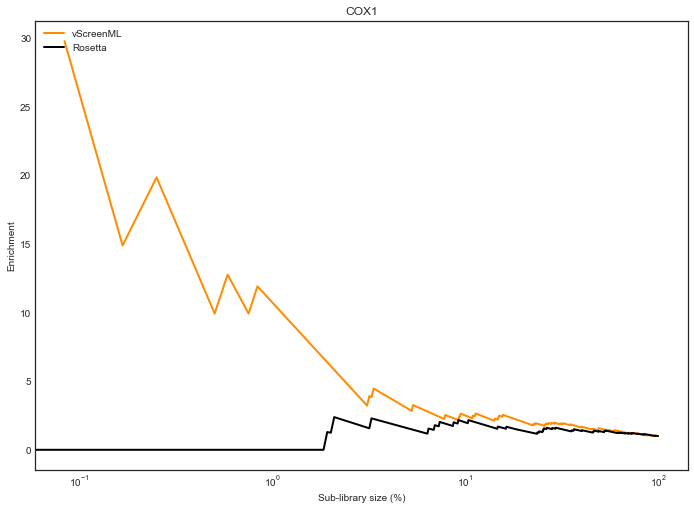

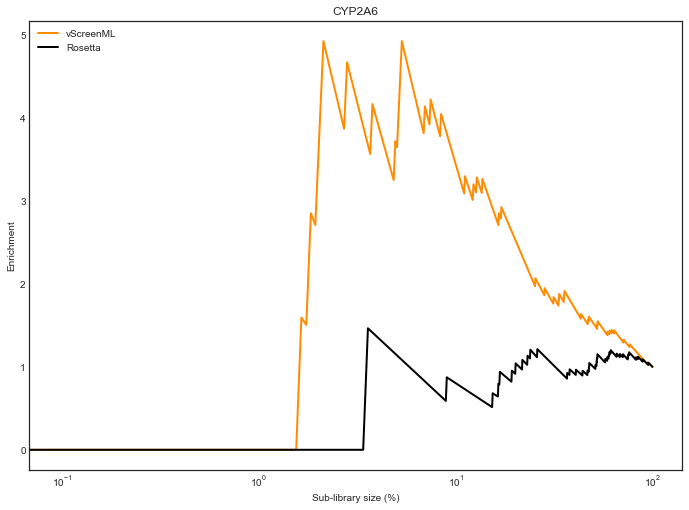

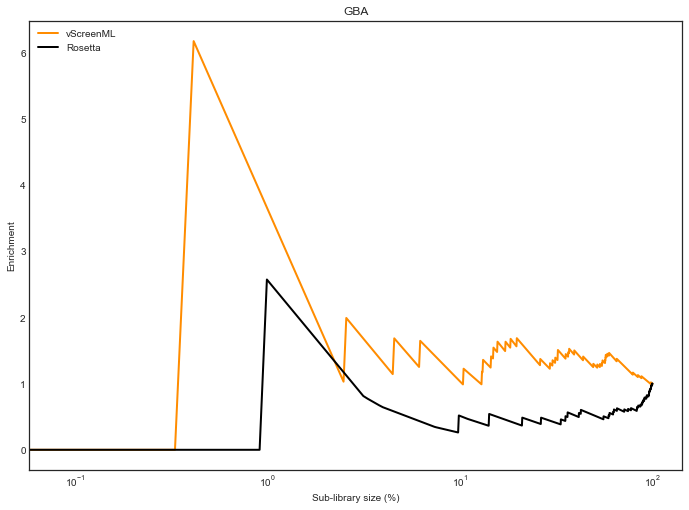

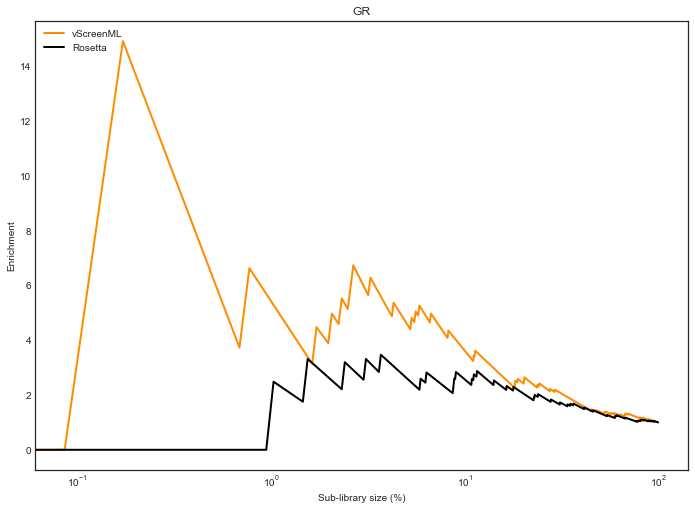

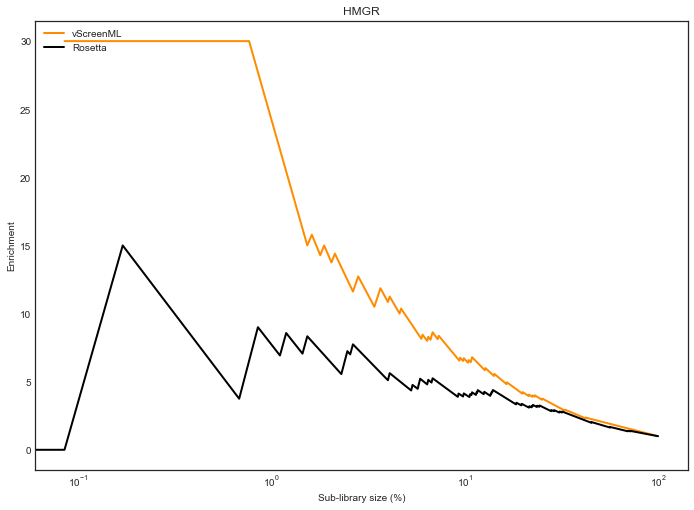

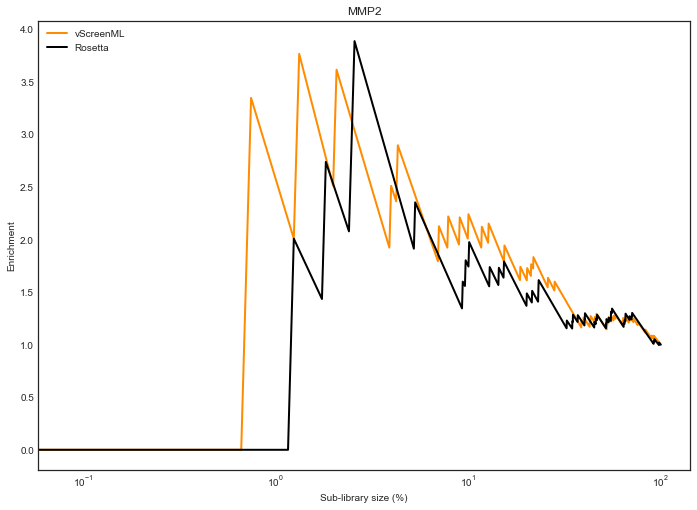

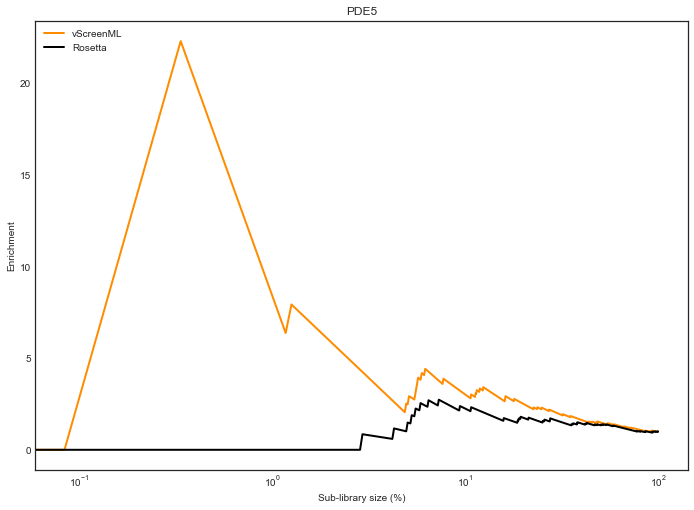

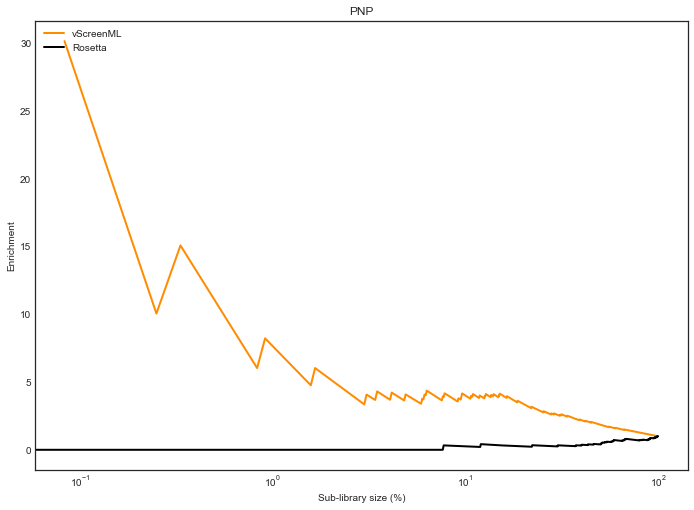

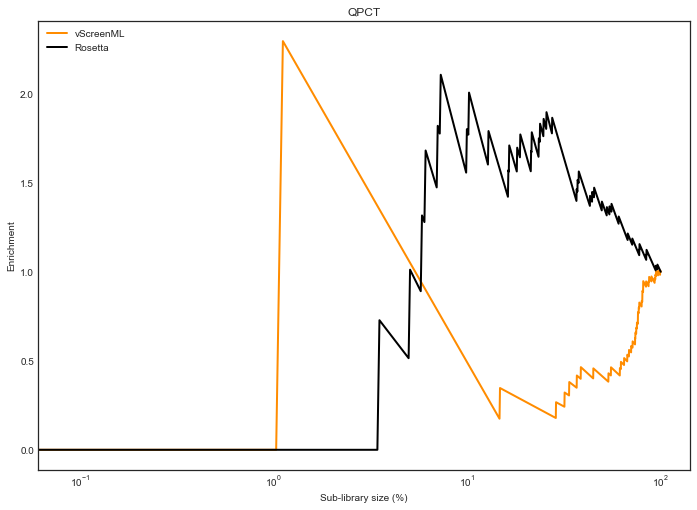

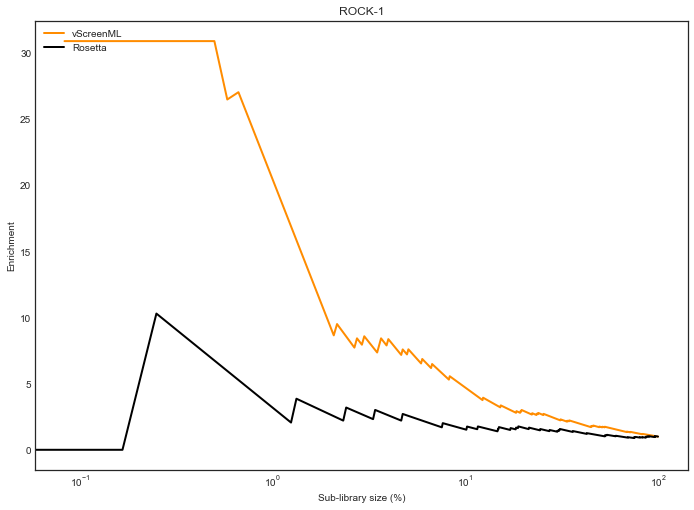

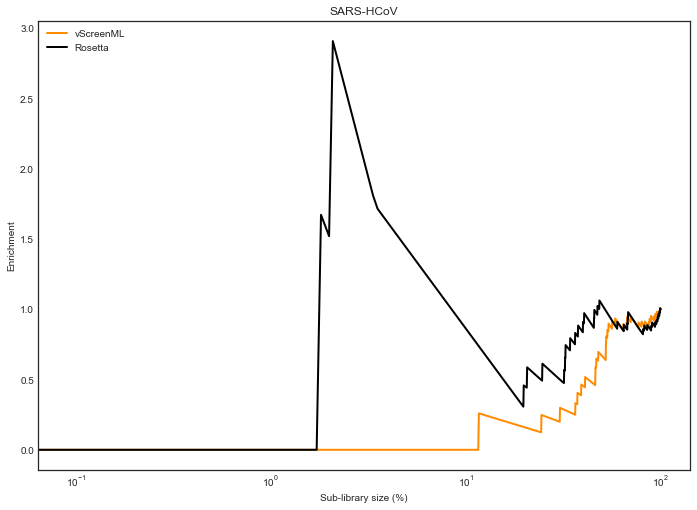

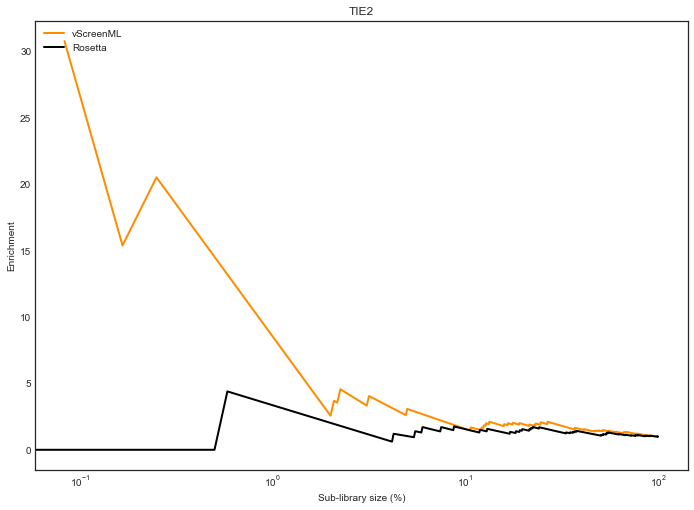

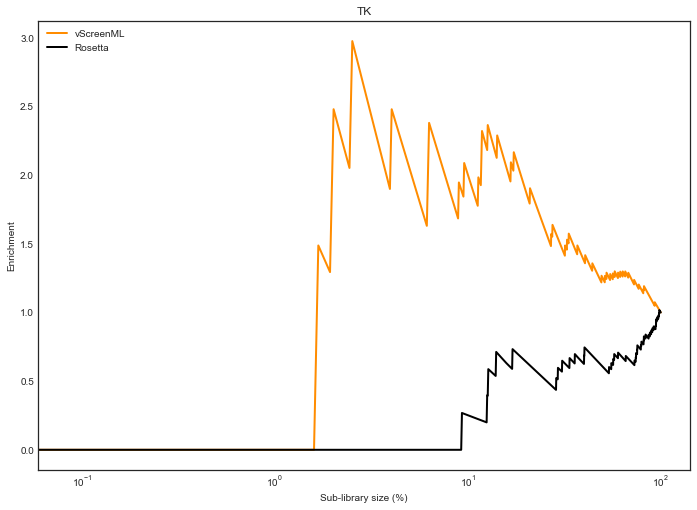

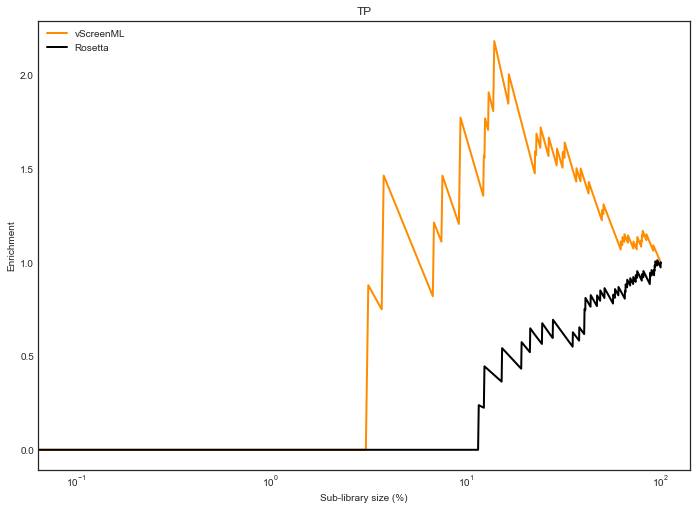

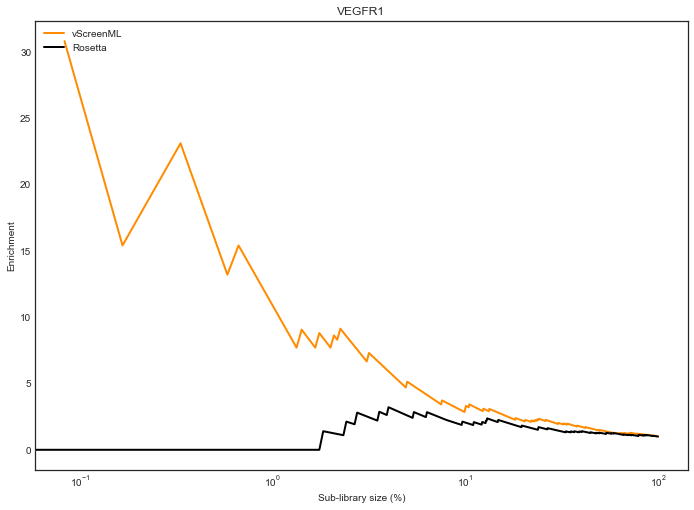

In [105]:
enrich_list_rf=[]

for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recombined_result082319/' + ifile+'_all_features_combined_common.csv', encoding="utf-8-sig")
    #compounds_list2 = pd.read_csv('/Users/yusuf/Downloads/DEKOIS2.0_library/final_' + ifile+'_rfscore_common.csv', encoding="utf-8-sig")
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol]]
    predict_rank_log_roc_enrichment(clf,compounds_list, predictors,ifile)

In [106]:
#oxido-reductase:COX-1,GPCRs:A2A,ACE:proteases,BCL2:PPI,Nuclear receptor:
#GR,PDE5:hydrolases,PNP:transferases,

### Other models Enrichment

In [9]:
def threshold_to_frac_lib_other(thresh, df_pred, column):
    list_thresh_to_perc = []
    for i in thresh:
                  
        if column == "vina_affinity" or  column == "Interface_Energy":
            sub_lib = df_pred[-1*df_pred[column] >= i]

        else:
            sub_lib = df_pred[df_pred[column] >= i]
            
        #print len(sub_lib)
        perc = float(len(sub_lib))/len(df_pred)*100
        list_thresh_to_perc.append([i,perc])
    #print list_thresh_to_perc    
    return list_thresh_to_perc            

In [10]:
def enrich_from_threshold_other(thresh, df_pred, column):
    random_hitrate = df_pred['Label'].sum()/float(len(df_pred['Label']))
    #print (random)
    list_thresh_to_conf = []
    

    for i in thresh:
        #print thresh
        if column == "vina_affinity" or column == "Interface_Energy":

            df_pred['Pred_binary'] = np.where(-1*df_pred[column] >= i, 1, 0)
            #print df_pred['Pred_binary']
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'],df_pred['Pred_binary']).ravel()
            #precision

            list_thresh_to_conf.append((float(tp)/(float(tp)+float(fp)+1e-9))/random_hitrate)
        else:
            df_pred['Pred_binary'] = np.where(df_pred[column] >= i, 1, 0)
            #print df_pred
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'],df_pred['Pred_binary']).ravel()
            #print (tn, fp, fn, tp)
            
            list_thresh_to_conf.append((float(tp)/(float(tp)+float(fp)+1e-9))/random_hitrate)
            

            
    return list_thresh_to_conf           

In [11]:
import matplotlib.cm as cm
def predict_rank_log_roc_enrichment_other(model, test_x, name, predictors, scores):
    
    y_test = test_x["Label"]
    
    dtest_pred = model.predict_proba(test_x[predictors])[:,1]
    test_x["vScreenML"] = dtest_pred

    scores.append("vScreenML")
    
    colors = cm.rainbow(np.linspace(0, 1, len(scores)))
    
    for score, color in zip(scores, colors):
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
            fpr, tpr, thresholds = metrics.roc_curve(y_test, -1*test_x[score], pos_label=1)
        else:
            fpr, tpr, thresholds = metrics.roc_curve(y_test, test_x[score], pos_label=1)
                
        precision =  enrich_from_threshold_other(thresholds, test_x, score)

        perc = [v for k,v in threshold_to_frac_lib_other(thresholds, test_x, score)]

        lw = 2

        plt.plot(perc, precision, color=color,label=score,
                 lw=lw)

    plt.xscale('log')
    plt.ylabel('Enrichment')
    plt.xlabel('Sub-library size (%)')
    plt.title(name)
    plt.legend(loc="upper left")
    plt.show()


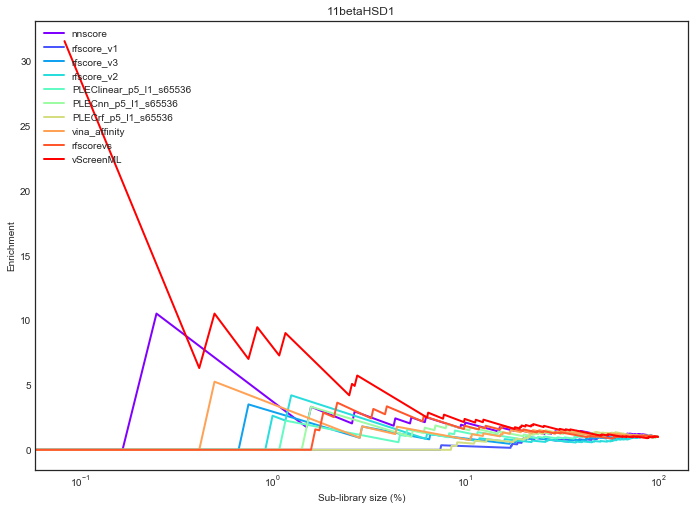

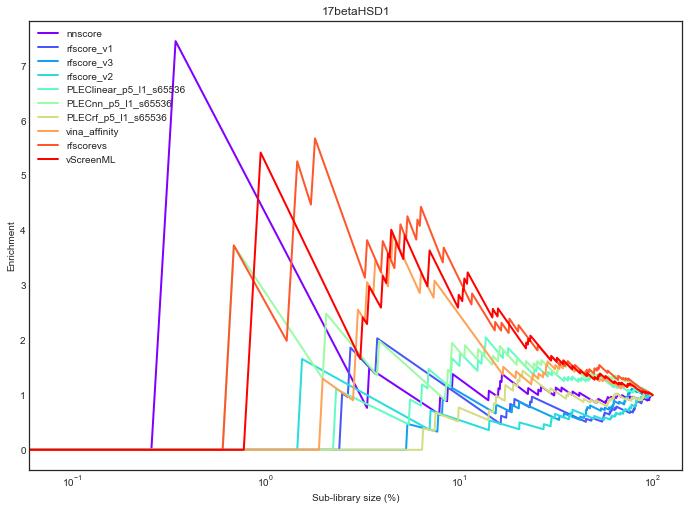

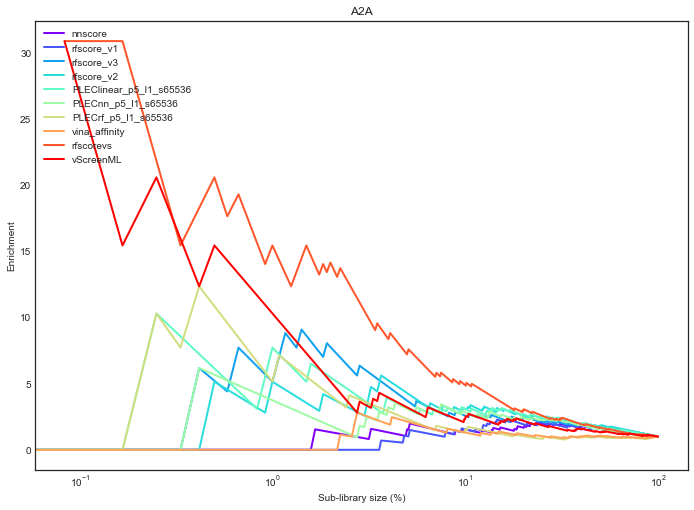

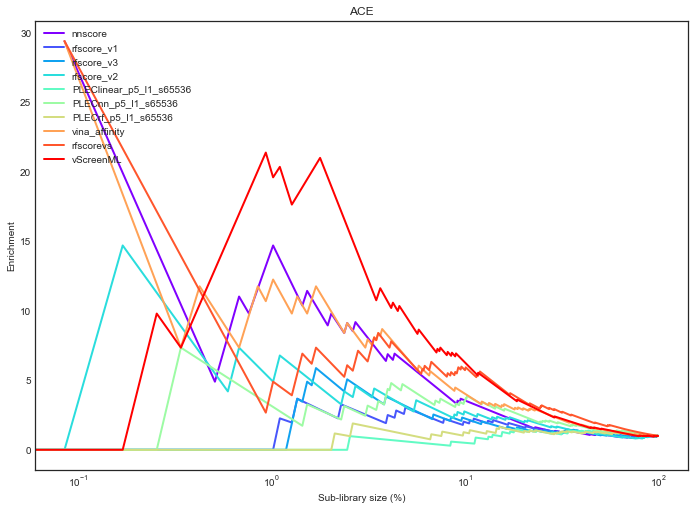

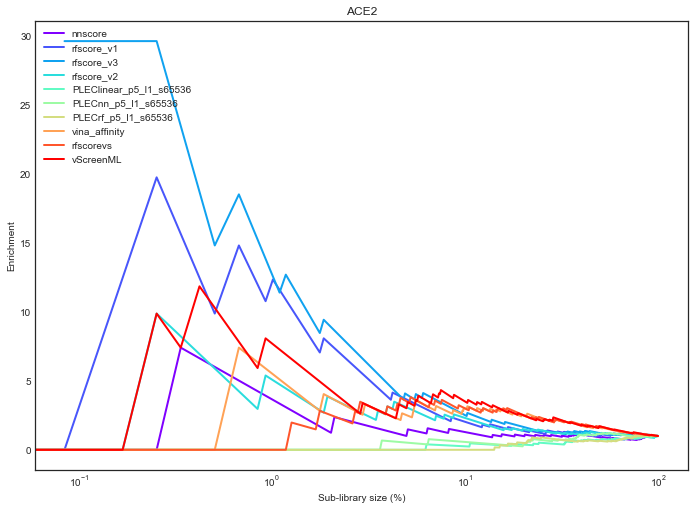

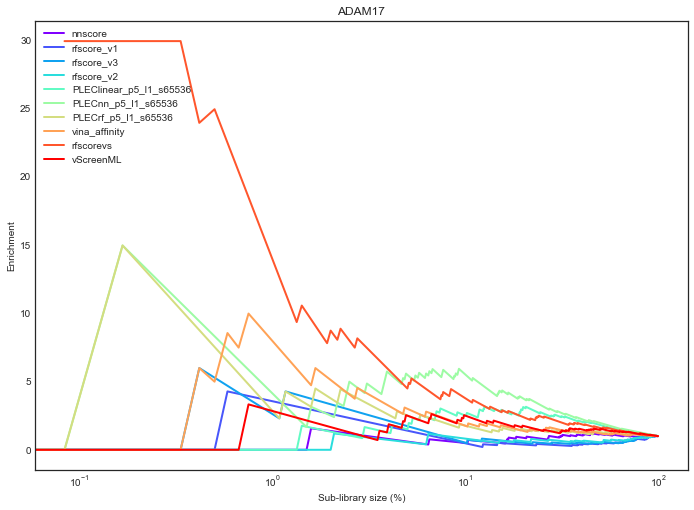

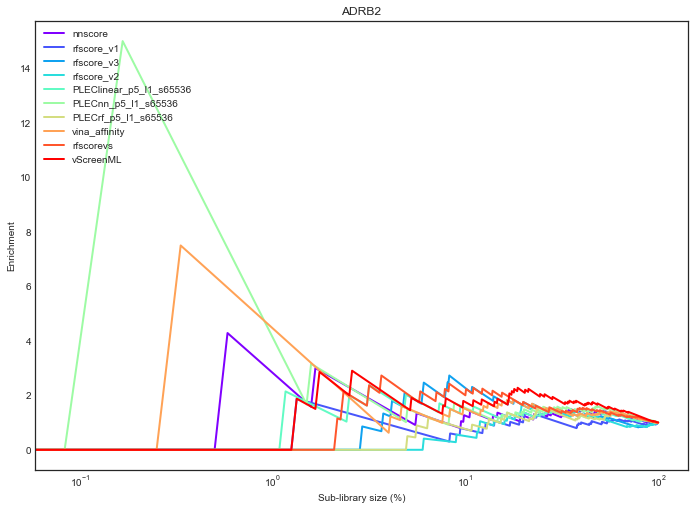

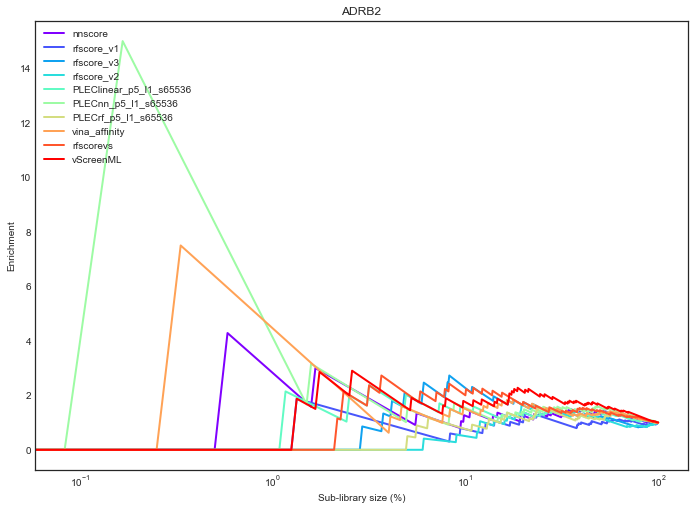

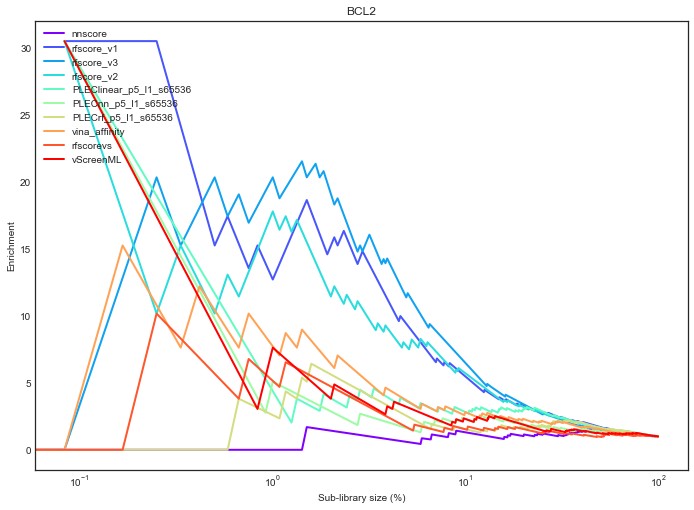

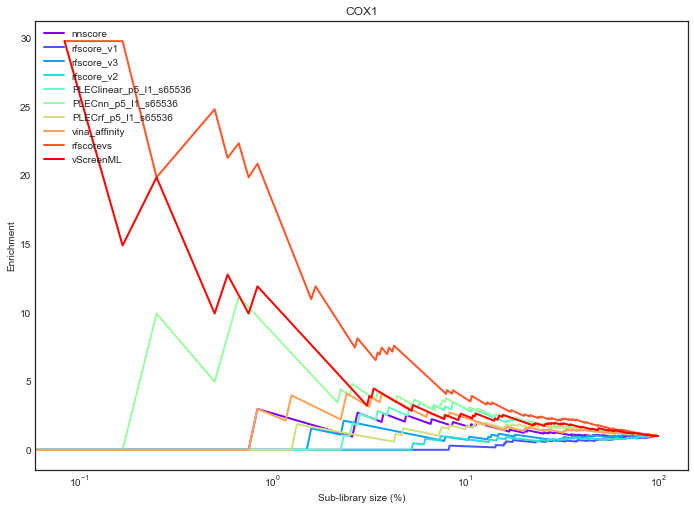

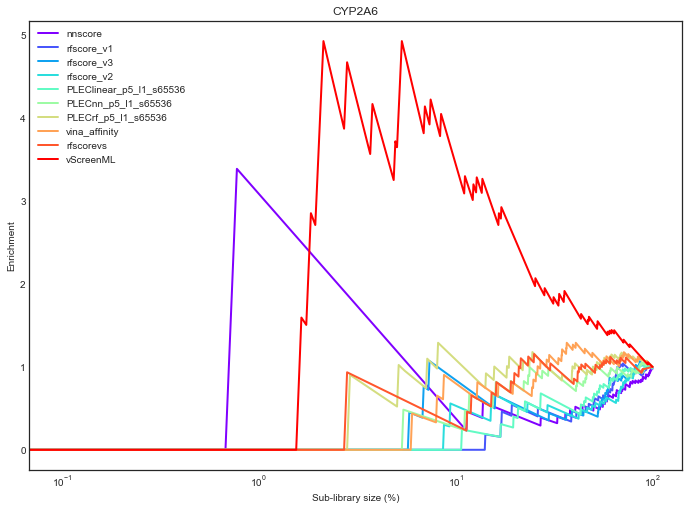

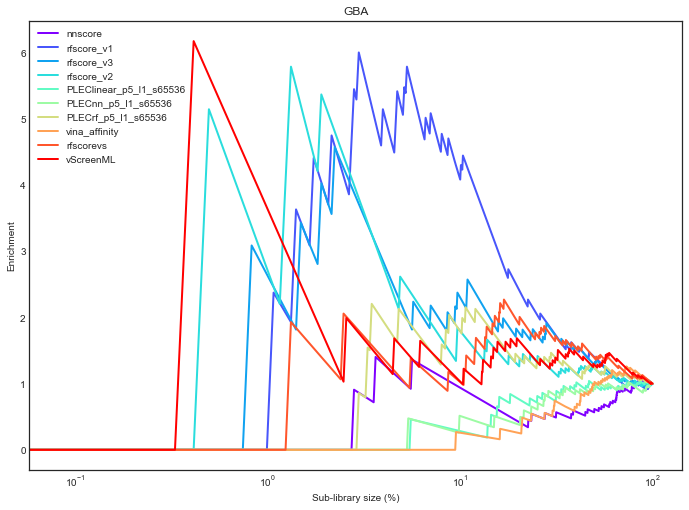

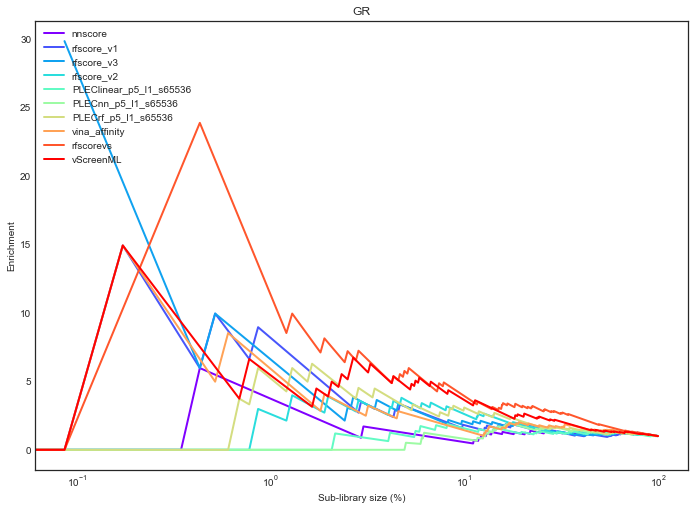

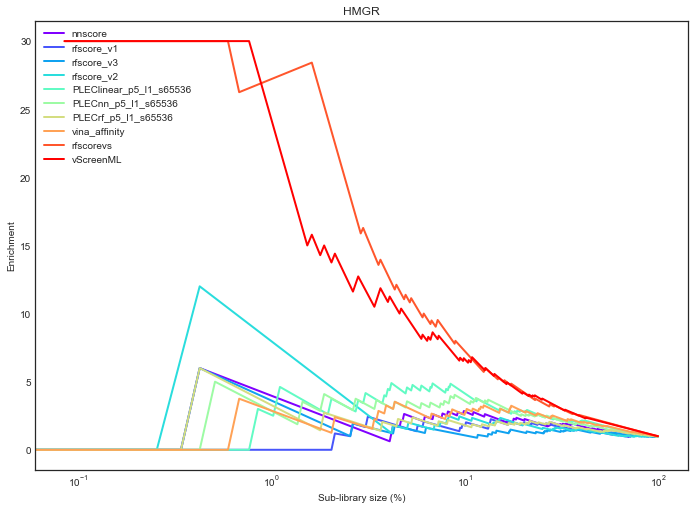

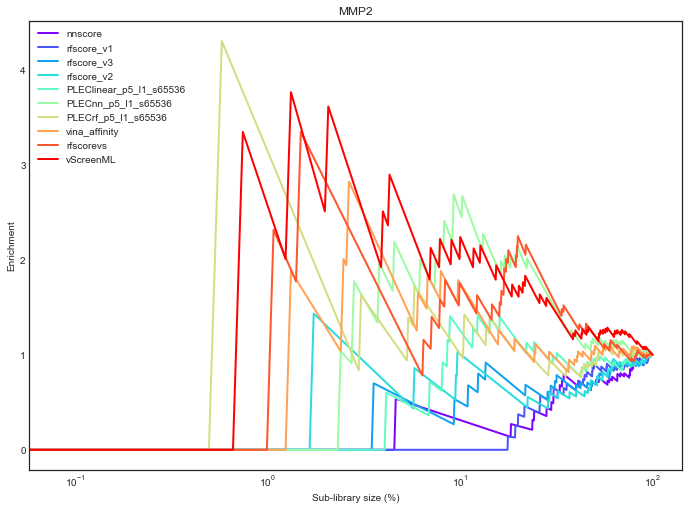

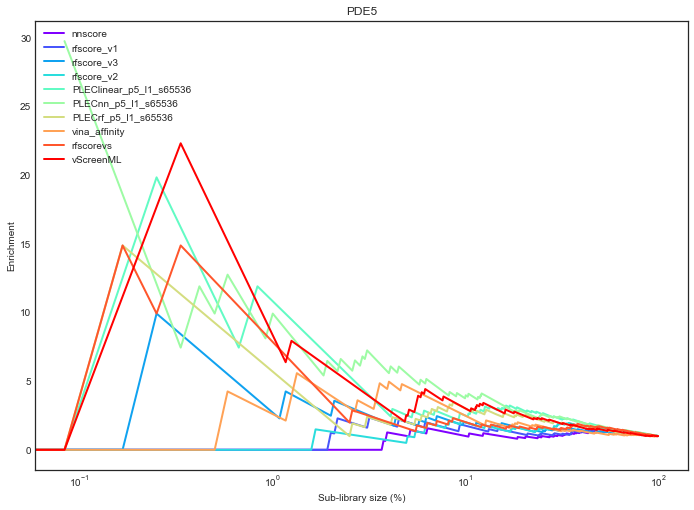

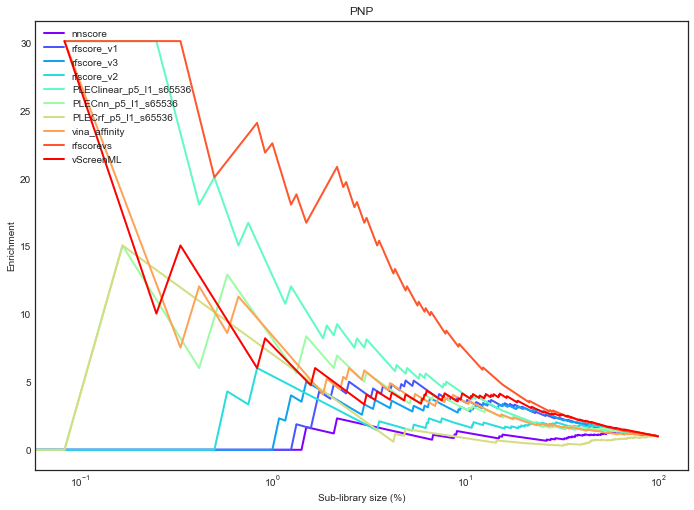

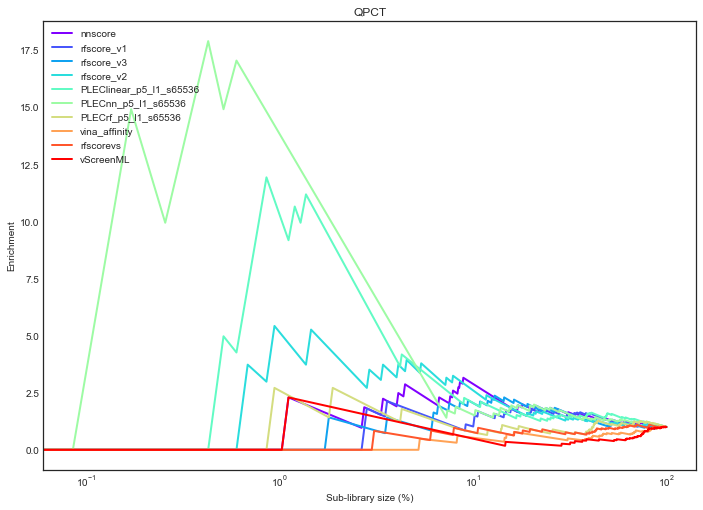

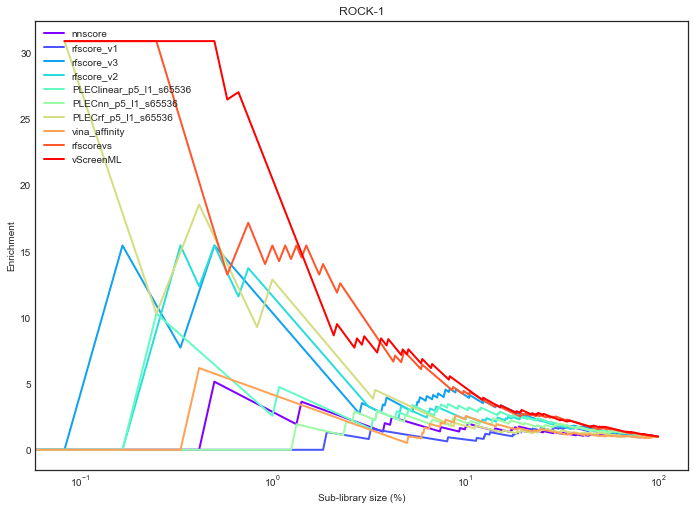

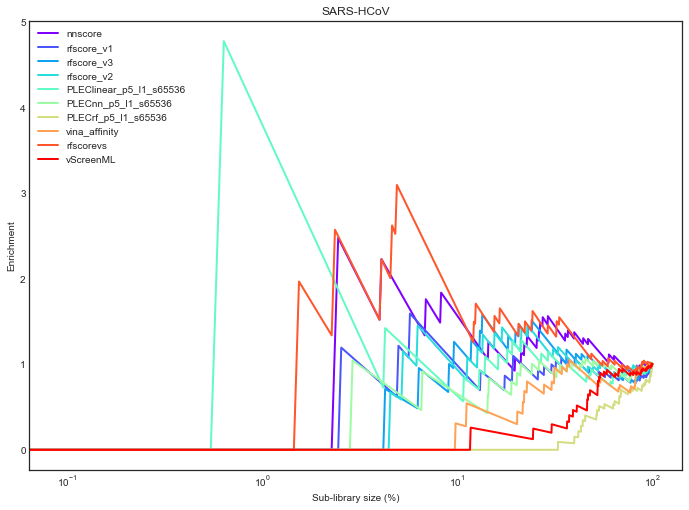

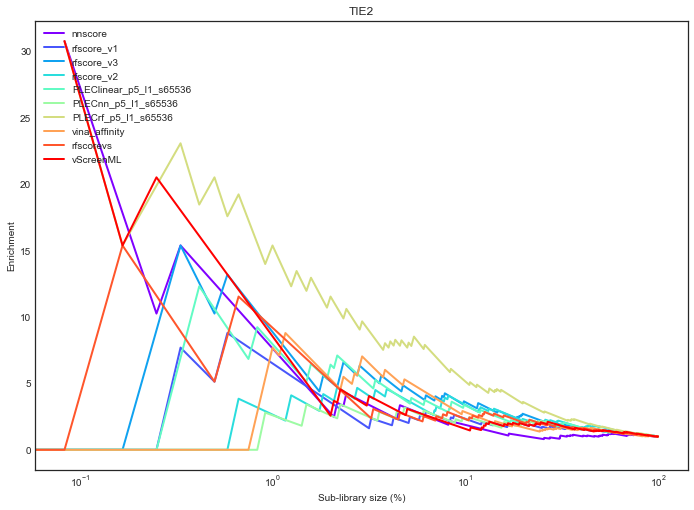

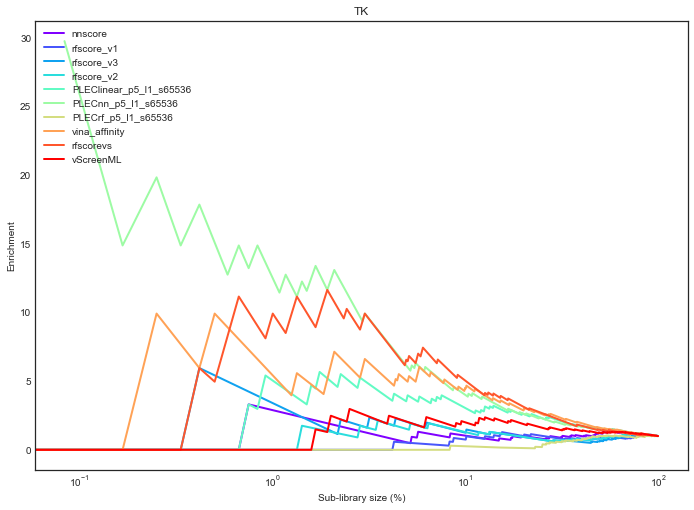

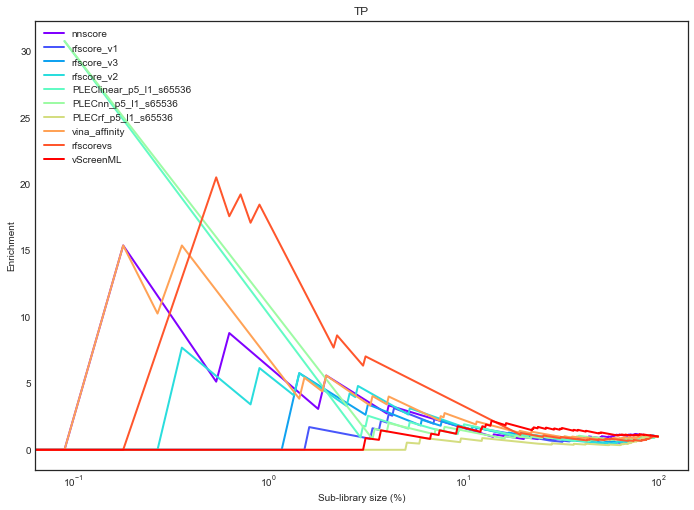

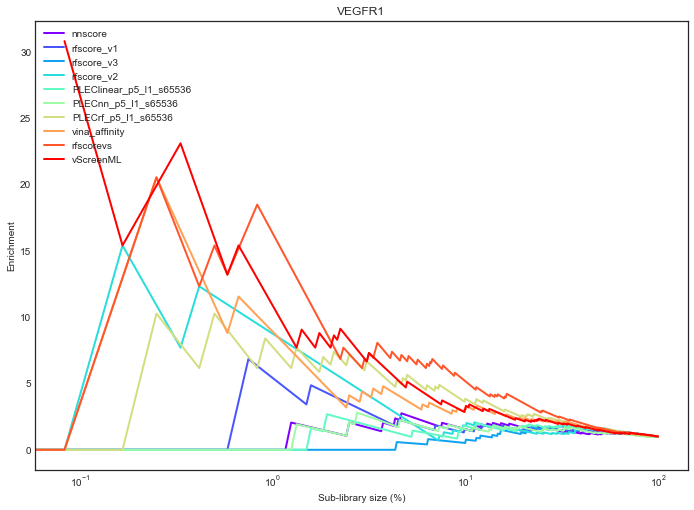

In [110]:
for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recombined_result082319/'+ifile+'_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    predict_rank_log_roc_enrichment_other(clf, compounds_list, ifile, predictors,scores )

## 1% Enrichment

In [12]:
def predict_from_rf_otherscore(test_x,score,name):
    actual_positive=float(len(test_x[test_x["Label"] == 1]))
    
    no_of_points =float(len(test_x))
    
    random_hit_rate = float(actual_positive/no_of_points) *100

    sort_final = test_x.sort_values(by=score, ascending=False)
    one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
    #print one_percent
    #Print model report:
    #print "\nPrediction Report"
    #print "Accuracy(Test) : %.4g" % metrics.accuracy_score(test_x['label'].values, dtest_predict)
    #print "AUC Score (Test): %f" % metrics.roc_auc_score(test_x['label'], dtest_prob)
    #print len(sort_final['PDB'].tolist()),"complexes are active"
    one_percent_df = sort_final.head(one_percent)
    #print one_percent_df
    #true_positive=float(len(one_percent_df[(one_percent_df[score] > 6.0) & (one_percent_df.Label == 1)]))
    true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
    #print true_positive
    hit_rate = true_positive/one_percent*100
    
    enrichment = hit_rate/random_hit_rate
    
    print ("Enrichment for", name , "=", enrichment)
    return enrichment

In [13]:
def predict_rank_log_roc_1percent_enrichment_other(model, test_x, predictors, scores):
    
    random_hit_rate = test_x['Label'].sum()/float(len(test_x['Label']))*100

    
    dtest_pred = model.predict_proba(test_x[predictors].astype('float'))[:,1]
    test_x["vScreenML"] = dtest_pred

    scores.extend(["vScreenML","Interface_Energy"])
    

    
    enrichment_dict = {}
    tp_dict = {}
    for score in scores:
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
                sort_final = test_x.sort_values(by=score, ascending=True)
                #print (sort_final.head())
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
        else:
                sort_final = test_x.sort_values(by=score, ascending=False)
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
                
    return enrichment_dict

In [16]:
enrich_dict ={}
for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recombined_result082319/'+ifile+'_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    enrich_dict[ifile] = predict_rank_log_roc_1percent_enrichment_other(clf, compounds_list, predictors,scores )

In [17]:
enrich_df = pd.DataFrame.from_dict(enrich_dict,orient='index')

In [18]:
enrich_df

nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
11betaHSD1   2.868421    0.000000    2.868421    0.000000   
17betaHSD1   2.708625    0.000000    0.000000    0.000000   
A2A          0.000000    0.000000    5.145299    5.145299   
ACE         13.363636    0.000000    0.000000    5.345455   
ACE2         2.693182   10.772727   13.465909    5.386364   
ADAM17       0.000000    2.718182    2.718182    0.000000   
ADRB2        2.500000    0.000000    0.000000    0.000000   
BCL2         0.000000   13.857809   19.400932   16.629371   
COX1         2.706818    0.000000    0.000000    0.000000   
CYP2A6       2.710526    0.000000    0.000000    0.000000   
GBA          0.000000    0.000000    2.574786    2.574786   
GR           2.710956    8.132867    5.421911    2.710956   
HMGR         2.729604    0.000000    2.729604    5.459207   
MMP2         0.000000    0.000000    0.000000    0.000000   
PDE5         0.000000    0.000000    2.704545    0.000000   
PNP          0.000000    0.000000    0.000000    5.025000   
QPCT         0.000000    0.000000    0.000000    5.426573   
ROCK-1       2.576923    0.000000    7.730769   10.307692   
SARS-HCoV    0.000000    0.000000    0.000000    0.000000   
TIE2         5.128205    5.128205    7.692308    2.564103   
TK           2.704545    0.000000    2.704545    0.000000   
TP           5.590909    0.000000    0.000000    5.590909   
VEGFR1       0.000000    5.132479    0.000000    5.132479   

            PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
11betaHSD1                 0.000000             0.000000             0.000000   
17betaHSD1                 0.000000             2.708625             0.000000   
A2A                        7.717949             2.572650             5.145299   
ACE                        0.000000             2.672727             0.000000   
ACE2                       0.000000             0.000000             0.000000   
ADAM17                     0.000000             2.718182             2.718182   
ADRB2                      0.000000             2.500000             0.000000   
BCL2                       2.771562             2.771562             2.771562   
COX1                       0.000000             8.120455             0.000000   
CYP2A6                     0.000000             0.000000             0.000000   
GBA                        0.000000             0.000000             0.000000   
GR                         0.000000             0.000000             5.421911   
HMGR                       2.729604             2.729604             2.729604   
MMP2                       0.000000             0.000000             2.510417   
PDE5                      10.818182             8.113636             2.704545   
PNP                       12.562500             7.537500             2.512500   
QPCT                      10.853147            10.853147             2.713287   
ROCK-1                     2.576923             0.000000            12.884615   
SARS-HCoV                  3.041322             0.000000             0.000000   
TIE2                       7.692308             2.564103            15.384615   
TK                         5.409091            13.522727             0.000000   
TP                         2.795455             2.795455             0.000000   
VEGFR1                     0.000000             0.000000             7.698718   

            vina_affinity  rfscorevs  vScreenML  Interface_Energy  
11betaHSD1       2.868421   0.000000   8.605263          0.000000  
17betaHSD1       0.000000   2.708625   5.417249          0.000000  
A2A              0.000000  15.435897   7.717949          0.000000  
ACE             10.690909   2.672727  21.381818          2.672727  
ACE2             5.386364   0.000000   8.079545          8.079545  
ADAM17           8.154545  13.590909   2.718182          5.436364  
ADRB2            2.500000   0.000000   0.000000          0.000000  
BCL2             8.314685   5.543124   5.543124          2.7

In [118]:
enrich_df.to_csv('~/utilities_for_goldi_paper/enrichment_one_percent.csv')

In [20]:
##Exclude target from both vScreenML and rfscorevs
tags_exclude = [#'11betaHSD1',
'17betaHSD1',
#'A2A',
#'ACE',
'ACE2',
#'ADAM17',
#'ADRB2',
#'ADRB2',
'BCL2',
#'COX1',
'CYP2A6',
#'GBA',
#'GR',
#'HMGR',
'MMP2',
#'PDE5',
#'PNP',
'QPCT',
#'ROCK-1',
'SARS-HCoV',
'TIE2',
#'TK',
'TP',
'VEGFR1']

In [24]:
tags_overlap = ['11betaHSD1',
'A2A',
'ACE',
'ADAM17',
'ADRB2',
'ADRB2',
'COX1',
'GBA',
'GR',
'HMGR',
'PDE5',
'PNP',
'ROCK-1',
'TK']

In [29]:
df_enrich_exlcude_common = enrich_df[enrich_df.index.isin(tags_exclude)]

In [30]:
df_enrich_exlcude_common

nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
17betaHSD1  2.708625    0.000000    0.000000    0.000000   
ACE2        2.693182   10.772727   13.465909    5.386364   
BCL2        0.000000   13.857809   19.400932   16.629371   
CYP2A6      2.710526    0.000000    0.000000    0.000000   
MMP2        0.000000    0.000000    0.000000    0.000000   
QPCT        0.000000    0.000000    0.000000    5.426573   
SARS-HCoV   0.000000    0.000000    0.000000    0.000000   
TIE2        5.128205    5.128205    7.692308    2.564103   
TP          5.590909    0.000000    0.000000    5.590909   
VEGFR1      0.000000    5.132479    0.000000    5.132479   

            PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
17betaHSD1                 0.000000             2.708625             0.000000   
ACE2                       0.000000             0.000000             0.000000   
BCL2                       2.771562             2.771562             2.771562   
CYP2A6                     0.000000             0.000000             0.000000   
MMP2                       0.000000             0.000000             2.510417   
QPCT                      10.853147            10.853147             2.713287   
SARS-HCoV                  3.041322             0.000000             0.000000   
TIE2                       7.692308             2.564103            15.384615   
TP                         2.795455             2.795455             0.000000   
VEGFR1                     0.000000             0.000000             7.698718   

            vina_affinity  rfscorevs  vScreenML  Interface_Energy  
17betaHSD1       0.000000   2.708625   5.417249          0.000000  
ACE2             5.386364   0.000000   8.079545          8.079545  
BCL2             8.314685   5.543124   5.543124          2.771562  
CYP2A6           0.000000   0.000000   0.000000          0.000000  
MMP2             0.000000   0.000000   2.510417          0.000000  
QPCT             0.000000   0.000000   0.000000          0.000000  
SARS-HCoV        0.000000   0.000000   0.000000          0.000000  
TIE2             7.692308   7.692308   5.128205          2.564103  
TP               5.590909  16.772727   0.000000          0.000000  
VEGFR1           7.698718  15.397436  10.264957          0.000000

In [25]:
df_enrich_common = enrich_df[enrich_df.index.isin(tags_overlap)]

In [26]:
df_enrich_common

nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
11betaHSD1   2.868421    0.000000    2.868421    0.000000   
A2A          0.000000    0.000000    5.145299    5.145299   
ACE         13.363636    0.000000    0.000000    5.345455   
ADAM17       0.000000    2.718182    2.718182    0.000000   
ADRB2        2.500000    0.000000    0.000000    0.000000   
COX1         2.706818    0.000000    0.000000    0.000000   
GBA          0.000000    0.000000    2.574786    2.574786   
GR           2.710956    8.132867    5.421911    2.710956   
HMGR         2.729604    0.000000    2.729604    5.459207   
PDE5         0.000000    0.000000    2.704545    0.000000   
PNP          0.000000    0.000000    0.000000    5.025000   
ROCK-1       2.576923    0.000000    7.730769   10.307692   
TK           2.704545    0.000000    2.704545    0.000000   

            PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
11betaHSD1                 0.000000             0.000000             0.000000   
A2A                        7.717949             2.572650             5.145299   
ACE                        0.000000             2.672727             0.000000   
ADAM17                     0.000000             2.718182             2.718182   
ADRB2                      0.000000             2.500000             0.000000   
COX1                       0.000000             8.120455             0.000000   
GBA                        0.000000             0.000000             0.000000   
GR                         0.000000             0.000000             5.421911   
HMGR                       2.729604             2.729604             2.729604   
PDE5                      10.818182             8.113636             2.704545   
PNP                       12.562500             7.537500             2.512500   
ROCK-1                     2.576923             0.000000            12.884615   
TK                         5.409091            13.522727             0.000000   

            vina_affinity  rfscorevs  vScreenML  Interface_Energy  
11betaHSD1       2.868421   0.000000   8.605263          0.000000  
A2A              0.000000  15.435897   7.717949          0.000000  
ACE             10.690909   2.672727  21.381818          2.672727  
ADAM17           8.154545  13.590909   2.718182          5.436364  
ADRB2            2.500000   0.000000   0.000000          0.000000  
COX1             2.706818  18.947727  10.827273          0.000000  
GBA              0.000000   0.000000   2.574786          2.574786  
GR               5.421911  10.843823   5.421911          0.000000  
HMGR             2.729604  27.296037  24.566434          8.188811  
PDE5             2.704545   5.409091   8.113636          0.000000  
PNP              7.537500  22.612500   7.537500          0.000000  
ROCK-1           2.576923  15.461538  18.038462          2.576923  
TK               5.409091   8.113636   0.000000          0.000000

In [31]:
wilcoxon_signed(df_enrich_exlcude_common['rfscorevs'], df_enrich_exlcude_common['vScreenML'])

Statistics=9.000, p=0.75315
Same distribution (fail to reject H0)


In [32]:
wilcoxon_signed(df_enrich_common['rfscorevs'], df_enrich_common['vScreenML'])

Statistics=27.000, p=0.34652
Same distribution (fail to reject H0)


### WITHNEY MANN U

In [119]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

def mann_whitney_u(data1, data2):

    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')


In [120]:
mann_whitney_u(enrich_df['vScreenML'], enrich_df['rfscorevs'])

Statistics=250.000, p=0.37752
Same distribution (fail to reject H0)


In [121]:
columns = [i for i in enrich_df.columns if i not in ['Name']]
seen = []
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            mann_whitney_u(enrich_df[i], enrich_df[j])
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring nnscore and rfscore_v1	|||||||||||||||||||||||
Statistics=211.500, p=0.09831
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and rfscore_v3	|||||||||||||||||||||||
Statistics=248.000, p=0.35585
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and rfscore_v2	|||||||||||||||||||||||
Statistics=227.000, p=0.19809
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and PLEClinear_p5_l1_s65536	|||||||||||||||||||||||
Statistics=250.000, p=0.37225
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and PLECnn_p5_l1_s65536	|||||||||||||||||||||||
Statistics=238.500, p=0.28060
Same distribution (fail to reject H0)
||||||

## PPI Mann-Whitney-U

In [122]:
df_ppi = pd.read_csv('/Users/yusufadeshina/Downloads/ppi_benchmark/ppi_benchmark_full_no_train.csv')

In [123]:
df_ppi.columns

Index(['Unnamed: 0', 'vScreenML', 'Rosetta', 'nnscore', 'rfscore_v1',
       'rfscore_v3', 'rfscore_v2', 'PLEClinear_p5_l1_s65536',
       'PLECnn_p5_l1_s65536', 'PLECrf_p5_l1_s65536', 'vina_affinity',
       'rfscorevs'],
      dtype='object')

In [124]:
columns = [i for i in df_ppi.columns if i not in ['Unnamed: 0']]
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            mann_whitney_u(df_ppi[i], df_ppi[j])
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring vScreenML and Rosetta	|||||||||||||||||||||||
Statistics=20.000, p=0.01287
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and nnscore	|||||||||||||||||||||||
Statistics=11.000, p=0.00181
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v1	|||||||||||||||||||||||
Statistics=19.000, p=0.01057
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v3	|||||||||||||||||||||||
Statistics=17.000, p=0.00701
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v2	|||||||||||||||||||||||
Statistics=16.000, p=0.00566
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||

Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vina_affinity and Rosetta	|||||||||||||||||||||||
Statistics=50.000, p=0.48492
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vina_affinity and nnscore	|||||||||||||||||||||||
Statistics=23.000, p=0.02258
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vina_affinity and rfscore_v1	|||||||||||||||||||||||
Statistics=44.000, p=0.33879
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vina_affinity and rfscore_v3	|||||||||||||||||||||||
Statistics=40.000, p=0.23634
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vina_affinity and rfscore_v2	

In [27]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

def wilcoxon_signed(data1, data2):

    stat, p = wilcoxon(data1, data2)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')


### DEKOIS WILCOXON

In [126]:
columns = [i for i in enrich_df.columns if i not in ['Name']]
seen = []
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            wilcoxon_signed(enrich_df[i], enrich_df[j])
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring nnscore and rfscore_v1	|||||||||||||||||||||||
Statistics=56.000, p=0.82028
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and rfscore_v3	|||||||||||||||||||||||
Statistics=45.000, p=0.39425
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and rfscore_v2	|||||||||||||||||||||||
Statistics=55.000, p=0.30879
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and PLEClinear_p5_l1_s65536	|||||||||||||||||||||||
Statistics=68.000, p=0.68741
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring nnscore and PLECnn_p5_l1_s65536	|||||||||||||||||||||||
Statistics=52.000, p=0.40804
Same distribution (fail to reject H0)
|||||||||||

### PPI WILCOXON

In [127]:
columns = [i for i in df_ppi.columns if i not in ['Unnamed: 0']]
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            wilcoxon_signed(np.log(df_ppi[i]), np.log(df_ppi[j]))
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring vScreenML and Rosetta	|||||||||||||||||||||||
Statistics=1.000, p=0.00691
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and nnscore	|||||||||||||||||||||||
Statistics=3.000, p=0.01252
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v1	|||||||||||||||||||||||
Statistics=3.000, p=0.01252
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v3	|||||||||||||||||||||||
Statistics=4.000, p=0.01660
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v2	|||||||||||||||||||||||
Statistics=4.000, p=0.01660
Different distribution (reject H0)
|||||||||||||||||||||||||||||||||||||||||||||||||

Statistics=20.000, p=0.44459
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring PLECrf_p5_l1_s65536 and nnscore	|||||||||||||||||||||||
Statistics=12.000, p=0.11413
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring PLECrf_p5_l1_s65536 and rfscore_v1	|||||||||||||||||||||||
Statistics=27.000, p=0.95935
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring PLECrf_p5_l1_s65536 and rfscore_v3	|||||||||||||||||||||||
Statistics=23.000, p=0.64646
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring PLECrf_p5_l1_s65536 and rfscore_v2	|||||||||||||||||||||||
Statistics=25.000, p=0.79886
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [128]:
##Exclude target from both vScreenML and rfscorevs
tags = [#'11betaHSD1',
'17betaHSD1',
#'A2A',
#'ACE',
'ACE2',
#'ADAM17',
#'ADRB2',
#'ADRB2',
'BCL2',
#'COX1',
'CYP2A6',
#'GBA',
#'GR',
#'HMGR',
'MMP2',
#'PDE5',
#'PNP',
'QPCT',
#'ROCK-1',
'SARS-HCoV',
'TIE2',
#'TK',
'TP',
'VEGFR1']

## RFSCORE_V1 MODEL FOR OUR DATASET

In [167]:
def predict_rank_log_roc_1percent_enrichment_other(model_all,model_rf, test_x, predictors,predictors_rf, scores):
    
    random_hit_rate = test_x['Label'].sum()/float(len(test_x['Label']))*100

    
    dtest_pred = model_all.predict_proba(test_x[predictors])[:,1]
    test_x["vScreenML"] = dtest_pred
    
    dtest_pred_rf = model_rf.predict_proba(test_x[predictors_rf])[:,1]
    test_x["RFSCORE_V1_remade"] = dtest_pred_rf

    scores.extend(["vScreenML","Interface_Energy","RFSCORE_V1_remade"])
    

    
    enrichment_dict = {}
    rank_dict = {}
    for score in scores:
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
                sort_final = test_x.sort_values(by=score, ascending=True)
                rank=list(sort_final["Label"]).index(1)+1
                #print (sort_final.head())
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
                rank_dict[score] = rank
        else:
                sort_final = test_x.sort_values(by=score, ascending=False)
                rank=list(sort_final["Label"]).index(1)+1
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
                rank_dict[score] = rank
                
    return enrichment_dict, rank_dict

In [168]:
with open('/Users/yusufadeshina/Downloads/XGB_CLASSIFIER_alldata.pickle.dat', 'rb') as f:
    clf = pickle.load(f)
    
with open('/Users/yusufadeshina/Downloads/all_ipython_notenook/RFSCORE_V1_RETRAINED_WITH_OUR_DATA.pickle.dat', 'rb') as f:
    clf_rf = pickle.load(f)

In [169]:
predictors_rf = [
    '6.6','7.6','8.6','16.6','6.7','7.7','8.7','16.7','6.8',
    '7.8','8.8','16.8','6.9','7.9','8.9','16.9','6.15','7.15',
    '8.15','16.15','6.16','7.16','8.16','16.16','6.17','7.17',
    '8.17','16.17','6.35','7.35','8.35','16.35','6.53','7.53',
    '8.53','16.53']

In [170]:
enrich_dict ={}
for ifile in tags:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/DEKOIS2.0_library/recombined_result082319/'+ifile+'_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['RFSCORE_V1_remade', 'nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    enrich_dict[ifile],_ = predict_rank_log_roc_1percent_enrichment_other(clf,clf_rf, compounds_list, predictors,predictors_rf, scores )

In [171]:
enrich_df = pd.DataFrame.from_dict(enrich_dict,orient='index')

In [172]:
enrich_df

RFSCORE_V1_remade    nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
11betaHSD1           0.000000   2.868421    0.000000    2.868421    0.000000   
17betaHSD1           2.708625   2.708625    0.000000    0.000000    0.000000   
A2A                  5.145299   0.000000    0.000000    5.145299    5.145299   
ACE                  0.000000  13.363636    0.000000    0.000000    5.345455   
ACE2                 0.000000   2.693182   10.772727   13.465909    5.386364   
ADAM17               0.000000   0.000000    2.718182    2.718182    0.000000   
ADRB2                0.000000   2.500000    0.000000    0.000000    0.000000   
BCL2                 0.000000   0.000000   13.857809   19.400932   16.629371   
COX1                 0.000000   2.706818    0.000000    0.000000    0.000000   
CYP2A6               0.000000   2.710526    0.000000    0.000000    0.000000   
GBA                  7.724359   0.000000    0.000000    2.574786    2.574786   
GR                   8.132867   2.710956    8.132867    5.421911    2.710956   
HMGR                 0.000000   2.729604    0.000000    2.729604    5.459207   
MMP2                 0.000000   0.000000    0.000000    0.000000    0.000000   
PDE5                 5.409091   0.000000    0.000000    2.704545    0.000000   
PNP                  2.512500   0.000000    0.000000    0.000000    5.025000   
QPCT                 2.713287   0.000000    0.000000    0.000000    5.426573   
ROCK-1              15.461538   2.576923    0.000000    7.730769   10.307692   
SARS-HCoV            0.000000   0.000000    0.000000    0.000000    0.000000   
TIE2                 7.692308   5.128205    5.128205    7.692308    2.564103   
TK                   0.000000   2.704545    0.000000    2.704545    0.000000   
TP                   0.000000   5.590909    0.000000    0.000000    5.590909   
VEGFR1               7.698718   0.000000    5.132479    0.000000    5.132479   

            PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
11betaHSD1                 0.000000             0.000000             0.000000   
17betaHSD1                 0.000000             2.708625             0.000000   
A2A                        7.717949             2.572650             5.145299   
ACE                        0.000000             2.672727             0.000000   
ACE2                       0.000000             0.000000             0.000000   
ADAM17                     0.000000             2.718182             2.718182   
ADRB2                      0.000000             2.500000             0.000000   
BCL2                       2.771562             2.771562             2.771562   
COX1                       0.000000             8.120455             0.000000   
CYP2A6                     0.000000             0.000000             0.000000   
GBA                        0.000000             0.000000             0.000000   
GR                         0.000000             0.000000             5.421911   
HMGR                       2.729604             2.729604             2.729604   
MMP2                       0.000000             0.000000             2.510417   
PDE5                      10.818182             8.113636             2.704545   
PNP                       12.562500             7.537500             2.512500   
QPCT                      10.853147            10.853147             2.713287   
ROCK-1                     2.576923             0.000000            12.884615   
SARS-HCoV                  3.041322             0.000000             0.000000   
TIE2                       7.692308             2.564103            15.384615   
TK                         5.409091            13.522727             0.000000   
TP                         2.795455             2.795455             0.000000   
VEGFR1                     0.000000             0.000000             7.698718   

            vina_affinity  rfscorevs  vScreenML  Interface_Energy  
11betaHSD1       2.868421   0.000000   8.605263          0.000000  
17betaHSD1

In [173]:
enrich_df['vScreenML'].mean()

6.715074404047518

In [174]:
enrich_df['rfscorevs'].mean()

8.195569828722002

In [181]:
columns = [i for i in enrich_df.columns if i not in ['Name']]
seen = []
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            wilcoxon_signed(enrich_df[i], enrich_df[j])
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring RFSCORE_V1_remade and nnscore	|||||||||||||||||||||||
Statistics=74.000, p=0.61649
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v1	|||||||||||||||||||||||
Statistics=27.000, p=0.34652
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v3	|||||||||||||||||||||||
Statistics=51.500, p=0.94993
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v2	|||||||||||||||||||||||
Statistics=44.000, p=0.59362
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and PLEClinear_p5_l1_s65536	|||||||||||||||||||||||
Statistics=46.000, p=0.68317
Same distri

In [175]:
enrich_df.to_csv('/Users/yusufadeshina/utilities_for_goldi_paper/enrichment_one_percentwith_rfscorev1.csv')

#### rank rfscore_v1_remade

In [176]:
unseen_ppi = ['1PW6','1R6N','1Y2F','2AZ5','2KP8','3IN7','3O5N','3VKX','3ZRC','4G55']

In [177]:
rank_dict ={}
for ifile in unseen_ppi:
    compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/ppi_benchmark/'+ifile+'_ppi_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['RFSCORE_V1_remade', 'nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    _, rank_dict[ifile] = predict_rank_log_roc_1percent_enrichment_other(clf,clf_rf, compounds_list, predictors,predictors_rf, scores )

In [178]:
rank_df = pd.DataFrame.from_dict(rank_dict,orient='index')

In [179]:
rank_df

RFSCORE_V1_remade  nnscore  rfscore_v1  rfscore_v3  rfscore_v2  \
1PW6                903       29         102         145          92   
1R6N                168      204         513         240         242   
1Y2F               1139     1822         333         511         250   
2AZ5                122     1904         282         628         249   
2KP8                296     1615         740        1145        1534   
3IN7                  2     1649         613         436         762   
3O5N                 28     1995        1847        1918        1813   
3VKX               1008     1985        1966        1919        1970   
3ZRC               1815     1982        1914        1896        1981   
4G55               1842     1347        1544        1515        1832   

      PLEClinear_p5_l1_s65536  PLECnn_p5_l1_s65536  PLECrf_p5_l1_s65536  \
1PW6                      635                  532                  228   
1R6N                       30                    4                   43   
1Y2F                      305                  736                  474   
2AZ5                      558                  629                 1144   
2KP8                     1337                  273                  144   
3IN7                     1637                 1215                 1309   
3O5N                     1677                  934                 1029   
3VKX                     1637                 1610                 1403   
3ZRC                     1875                 1873                 1901   
4G55                      815                 1708                 1754   

      vina_affinity  rfscorevs  vScreenML  Interface_Energy  
1PW6             63       1288          2                12  
1R6N            192        307        921               811  
1Y2F            923       1527         41               674  
2AZ5            510         82        178               319  
2KP8           1353        419        147              1107  
3IN7            356        307          9                60  
3O5N            933        494         50              1037  
3VKX           1179       1146         33              1251  
3ZRC           1848         55        640              1700  
4G55            657       1912        888              1167

In [151]:
rank_df['vScreenML'].mean()

6.715074404047518

In [152]:
rank_df['rfscorevs'].mean()

8.195569828722002

In [183]:
columns = [i for i in rank_df.columns if i not in ['Name']]
seen = []
for i in columns:
    for j in columns:
        if i != j:
            print ('|||||||||||||||Comapring ' + i +' and '+ j+ '\t|||||||||||||||||||||||') 
            wilcoxon_signed(np.log(rank_df[i]), np.log(rank_df[j]))
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring RFSCORE_V1_remade and nnscore	|||||||||||||||||||||||
Statistics=11.000, p=0.09260
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v1	|||||||||||||||||||||||
Statistics=17.000, p=0.28450
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v3	|||||||||||||||||||||||
Statistics=15.000, p=0.20262
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and rfscore_v2	|||||||||||||||||||||||
Statistics=15.000, p=0.20262
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring RFSCORE_V1_remade and PLEClinear_p5_l1_s65536	|||||||||||||||||||||||
Statistics=19.000, p=0.38627
Same distri

In [180]:
rank_df.to_csv('/Users/yusufadeshina/utilities_for_goldi_paper/rank_one_percentwith_rfscorev1.csv')

## Shoichet

In [208]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [209]:
def predict_rank_log_roc_1percent_enrichment_other(model, test_x, predictors, scores):
    
    random_hit_rate = test_x['Label'].sum()/float(len(test_x['Label']))*100

    
    dtest_pred = model.predict_proba(test_x[predictors].astype('float'))[:,1]
    test_x["vScreenML"] = dtest_pred
    print ('vscreenml # of actives', len(test_x[test_x["vScreenML"] > 0.5]))
    scores.extend(["vScreenML","Interface_Energy"])
    top_20_vscreenml = test_x.sort_values(by="vScreenML", ascending=False)[["Label"]].head(50).sum()
    print (top_20_vscreenml)

    
    enrichment_dict = {}
    tp_dict = {}
    for score in scores:
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
                sort_final = test_x.sort_values(by=score, ascending=True)
                #print (sort_final.head())
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
        else:
                sort_final = test_x.sort_values(by=score, ascending=False)
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
                tp_dict[score] = true_positive
                
    return enrichment_dict, tp_dict

In [211]:
enrich_dict ={}
tp_dict = {}
compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/Shoichet_Benchmark/recombined_all_shoichet_full_features.csv', encoding="utf-8-sig")
scores = ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
enrich_dict['ef1_percent'],tp_dict['tp'] = predict_rank_log_roc_1percent_enrichment_other(clf, compounds_list, predictors,scores )   

vscreenml # of actives 6
Label    5
dtype: int64


In [212]:
enrich_dict

{'ef1_percent': {'nnscore': 1.3308641975308642,
  'rfscore_v1': 2.6617283950617283,
  'rfscore_v3': 0.0,
  'rfscore_v2': 1.3308641975308642,
  'PLEClinear_p5_l1_s65536': 0.0,
  'PLECnn_p5_l1_s65536': 0.0,
  'PLECrf_p5_l1_s65536': 0.0,
  'vina_affinity': 0.0,
  'rfscorevs': 0.0,
  'vScreenML': 1.3308641975308642,
  'Interface_Energy': 1.3308641975308642}}

In [213]:
tp_dict

{'tp': {'nnscore': 1.0,
  'rfscore_v1': 2.0,
  'rfscore_v3': 0.0,
  'rfscore_v2': 1.0,
  'PLEClinear_p5_l1_s65536': 0.0,
  'PLECnn_p5_l1_s65536': 0.0,
  'PLECrf_p5_l1_s65536': 0.0,
  'rfscorevs': 0.0,
  'vScreenML': 1.0}}

In [214]:
import seaborn as sns

In [50]:
color= ['red', 'blue']

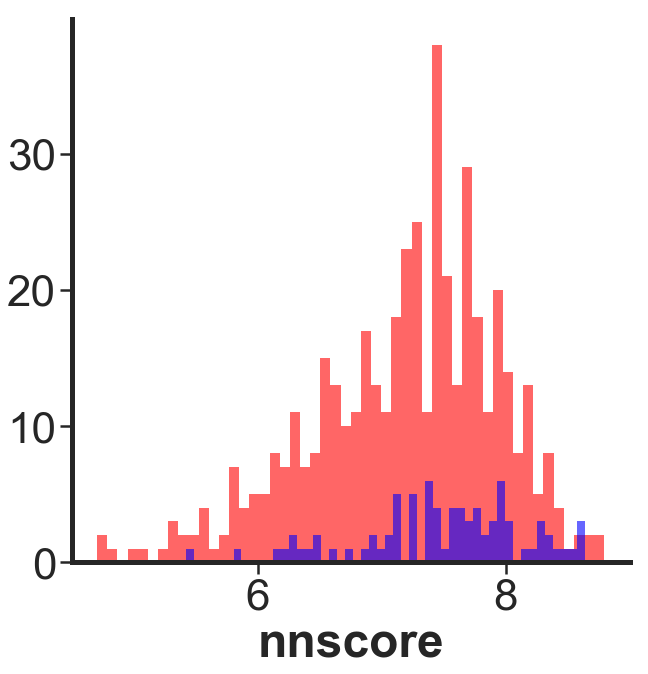

In [215]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["nnscore"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('nnscore',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_nnscore.pdf', facecolor='white',bbox_inches='tight')

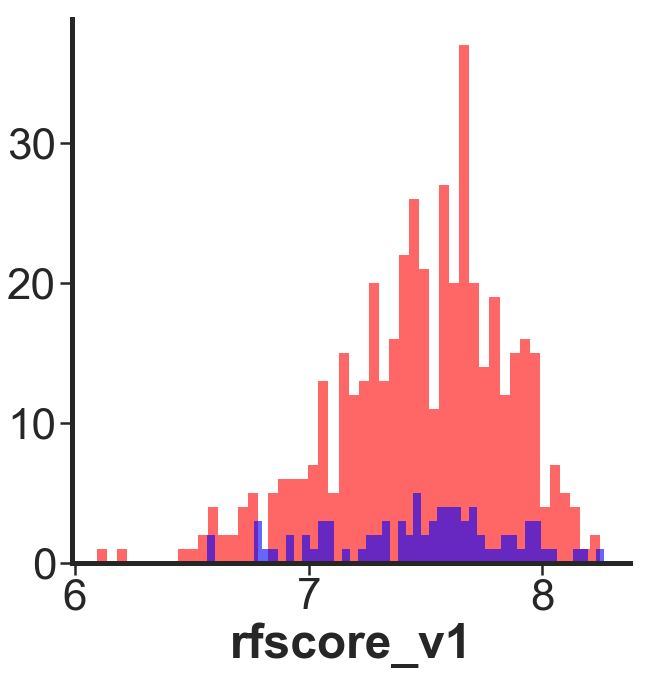

In [216]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["rfscore_v1"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('rfscore_v1',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_rfscore_v1.pdf', facecolor='white',bbox_inches='tight')

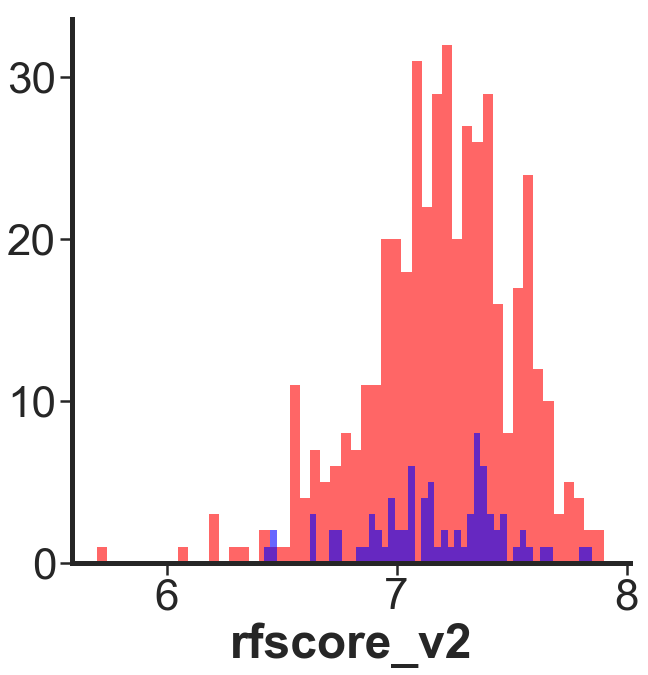

In [217]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["rfscore_v2"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('rfscore_v2',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_rfscore_v2.pdf', facecolor='white',bbox_inches='tight')

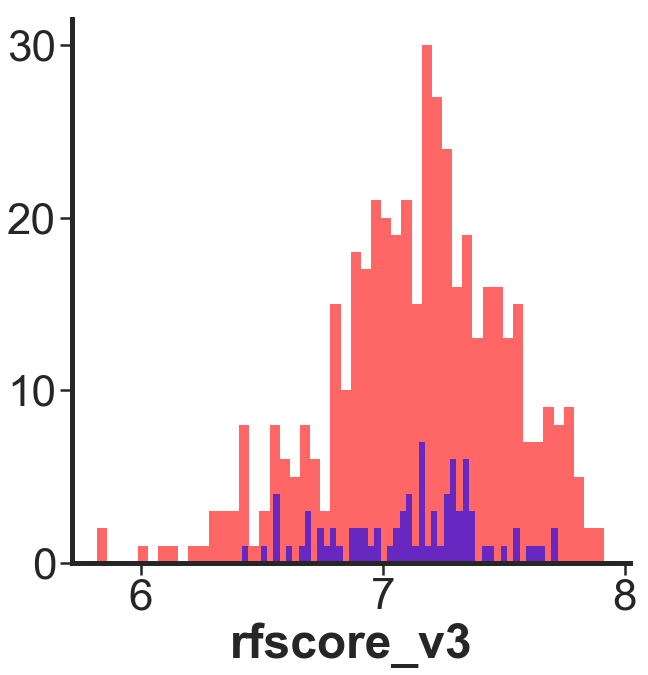

In [219]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["rfscore_v3"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('rfscore_v3',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_rfscore_v3.pdf', facecolor='white',bbox_inches='tight')

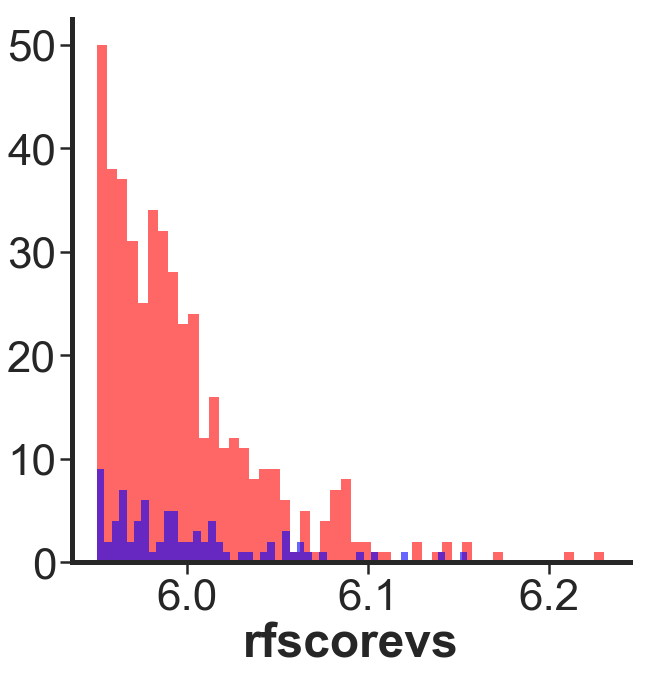

In [220]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["rfscorevs"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('rfscorevs',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_rfscorevs.pdf', facecolor='white',bbox_inches='tight')

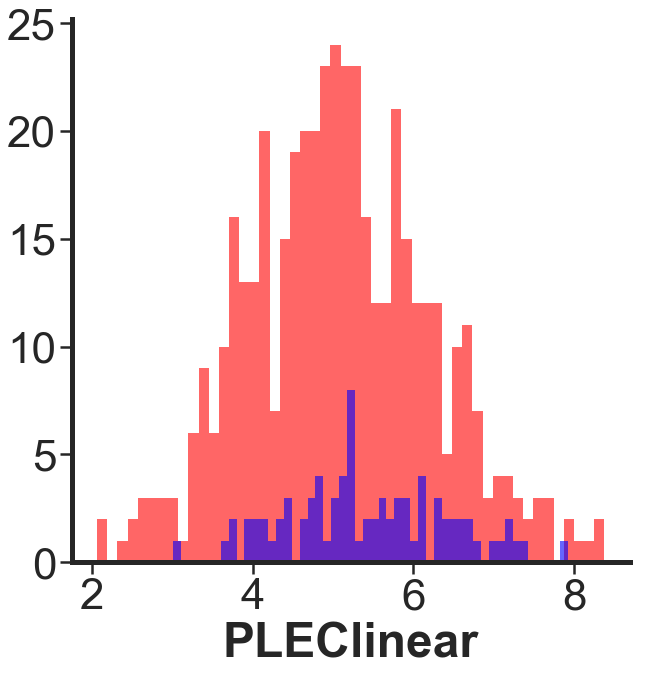

In [221]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["PLEClinear_p5_l1_s65536"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('PLEClinear',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_PLEClinear.pdf', facecolor='white',bbox_inches='tight')

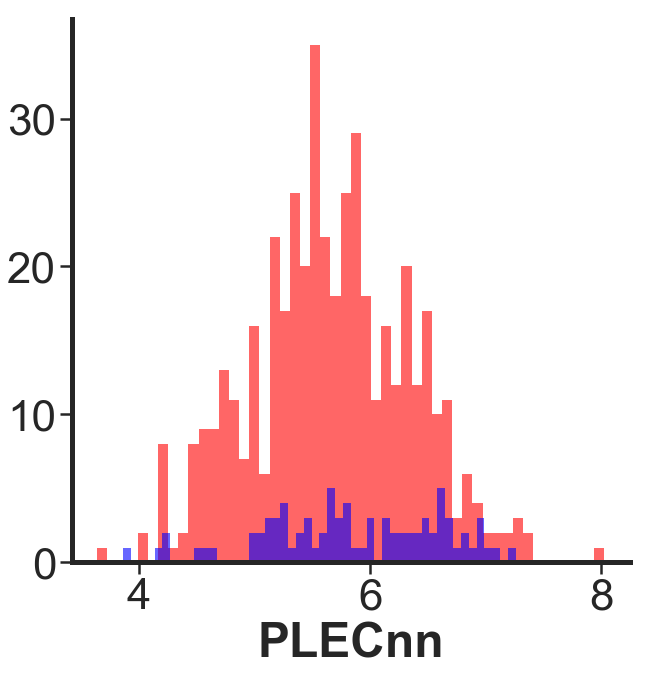

In [222]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["PLECnn_p5_l1_s65536"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('PLECnn',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_PLECnn.pdf', facecolor='white',bbox_inches='tight')

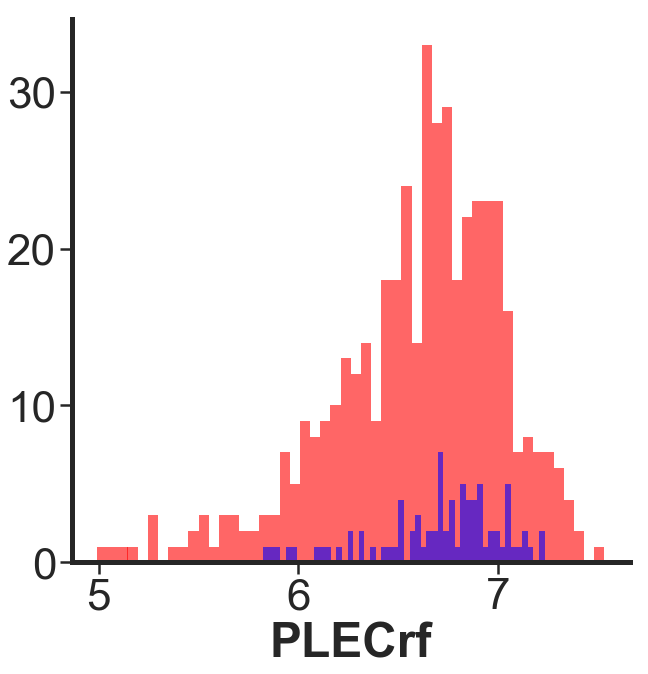

In [223]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["PLECrf_p5_l1_s65536"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('PLECrf',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_PLECrf.pdf', facecolor='white',bbox_inches='tight')

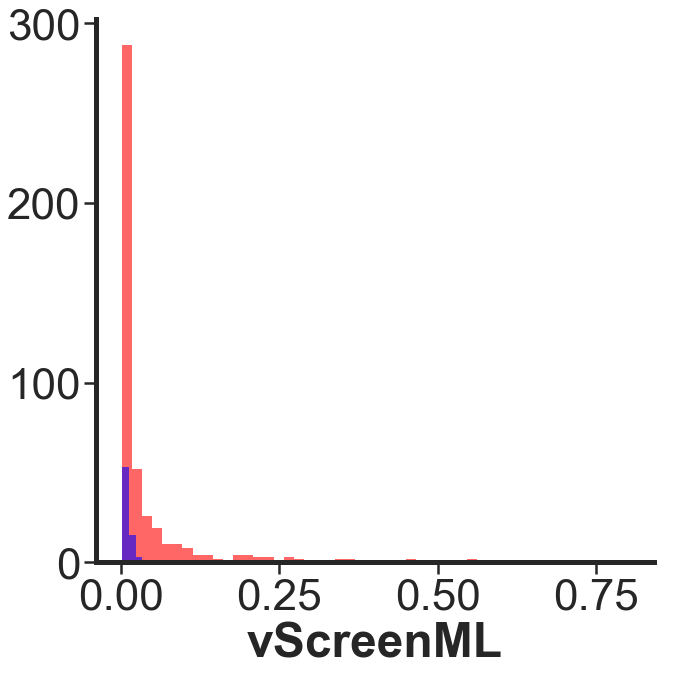

In [224]:
sns.set_context("poster", font_scale=2.0, rc={"lines.linewidth": 10})
plt.figure(figsize=(10, 10))
for label in [0,1]:
    sns_plot = sns.distplot(compounds_list[compounds_list["Label"]==label]["vScreenML"],kde=False, hist_kws={"alpha":0.6,"color": color[int(label)]},bins=50)
    sns_plot.spines['left'].set_linewidth(5)
    sns_plot.spines['bottom'].set_linewidth(5)
    plt.xlabel('vScreenML',fontweight='bold')
    #plt.yticks(np.arange(0, 1100, 200))
    fig = sns_plot.get_figure()
    sns.despine()
    fig.savefig('d4_vscreenml.pdf', facecolor='white',bbox_inches='tight')

In [ ]:
def predict_rank_log_roc_1percent_enrichment_other(model, test_x, predictors, scores):
    
    random_hit_rate = test_x['Label'].sum()/float(len(test_x['Label']))*100

    
    dtest_pred = model.predict_proba(test_x[predictors].astype('float'))[:,1]
    test_x["vScreenML"] = dtest_pred
    print ('vscreenml # of actives', len(test_x[test_x["vScreenML"] > 0.5]))
    scores.extend(["vScreenML","Interface_Energy"])
    top_20_vscreenml = test_x.sort_values(by="vScreenML", ascending=False)[["Label"]].head(50).sum()
    print (top_20_vscreenml)

    
    enrichment_dict = {}
    tp_dict = {}
    for score in scores:
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
                sort_final = test_x.sort_values(by=score, ascending=True)
                #print (sort_final.head())
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
        else:
                sort_final = test_x.sort_values(by=score, ascending=False)
                one_percent = int (len(sort_final['Name'].tolist()) * 0.01)
                one_percent_df = sort_final.head(one_percent)
                true_positive=float(len(one_percent_df[(one_percent_df.Label == 1)]))
                hit_rate = true_positive/one_percent*100    
                enrichment = hit_rate/random_hit_rate
                enrichment_dict[score] = enrichment
                tp_dict[score] = true_positive
                
    return enrichment_dict, tp_dict

In [229]:
from functools import reduce

In [231]:
def predict_rank(model, test_x, predictors, scores):

    
    dtest_pred = model.predict_proba(test_x[predictors].astype('float'))[:,1]
    test_x["vScreenML"] = dtest_pred
    scores.extend(["vScreenML","Interface_Energy"])
 

    
    rank_dict = {}
    
   
    for score in scores:
        #print (y_test.dtypes, test_x[score].dtypes)
                    
        if score == 'vina_affinity' or score == 'Interface_Energy':
                test_x1 = test_x[['Name',score]]
                sort_final = test_x1.sort_values(by=score, ascending=True)
                sort_final = sort_final.reset_index(drop=True).reset_index().rename(columns={'index': score+'_rank'})
                rank_dict[score] = sort_final[['Name',score+'_rank']]
        else:
                test_x1 = test_x[['Name',score]]
                sort_final = test_x1.sort_values(by=score, ascending=False)
                sort_final = sort_final.reset_index(drop=True).reset_index().rename(columns={'index': score+'_rank'})
                rank_dict[score] = sort_final[['Name',score+'_rank']]
                
    rank_df = reduce(lambda x,y: pd.merge(x,y, on='Name', how='outer'), [rank_dict[score] for score in scores])
    return rank_df



In [233]:

compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/Shoichet_Benchmark/recombined_all_shoichet_full_features.csv', encoding="utf-8-sig")
scores = ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
df_rank = predict_rank(clf, compounds_list, predictors,scores )   

vscreenml # of actives 6
Label    5
dtype: int64


In [235]:
df_rank.to_csv('d4_ranks_for_all_scoring_function.csv',index=False)

In [178]:
compounds_list = pd.read_csv('/Users/yusufadeshina/Downloads/Shoichet_Benchmark/all_feature_combined.csv', encoding="utf-8-sig")

In [179]:
predictors = [x for x in compounds_list.columns if x not in [target, IDcol]]

In [180]:
rank_other=predict_rank(clf,compounds_list,predictors,'D4-Benchmark')

In [181]:
rank_other

Name  rank
4    ZINC000415558697_active     4
14   ZINC000613759362_active    14
20   ZINC000649689957_active    20
39   ZINC000594232893_active    39
44   ZINC000293543779_active    44
56   ZINC000539926398_active    56
59   ZINC000615622500_active    59
73   ZINC000418958962_active    73
91   ZINC000631235817_active    91
114  ZINC000569686370_active   114
122  ZINC000155719879_active   122
127  ZINC000567992445_active   127
132  ZINC000480408888_active   132
144  ZINC000348555593_active   144
146  ZINC000270269326_active   146
163  ZINC000449156693_active   163
167  ZINC000572302473_active   167
174  ZINC000573216829_active   174
176  ZINC000268141382_active   176
180  ZINC000375299581_active   180
181  ZINC000601953994_active   181
187  ZINC000517755157_active   187
195  ZINC000474810522_active   195
205  ZINC000466408491_active   205
206  ZINC000431415543_active   206
213  ZINC000609076791_active   213
228  ZINC000480496068_active   228
231  ZINC000465129598_active   231
238  ZINC000646092836_active   238
243  ZINC000621433143_active   243
246  ZINC000127166269_active   246
248  ZINC000068812227_active   248
258  ZINC000362128724_active   258
260  ZINC000609540377_active   260
261  ZINC000368226385_active   261
268  ZINC000464771011_active   268
273  ZINC000373387982_active   273
277  ZINC000484629121_active   277
296  ZINC000584136937_active   296
301  ZINC000647173016_active   301
304  ZINC000191583186_active   304
306  ZINC000561217259_active   306
310  ZINC000518842964_active   310
312  ZINC000247398558_active   312
314  ZINC000651262870_active   314
315  ZINC000358506216_active   315
324  ZINC000237938360_active   324
325  ZINC000464682470_active   325
327  ZINC000092642352_active   327
330  ZINC000602586979_active   330
334  ZINC000493204343_active   334
347  ZINC000560268239_active   347
353  ZINC000535008050_active   353
354  ZINC000525237972_active   354
356  ZINC000414571266_active   356
359  ZINC000566614319_active   359
365  ZINC000467716766_active   365
370  ZINC000497056051_active   370
372  ZINC000264073851_active   372
373  ZINC000657498570_active   373
379  ZINC000127859549_active   379
381  ZINC000437075156_active   381
385  ZINC000176752603_active   385
390  ZINC000433256163_active   390
398  ZINC000651686924_active   398
401  ZINC000449548054_active   401
404  ZINC000085334606_active   404
407  ZINC000425345543_active   407
409  ZINC000413570733_active   409
411  ZINC000429271342_active   411
416  ZINC000279624908_active   416
420  ZINC000278933042_active   420
426  ZINC000277343296_active   426
432  ZINC000657852679_active   432
468  ZINC000130532671_active   468
471  ZINC000294513981_active   471
475  ZINC000425369559_active   475
487  ZINC000584683200_active   487

In [182]:
def predict_rank_active_rf(test_x,name):

    no_of_points =float(len(test_x))
    #print test_x.columns
    sort_final = test_x.sort_values(by='Score', ascending=False)
    
    target = list(sort_final["Label"])
    #print target
    #rank = np.sum([i for i, n in enumerate(target) if n == 1])/len(target)
    #print ("Rank for", name , "=", rank)
    #print sort_final.head()
    sort_final = sort_final.reset_index(drop=True).reset_index().rename(columns={'index': 'rank'})
    sort_final_active = sort_final[sort_final.PDB.str.contains('active')][['PDB', 'rank']]
    return sort_final_active

In [183]:
compounds_list1 = pd.read_csv('/Users/yusufadeshina/Downloads/Shoichet_Benchmark/all_rfscore_tool.csv', encoding="utf-8-sig")

In [184]:
df2 = predict_rank_active_rf(compounds_list1,'D4_rfscorevs')

In [185]:
df2

PDB  rank
5    mini_complex_ZINC000573216829_active_lig.pdb     5
8    mini_complex_ZINC000613759362_active_lig.pdb     8
12   mini_complex_ZINC000431415543_active_lig.pdb    12
15   mini_complex_ZINC000348555593_active_lig.pdb    15
17   mini_complex_ZINC000373387982_active_lig.pdb    17
39   mini_complex_ZINC000270269326_active_lig.pdb    39
43   mini_complex_ZINC000237938360_active_lig.pdb    43
47   mini_complex_ZINC000569686370_active_lig.pdb    47
48   mini_complex_ZINC000631235817_active_lig.pdb    48
51   mini_complex_ZINC000609076791_active_lig.pdb    51
54   mini_complex_ZINC000415558697_active_lig.pdb    54
55   mini_complex_ZINC000085334606_active_lig.pdb    55
58   mini_complex_ZINC000567992445_active_lig.pdb    58
68   mini_complex_ZINC000561217259_active_lig.pdb    68
71   mini_complex_ZINC000425345543_active_lig.pdb    71
78   mini_complex_ZINC000535008050_active_lig.pdb    78
87   mini_complex_ZINC000425369559_active_lig.pdb    87
103  mini_complex_ZINC000466408491_active_lig.pdb   103
115  mini_complex_ZINC000368226385_active_lig.pdb   115
127  mini_complex_ZINC000375299581_active_lig.pdb   127
129  mini_complex_ZINC000293543779_active_lig.pdb   129
143  mini_complex_ZINC000265738616_active_lig.pdb   143
144  mini_complex_ZINC000358506216_active_lig.pdb   144
145  mini_complex_ZINC000437075156_active_lig.pdb   145
149  mini_complex_ZINC000068812227_active_lig.pdb   149
152  mini_complex_ZINC000602586979_active_lig.pdb   152
153  mini_complex_ZINC000609540377_active_lig.pdb   153
163  mini_complex_ZINC000651686924_active_lig.pdb   163
175  mini_complex_ZINC000525237972_active_lig.pdb   175
179  mini_complex_ZINC000484629121_active_lig.pdb   179
190  mini_complex_ZINC000480408888_active_lig.pdb   190
194  mini_complex_ZINC000480496068_active_lig.pdb   194
211  mini_complex_ZINC000414571266_active_lig.pdb   211
213  mini_complex_ZINC000657498570_active_lig.pdb   213
225  mini_complex_ZINC000594232893_active_lig.pdb   225
229  mini_complex_ZINC000584136937_active_lig.pdb   229
231  mini_complex_ZINC000264073851_active_lig.pdb   231
236  mini_complex_ZINC000155719879_active_lig.pdb   236
239  mini_complex_ZINC000651262870_active_lig.pdb   239
244  mini_complex_ZINC000268141382_active_lig.pdb   244
260  mini_complex_ZINC000419278537_active_lig.pdb   260
261  mini_complex_ZINC000621433143_active_lig.pdb   261
262  mini_complex_ZINC000362128724_active_lig.pdb   262
267  mini_complex_ZINC000279624908_active_lig.pdb   267
286  mini_complex_ZINC000247398558_active_lig.pdb   286
287  mini_complex_ZINC000474810522_active_lig.pdb   287
306  mini_complex_ZINC000615622500_active_lig.pdb   306
321  mini_complex_ZINC000560268239_active_lig.pdb   321
329  mini_complex_ZINC000464771011_active_lig.pdb   329
330  mini_complex_ZINC000127166269_active_lig.pdb   330
332  mini_complex_ZINC000646092836_active_lig.pdb   332
335  mini_complex_ZINC000464682470_active_lig.pdb   335
341  mini_complex_ZINC000433256163_active_lig.pdb   341
347  mini_complex_ZINC000191583186_active_lig.pdb   347
352  mini_complex_ZINC000418958962_active_lig.pdb   352
367  mini_complex_ZINC000497056051_active_lig.pdb   367
369  mini_complex_ZINC000465129598_active_lig.pdb   369
373  mini_complex_ZINC000449156693_active_lig.pdb   373
375  mini_complex_ZINC000572302473_active_lig.pdb   375
398  mini_complex_ZINC000092642352_active_lig.pdb   398
402  mini_complex_ZINC000539926398_active_lig.pdb   402
404  mini_complex_ZINC000649689957_active_lig.pdb   404
407  mini_complex_ZINC000467716766_active_lig.pdb   407
415  mini_complex_ZINC000601953994_active_lig.pdb   415
420  mini_complex_ZINC000584683200_active_lig.pdb   420
428  mini_complex_ZINC000278933042_active_lig.pdb   428
437  mini_complex_ZINC000647173016_active_lig.pdb   437
438  mini_complex_ZINC000518842964_active_lig.pdb   438
449  mini_complex_ZINC000176752603_active_lig.pdb   449
465  mini_complex_ZINC000449548054_active_lig.pdb   465
470  mini_complex_ZINC000413570733_active_lig.pdb   470
496  mini_comp

In [187]:
df2.PDB = df2.PDB.str.strip('_lig.pdb')

In [189]:
df2 = df2.rename(columns={'PDB': 'Name'})

In [190]:
output = pd.merge(rank_other, df2, on='Name', how='inner')

In [196]:
output

Name  rank_x  rank_y
0   ZINC000415558697_active       4      54
1   ZINC000613759362_active      14       8
2   ZINC000649689957_active      20     404
3   ZINC000594232893_active      39     225
4   ZINC000293543779_active      44     129
5   ZINC000539926398_active      56     402
6   ZINC000615622500_active      59     306
7   ZINC000418958962_active      73     352
8   ZINC000631235817_active      91      48
9   ZINC000569686370_active     114      47
10  ZINC000155719879_active     122     236
11  ZINC000567992445_active     127      58
12  ZINC000480408888_active     132     190
13  ZINC000348555593_active     144      15
14  ZINC000270269326_active     146      39
15  ZINC000449156693_active     163     373
16  ZINC000572302473_active     167     375
17  ZINC000573216829_active     174       5
18  ZINC000268141382_active     176     244
19  ZINC000375299581_active     180     127
20  ZINC000601953994_active     181     415
21  ZINC000517755157_active     187     510
22  ZINC000474810522_active     195     287
23  ZINC000466408491_active     205     103
24  ZINC000431415543_active     206      12
25  ZINC000609076791_active     213      51
26  ZINC000480496068_active     228     194
27  ZINC000465129598_active     231     369
28  ZINC000646092836_active     238     332
29  ZINC000621433143_active     243     261
30  ZINC000127166269_active     246     330
31  ZINC000068812227_active     248     149
32  ZINC000362128724_active     258     262
33  ZINC000609540377_active     260     153
34  ZINC000368226385_active     261     115
35  ZINC000464771011_active     268     329
36  ZINC000373387982_active     273      17
37  ZINC000484629121_active     277     179
38  ZINC000584136937_active     296     229
39  ZINC000647173016_active     301     437
40  ZINC000191583186_active     304     347
41  ZINC000561217259_active     306      68
42  ZINC000518842964_active     310     438
43  ZINC000247398558_active     312     286
44  ZINC000651262870_active     314     239
45  ZINC000358506216_active     315     144
46  ZINC000237938360_active     324      43
47  ZINC000464682470_active     325     335
48  ZINC000092642352_active     327     398
49  ZINC000602586979_active     330     152
50  ZINC000493204343_active     334     520
51  ZINC000560268239_active     347     321
52  ZINC000535008050_active     353      78
53  ZINC000525237972_active     354     175
54  ZINC000414571266_active     356     211
55  ZINC000566614319_active     359     496
56  ZINC000467716766_active     365     407
57  ZINC000497056051_active     370     367
58  ZINC000264073851_active     372     231
59  ZINC000657498570_active     373     213
60  ZINC000127859549_active     379     543
61  ZINC000437075156_active     381     145
62  ZINC000176752603_active     385     449
63  ZINC000433256163_active     390     341
64  ZINC000651686924_active     398     163
65  ZINC000449548054_active     401     465
66  ZINC000085334606_active     404      55
67  ZINC000425345543_active     407      71
68  ZINC000413570733_active     409     470
69  ZINC000429271342_active     411     531
70  ZINC000279624908_active     416     267
71  ZINC000278933042_active     420     428
72  ZINC000277343296_active     426     522
73  ZINC000657852679_active     432     541
74  ZINC000130532671_active     468     540
75  ZINC000294513981_active     471     525
76  ZINC000425369559_active     475      87
77  ZINC000584683200_active     487     420

In [207]:
sum(output['rank_x'] > output['rank_y'])

39

In [121]:
def predict_rank_active(test_x,score,name):

    no_of_points =float(len(test_x))

    sort_final = test_x.sort_values(by=score, ascending=False)
    target = list(sort_final["Label"])
    #print target
    sort_final = sort_final.reset_index().rename(columns={'index': 'rank'})
    sort_final_active = sort_final[sort_final.Name.str.contains('active')][['Name', 'rank']]
    return sort_final_active

In [125]:
compounds_list2 = pd.read_csv('/Users/yusufadeshina/Downloads/Shoichet_Benchmark/all_other_tools.csv', encoding="utf-8-sig",delimiter=' ')
dict_df={}
for score in ['nnscore','rfscore_v1','rfscore_v3','rfscore_v2',
                'PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536',
                  'PLECrf_p5_l1_s65536','vina_affinity']:
    print ('///////////////////Processing',score,'//////////////////',"\t")
       
    dict_df[score]=predict_rank_active(compounds_list2,score,score)

///////////////////Processing nnscore ////////////////// 	
///////////////////Processing rfscore_v1 ////////////////// 	
///////////////////Processing rfscore_v3 ////////////////// 	
///////////////////Processing rfscore_v2 ////////////////// 	
///////////////////Processing PLEClinear_p5_l1_s65536 ////////////////// 	
///////////////////Processing PLECnn_p5_l1_s65536 ////////////////// 	
///////////////////Processing PLECrf_p5_l1_s65536 ////////////////// 	
///////////////////Processing vina_affinity ////////////////// 	


In [143]:
dict_df['nnscore'].Name = dict_df['nnscore'].Name.str.strip('_lig_rf_vina.csv')

In [144]:
dict_df['nnscore']

Name  rank
3    ZINC000268141382_active    13
6    ZINC000480496068_active    46
8    ZINC000419278537_active    30
10   ZINC000609540377_active    68
11   ZINC000649689957_active    76
16   ZINC000480408888_active    45
19   ZINC000348555593_active    20
21   ZINC000567992445_active    58
27   ZINC000155719879_active     6
28   ZINC000594232893_active    64
29   ZINC000525237972_active    52
35   ZINC000631235817_active    72
42   ZINC000474810522_active    44
64   ZINC000466408491_active    42
70   ZINC000646092836_active    74
71   ZINC000539926398_active    54
75   ZINC000414571266_active    27
80   ZINC000613759362_active    69
81   ZINC000191583186_active     8
82   ZINC000373387982_active    24
83   ZINC000293543779_active    18
90   ZINC000415558697_active    28
95   ZINC000517755157_active    50
96   ZINC000425345543_active    31
109  ZINC000651686924_active    78
113  ZINC000375299581_active    25
114  ZINC000640028109_active    73
122  ZINC000278933042_active    16
124  ZINC000270269326_active    14
125  ZINC000615622500_active    70
129  ZINC000621433143_active    71
153  ZINC000651262870_active    77
155  ZINC000497056051_active    49
163  ZINC000279624908_active    17
173  ZINC000130532671_active     5
177  ZINC000294513981_active    19
179  ZINC000566614319_active    57
180  ZINC000247398558_active    10
184  ZINC000449548054_active    38
185  ZINC000484629121_active    47
187  ZINC000561217259_active    56
192  ZINC000437075156_active    36
204  ZINC000413570733_active    26
223  ZINC000518842964_active    51
232  ZINC000584136937_active    62
234  ZINC000572302473_active    60
247  ZINC000573216829_active    61
254  ZINC000068812227_active     0
259  ZINC000425369559_active    32
260  ZINC000601953994_active    65
262  ZINC000433256163_active    35
265  ZINC000362128724_active    22
268  ZINC000535008050_active    53
291  ZINC000264073851_active    11
294  ZINC000657498570_active    79
303  ZINC000464771011_active    40
308  ZINC000237938360_active     9
309  ZINC000464682470_active    39
331  ZINC000429271342_active    33
340  ZINC000602586979_active    66
341  ZINC000265738616_active    12
344  ZINC000647173016_active    75
350  ZINC000277343296_active    15
354  ZINC000368226385_active    23
359  ZINC000092642352_active     2
369  ZINC000449156693_active    37
376  ZINC000358506216_active    21
382  ZINC000176752603_active     7
384  ZINC000465129598_active    41
415  ZINC000467716766_active    43
430  ZINC000569686370_active    59
450  ZINC000657852679_active    80
458  ZINC000431415543_active    34
461  ZINC000584683200_active    63
467  ZINC000127166269_active     3
476  ZINC000127859549_active     4
477  ZINC000085334606_active     1
488  ZINC000493204343_active    48
492  ZINC000418958962_active    29
518  ZINC000609076791_active    67
533  ZINC000560268239_active    55

In [ ]:
for column in columns:
    plot_benchmark_graph('vScreenML',column)

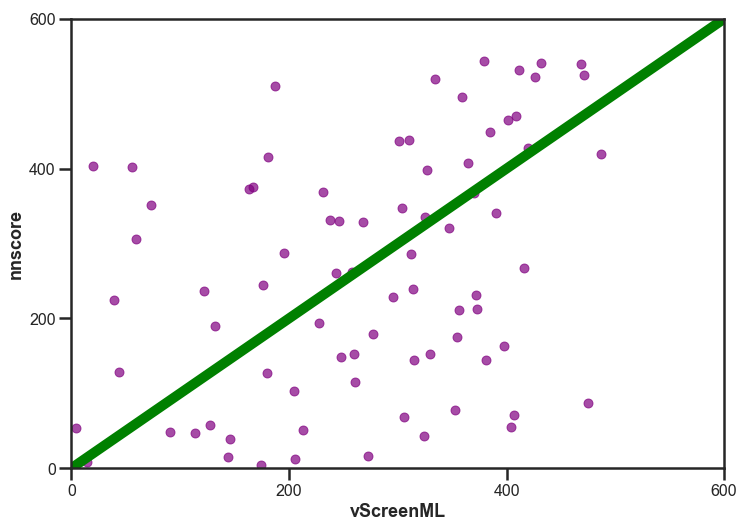

In [193]:
sns.regplot(x='rank_x', y='rank_y', data=output, fit_reg=False,marker='o', scatter_kws={"color":"purple",'s':80,"alpha":0.7});
plt.plot([0,600], [0,600], color='g')
plt.xlim((0,600)) 
plt.ylim((0,600))
plt.xlabel('vScreenML',fontsize=18,fontweight='bold')
plt.ylabel('nnscore',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title(column2+' vs '+column2)
plt.show()

#### T-TEST FOR ASSAY DATA

In [40]:
from scipy.stats import ttest_ind

In [52]:
assay_data = pd.read_csv('/Users/yusufadeshina/utilities_for_goldi_paper/AChE_expriment_pvalue.txt', sep='\t')

In [58]:
assay_data

AC6        AC3       AC10       AC11       AC15        AC5  \
0   8.962301  10.866988  -0.882004  27.155615  32.782739  46.265708   
1  11.823283  12.273769  31.470797  28.744171  27.289971  38.283411   
2   6.640322   8.156168  17.774441  27.021260  29.613530  31.470797   

        AC13       AC19       AC23        AC9  ...       AC16       AC18  \
0  47.656682  50.574014  52.611571  50.209437  ...  75.634237  67.794420   
1  43.096499  44.027978  44.096404  45.941674  ...  51.086699  63.871360   
2  47.980716  43.640234  42.515016  46.076029  ...  81.640718  70.972402   

        AC14        AC8         AC1        AC12        AC4        AC2  \
0  73.800680  87.252035   85.276219   68.189362  89.306884  82.193946   
1  70.291630  76.053110   78.811349   91.282700  87.410100  91.835928   
2  78.811349  80.771359  132.379673  100.213388  83.458468  93.811744   

          AC7        DMSO  
0  104.639216  100.371453  
1  190.389631  105.508575  
2   71.777444   94.127875  

[3 rows x 24 columns]

In [53]:
assay_data[['AC1','AC6']].dropna() 

AC1        AC6
0   85.276219   8.962301
1   78.811349  11.823283
2  132.379673   6.640322

In [59]:
sample = ttest_ind(assay_data['DMSO'].values, assay_data['AC6'].dropna().values)

In [62]:
sample[1] 

1.4890016731698773e-05

In [55]:
assay_data['AC6'].dropna().values

array([ 8.96230143, 11.82328302,  6.64032245])

In [63]:
columns = [i for i in assay_data.columns]
for i in columns:
            print ('|||||||||||||||Comapring DMSO and '+i+  '\t|||||||||||||||||||||||') 
            ttest_result = ttest_ind(assay_data['DMSO'].values, assay_data[i].dropna().values)
            print ('p-value = ', ttest_result[1]/2)
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring DMSO and AC6	|||||||||||||||||||||||
p-value =  7.4450083658493865e-06
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring DMSO and AC3	|||||||||||||||||||||||
p-value =  6.965779165777165e-06
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring DMSO and AC10	|||||||||||||||||||||||
p-value =  0.0005393024533046859
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring DMSO and AC11	|||||||||||||||||||||||
p-value =  1.3372199469776037e-05
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring DMSO and AC15	|||||||||||||||||||||||
p-value =  2.1774428659509562e-05
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring DMSO and AC5	|||||||||||||||||||||||
p-value =  0.00017074144139067406
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||

In [ ]:
AC1 = [85.276219, 78.811349, 132.379673]
AC7 = [104.639216, 190.389631, 71.777444]